In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [5]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_excel('./coal-production-data.xlsx')
df

Unnamed: 0  \
0                                                                                                                                      NaN   
1                                                                                                                         www.enerdata.net   
2                                                                                                                                    World   
3                                                                                                                                     OECD   
4                                                                                                                                       G7   
5                                                                                                                                    BRICS   
6                                                                                                                                   Europe   
7                                                                                                                           European Union   
8                                                                                                                                  Belgium   
9                                                                                                                                  Czechia   
10                                                                                                                                  France   
11                                                                                                                                 Germany   
12                                                                                                                                   Italy   
13                                                                                                                             Netherlands   
14                                                                                                                                  Poland   
15                                                                                                                                Portugal   
16                                                                                                                                 Romania   
17                                                                                                                                   Spain   
18                                                                                                                                  Sweden   
19                                                                                                                          United Kingdom   
20                                                                                                                                  Norway   
21                                                                                                                                  Turkey   
22                                                                                                                                     CIS   
23                                                                                                                              Kazakhstan   
24                                                                                                                                  Russia   
25                                                                                                                                 Ukraine   
26                                                                                                                              Uzbekistan   
27                                                                                                                                 America   
28        

In [7]:
df.drop([0], inplace = True)
df

Unnamed: 0  \
1                                                                                                                         www.enerdata.net   
2                                                                                                                                    World   
3                                                                                                                                     OECD   
4                                                                                                                                       G7   
5                                                                                                                                    BRICS   
6                                                                                                                                   Europe   
7                                                                                                                           European Union   
8                                                                                                                                  Belgium   
9                                                                                                                                  Czechia   
10                                                                                                                                  France   
11                                                                                                                                 Germany   
12                                                                                                                                   Italy   
13                                                                                                                             Netherlands   
14                                                                                                                                  Poland   
15                                                                                                                                Portugal   
16                                                                                                                                 Romania   
17                                                                                                                                   Spain   
18                                                                                                                                  Sweden   
19                                                                                                                          United Kingdom   
20                                                                                                                                  Norway   
21                                                                                                                                  Turkey   
22                                                                                                                                     CIS   
23                                                                                                                              Kazakhstan   
24                                                                                                                                  Russia   
25                                                                                                                                 Ukraine   
26                                                                                                                              Uzbekistan   
27                                                                                                                                 America   
28                                                                                                                           North America   
29        

In [8]:
header_row = 0
df.columns = df.iloc[header_row]
df = df.reset_index(drop=True)
df = df.drop(header_row)
df

1                                                                                                                         www.enerdata.net  \
1                                                                                                                                    World   
2                                                                                                                                     OECD   
3                                                                                                                                       G7   
4                                                                                                                                    BRICS   
5                                                                                                                                   Europe   
6                                                                                                                           European Union   
7                                                                                                                                  Belgium   
8                                                                                                                                  Czechia   
9                                                                                                                                   France   
10                                                                                                                                 Germany   
11                                                                                                                                   Italy   
12                                                                                                                             Netherlands   
13                                                                                                                                  Poland   
14                                                                                                                                Portugal   
15                                                                                                                                 Romania   
16                                                                                                                                   Spain   
17                                                                                                                                  Sweden   
18                                                                                                                          United Kingdom   
19                                                                                                                                  Norway   
20                                                                                                                                  Turkey   
21                                                                                                                                     CIS   
22                                                                                                                              Kazakhstan   
23                                                                                                                                  Russia   
24                                                                                                                                 Ukraine   
25                                                                                                                              Uzbekistan   
26                                                                                                                                 America   
27                                                                                                                           North America   
28                      

In [9]:
df.drop([56, 57, 58, 59, 60, 61, 62, 63], inplace = True)
df

1  www.enerdata.net         1990         1991         1992         1993  \
1             World  4698.288837  4526.830456  4478.840434  4361.452965   
2              OECD     2308.374     2191.172     2126.165     2017.686   
3                G7     1551.632     1444.011      1389.49     1299.959   
4             BRICS     1821.086      1806.95     1830.705     1856.011   
5            Europe     1209.388     1088.551     1026.659      962.868   
6    European Union      994.573      882.171      829.617      788.849   
7           Belgium        2.357        2.107        1.197        0.971   
8           Czechia      101.398       96.864       86.721       85.239   
9            France       13.532       12.876       11.827       10.662   
10          Germany      434.446      352.645       314.16      286.561   
11            Italy        1.014        0.961        0.825         0.63   
12      Netherlands            0            0            0            0   
13           Poland       215.32      209.782      198.472      198.584   
14         Portugal        0.281         0.27        0.221        0.197   
15          Romania       38.183       32.414        38.37       39.777   
16            Spain       35.682       33.562       33.471       31.583   
17           Sweden        0.592        0.746        0.746        0.718   
18   United Kingdom       92.762       94.922       84.493       68.199   
19           Norway        0.303         0.33        0.359        0.268   
20           Turkey       47.428       46.108       51.431        48.56   
21              CIS      682.789      618.741      588.874      519.034   
22       Kazakhstan      131.443      130.382      126.536       111.88   
23           Russia      376.613      337.863      323.545      288.613   
24          Ukraine      159.213       135.23      126.375      108.717   
25       Uzbekistan          6.4         6.75        5.531        4.657   
26          America     1039.539      1010.95     1007.599      964.469   
27    North America     1001.893      974.676      970.583      926.701   
28           Canada       68.332       71.134       65.614       69.003   
29    United States      933.561      903.542      904.969      857.698   
30    Latin America       37.646       36.274       37.016       37.768   
31        Argentina        0.274        0.289          0.2        0.166   
32           Brazil        4.595        5.188        4.731        4.595   
33            Chile        2.183        2.208        1.626        1.355   
34         Colombia       21.375       19.894       21.817       21.139   
35           Mexico        6.933        6.463        6.104        6.615   
36        Venezuela        2.189        2.175         2.45        3.815   
37             Asia  1375.827918  1398.712914  1440.635909  1488.375855   
38            China      1039.82     1040.692       1072.8     1112.298   
39            India      225.258      245.007      255.229      262.291   
40        Indonesia        10.23       13.271       22.008       28.314   
41            Japan        7.985        7.931        7.602        7.206   
42         Malaysia        0.111          0.2        0.084        0.419   
43      South Korea       17.217       15.058        11.97        9.443   
44           Taiwan        0.472        0.402        0.335        0.328   
45         Thailand       12.421       14.689       15.357       15.546   
46          Pacific       207.14      222.296      231.357      229.402   
47        Australia      204.562      219.607      228.339      226.065   
48      New Zealand        2.578        2.689        3.018        3.337   
49           Africa   182.466919   186.385542   182.683525    195.77111   
50          Algeria            0            0            0            0   
51            Egypt            0            0            0            0   
52          Nigeria         0.09          0.1        0.087        0.028   
53     South Africa      

In [10]:
df.reset_index(drop=True)

1  www.enerdata.net         1990         1991         1992         1993  \
0             World  4698.288837  4526.830456  4478.840434  4361.452965   
1              OECD     2308.374     2191.172     2126.165     2017.686   
2                G7     1551.632     1444.011      1389.49     1299.959   
3             BRICS     1821.086      1806.95     1830.705     1856.011   
4            Europe     1209.388     1088.551     1026.659      962.868   
5    European Union      994.573      882.171      829.617      788.849   
6           Belgium        2.357        2.107        1.197        0.971   
7           Czechia      101.398       96.864       86.721       85.239   
8            France       13.532       12.876       11.827       10.662   
9           Germany      434.446      352.645       314.16      286.561   
10            Italy        1.014        0.961        0.825         0.63   
11      Netherlands            0            0            0            0   
12           Poland       215.32      209.782      198.472      198.584   
13         Portugal        0.281         0.27        0.221        0.197   
14          Romania       38.183       32.414        38.37       39.777   
15            Spain       35.682       33.562       33.471       31.583   
16           Sweden        0.592        0.746        0.746        0.718   
17   United Kingdom       92.762       94.922       84.493       68.199   
18           Norway        0.303         0.33        0.359        0.268   
19           Turkey       47.428       46.108       51.431        48.56   
20              CIS      682.789      618.741      588.874      519.034   
21       Kazakhstan      131.443      130.382      126.536       111.88   
22           Russia      376.613      337.863      323.545      288.613   
23          Ukraine      159.213       135.23      126.375      108.717   
24       Uzbekistan          6.4         6.75        5.531        4.657   
25          America     1039.539      1010.95     1007.599      964.469   
26    North America     1001.893      974.676      970.583      926.701   
27           Canada       68.332       71.134       65.614       69.003   
28    United States      933.561      903.542      904.969      857.698   
29    Latin America       37.646       36.274       37.016       37.768   
30        Argentina        0.274        0.289          0.2        0.166   
31           Brazil        4.595        5.188        4.731        4.595   
32            Chile        2.183        2.208        1.626        1.355   
33         Colombia       21.375       19.894       21.817       21.139   
34           Mexico        6.933        6.463        6.104        6.615   
35        Venezuela        2.189        2.175         2.45        3.815   
36             Asia  1375.827918  1398.712914  1440.635909  1488.375855   
37            China      1039.82     1040.692       1072.8     1112.298   
38            India      225.258      245.007      255.229      262.291   
39        Indonesia        10.23       13.271       22.008       28.314   
40            Japan        7.985        7.931        7.602        7.206   
41         Malaysia        0.111          0.2        0.084        0.419   
42      South Korea       17.217       15.058        11.97        9.443   
43           Taiwan        0.472        0.402        0.335        0.328   
44         Thailand       12.421       14.689       15.357       15.546   
45          Pacific       207.14      222.296      231.357      229.402   
46        Australia      204.562      219.607      228.339      226.065   
47      New Zealand        2.578        2.689        3.018        3.337   
48           Africa   182.466919   186.385542   182.683525    195.77111   
49          Algeria            0            0            0            0   
50            Egypt            0            0            0            0   
51          Nigeria         0.09          0.1        0.087        0.028   
52     South Africa      

In [11]:
for col in df.columns:
    print(col)

www.enerdata.net
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2019 - 2020 (%) 
2000 - 2020 (%/year) 


In [12]:
df = df.rename(columns={df.columns[0]: 'Region'}, index={})
df

1           Region         1990         1991         1992         1993  \
1            World  4698.288837  4526.830456  4478.840434  4361.452965   
2             OECD     2308.374     2191.172     2126.165     2017.686   
3               G7     1551.632     1444.011      1389.49     1299.959   
4            BRICS     1821.086      1806.95     1830.705     1856.011   
5           Europe     1209.388     1088.551     1026.659      962.868   
6   European Union      994.573      882.171      829.617      788.849   
7          Belgium        2.357        2.107        1.197        0.971   
8          Czechia      101.398       96.864       86.721       85.239   
9           France       13.532       12.876       11.827       10.662   
10         Germany      434.446      352.645       314.16      286.561   
11           Italy        1.014        0.961        0.825         0.63   
12     Netherlands            0            0            0            0   
13          Poland       215.32      209.782      198.472      198.584   
14        Portugal        0.281         0.27        0.221        0.197   
15         Romania       38.183       32.414        38.37       39.777   
16           Spain       35.682       33.562       33.471       31.583   
17          Sweden        0.592        0.746        0.746        0.718   
18  United Kingdom       92.762       94.922       84.493       68.199   
19          Norway        0.303         0.33        0.359        0.268   
20          Turkey       47.428       46.108       51.431        48.56   
21             CIS      682.789      618.741      588.874      519.034   
22      Kazakhstan      131.443      130.382      126.536       111.88   
23          Russia      376.613      337.863      323.545      288.613   
24         Ukraine      159.213       135.23      126.375      108.717   
25      Uzbekistan          6.4         6.75        5.531        4.657   
26         America     1039.539      1010.95     1007.599      964.469   
27   North America     1001.893      974.676      970.583      926.701   
28          Canada       68.332       71.134       65.614       69.003   
29   United States      933.561      903.542      904.969      857.698   
30   Latin America       37.646       36.274       37.016       37.768   
31       Argentina        0.274        0.289          0.2        0.166   
32          Brazil        4.595        5.188        4.731        4.595   
33           Chile        2.183        2.208        1.626        1.355   
34        Colombia       21.375       19.894       21.817       21.139   
35          Mexico        6.933        6.463        6.104        6.615   
36       Venezuela        2.189        2.175         2.45        3.815   
37            Asia  1375.827918  1398.712914  1440.635909  1488.375855   
38           China      1039.82     1040.692       1072.8     1112.298   
39           India      225.258      245.007      255.229      262.291   
40       Indonesia        10.23       13.271       22.008       28.314   
41           Japan        7.985        7.931        7.602        7.206   
42        Malaysia        0.111          0.2        0.084        0.419   
43     South Korea       17.217       15.058        11.97        9.443   
44          Taiwan        0.472        0.402        0.335        0.328   
45        Thailand       12.421       14.689       15.357       15.546   
46         Pacific       207.14      222.296      231.357      229.402   
47       Australia      204.562      219.607      228.339      226.065   
48     New Zealand        2.578        2.689        3.018        3.337   
49          Africa   182.466919   186.385542   182.683525    195.77111   
50         Algeria            0            0            0            0   
51           Egypt            0            0            0            0   
52         Nigeria         0.09          0.1        0.087        0.028   
53    South Africa        174.8        178.2        174.4      188.214   
54  

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df

1           Region         1990         1991         1992         1993  \
0            World  4698.288837  4526.830456  4478.840434  4361.452965   
1             OECD     2308.374     2191.172     2126.165     2017.686   
2               G7     1551.632     1444.011      1389.49     1299.959   
3            BRICS     1821.086      1806.95     1830.705     1856.011   
4           Europe     1209.388     1088.551     1026.659      962.868   
5   European Union      994.573      882.171      829.617      788.849   
6          Belgium        2.357        2.107        1.197        0.971   
7          Czechia      101.398       96.864       86.721       85.239   
8           France       13.532       12.876       11.827       10.662   
9          Germany      434.446      352.645       314.16      286.561   
10           Italy        1.014        0.961        0.825         0.63   
11     Netherlands            0            0            0            0   
12          Poland       215.32      209.782      198.472      198.584   
13        Portugal        0.281         0.27        0.221        0.197   
14         Romania       38.183       32.414        38.37       39.777   
15           Spain       35.682       33.562       33.471       31.583   
16          Sweden        0.592        0.746        0.746        0.718   
17  United Kingdom       92.762       94.922       84.493       68.199   
18          Norway        0.303         0.33        0.359        0.268   
19          Turkey       47.428       46.108       51.431        48.56   
20             CIS      682.789      618.741      588.874      519.034   
21      Kazakhstan      131.443      130.382      126.536       111.88   
22          Russia      376.613      337.863      323.545      288.613   
23         Ukraine      159.213       135.23      126.375      108.717   
24      Uzbekistan          6.4         6.75        5.531        4.657   
25         America     1039.539      1010.95     1007.599      964.469   
26   North America     1001.893      974.676      970.583      926.701   
27          Canada       68.332       71.134       65.614       69.003   
28   United States      933.561      903.542      904.969      857.698   
29   Latin America       37.646       36.274       37.016       37.768   
30       Argentina        0.274        0.289          0.2        0.166   
31          Brazil        4.595        5.188        4.731        4.595   
32           Chile        2.183        2.208        1.626        1.355   
33        Colombia       21.375       19.894       21.817       21.139   
34          Mexico        6.933        6.463        6.104        6.615   
35       Venezuela        2.189        2.175         2.45        3.815   
36            Asia  1375.827918  1398.712914  1440.635909  1488.375855   
37           China      1039.82     1040.692       1072.8     1112.298   
38           India      225.258      245.007      255.229      262.291   
39       Indonesia        10.23       13.271       22.008       28.314   
40           Japan        7.985        7.931        7.602        7.206   
41        Malaysia        0.111          0.2        0.084        0.419   
42     South Korea       17.217       15.058        11.97        9.443   
43          Taiwan        0.472        0.402        0.335        0.328   
44        Thailand       12.421       14.689       15.357       15.546   
45         Pacific       207.14      222.296      231.357      229.402   
46       Australia      204.562      219.607      228.339      226.065   
47     New Zealand        2.578        2.689        3.018        3.337   
48          Africa   182.466919   186.385542   182.683525    195.77111   
49         Algeria            0            0            0            0   
50           Egypt            0            0            0            0   
51         Nigeria         0.09          0.1        0.087        0.028   
52    South Africa        174.8        178.2        174.4      188.214   
53  

In [15]:
df.columns

Index([               'Region',                    1990,
                          1991,                    1992,
                          1993,                    1994,
                          1995,                    1996,
                          1997,                    1998,
                          1999,                    2000,
                          2001,                    2002,
                          2003,                    2004,
                          2005,                    2006,
                          2007,                    2008,
                          2009,                    2010,
                          2011,                    2012,
                          2013,                    2014,
                          2015,                    2016,
                          2017,                    2018,
                          2019,                    2020,
            '2019 - 2020 (%) ', '2000 - 2020 (%/year) '],
      dtype='object', name=1)

In [16]:
df.describe()

1        Region  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
count        55  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0   
unique       55  53.0  53.0  53.0  53.0  53.0  52.0  52.0  52.0  52.0  53.0   
top     Romania   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
freq          1   3.0   3.0   3.0   3.0   3.0   4.0   4.0   4.0   4.0   3.0   

1       2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
count   55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0   
unique  53.0  51.0  52.0  52.0  52.0  52.0  51.0  50.0  50.0  50.0  51.0   
top      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
freq     3.0   4.0   4.0   4.0   4.0   4.0   5.0   6.0   6.0   6.0   5.0   

1       2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  \
count   55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0   
unique  51.0  51.0  51.0  51.0  50.0  49.0  49.0  49.0  48.0  48.0   
top      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
freq     5.0   5.0   5.0   5.0   6.0   7.0   7.0   7.0   8.0   8.0   

1       2019 - 2020 (%)   2000 - 2020 (%/year)   
count               55.0                   55.0  
unique              47.0                   49.0  
top                  0.0                 -100.0  
freq                 9.0                    5.0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Region                 55 non-null     object
 1   1990                   55 non-null     object
 2   1991                   55 non-null     object
 3   1992                   55 non-null     object
 4   1993                   55 non-null     object
 5   1994                   55 non-null     object
 6   1995                   55 non-null     object
 7   1996                   55 non-null     object
 8   1997                   55 non-null     object
 9   1998                   55 non-null     object
 10  1999                   55 non-null     object
 11  2000                   55 non-null     object
 12  2001                   55 non-null     object
 13  2002                   55 non-null     object
 14  2003                   55 non-null     object
 15  2004                   55

In [18]:
df[[1990,
                          1991,                    1992,
                          1993,                    1994,
                          1995,                    1996,
                          1997,                    1998,
                          1999,                    2000,
                          2001,                    2002,
                          2003,                    2004,
                          2005,                    2006,
                          2007,                    2008,
                          2009,                    2010,
                          2011,                    2012,
                          2013,                    2014,
                          2015,                    2016,
                          2017,                    2018,
                          2019,                    2020,
            '2019 - 2020 (%) ', '2000 - 2020 (%/year) ']] = df[[1990,
                          1991,                    1992,
                          1993,                    1994,
                          1995,                    1996,
                          1997,                    1998,
                          1999,                    2000,
                          2001,                    2002,
                          2003,                    2004,
                          2005,                    2006,
                          2007,                    2008,
                          2009,                    2010,
                          2011,                    2012,
                          2013,                    2014,
                          2015,                    2016,
                          2017,                    2018,
                          2019,                    2020,
            '2019 - 2020 (%) ', '2000 - 2020 (%/year) ']].apply(pd.to_numeric)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 55 non-null     object 
 1   1990                   55 non-null     float64
 2   1991                   55 non-null     float64
 3   1992                   55 non-null     float64
 4   1993                   55 non-null     float64
 5   1994                   55 non-null     float64
 6   1995                   55 non-null     float64
 7   1996                   55 non-null     float64
 8   1997                   55 non-null     float64
 9   1998                   55 non-null     float64
 10  1999                   55 non-null     float64
 11  2000                   55 non-null     float64
 12  2001                   55 non-null     float64
 13  2002                   55 non-null     float64
 14  2003                   55 non-null     float64
 15  2004    

In [20]:
df_pro = df.copy()
df_pro

1           Region         1990         1991         1992         1993  \
0            World  4698.288837  4526.830456  4478.840434  4361.452965   
1             OECD  2308.374000  2191.172000  2126.165000  2017.686000   
2               G7  1551.632000  1444.011000  1389.490000  1299.959000   
3            BRICS  1821.086000  1806.950000  1830.705000  1856.011000   
4           Europe  1209.388000  1088.551000  1026.659000   962.868000   
5   European Union   994.573000   882.171000   829.617000   788.849000   
6          Belgium     2.357000     2.107000     1.197000     0.971000   
7          Czechia   101.398000    96.864000    86.721000    85.239000   
8           France    13.532000    12.876000    11.827000    10.662000   
9          Germany   434.446000   352.645000   314.160000   286.561000   
10           Italy     1.014000     0.961000     0.825000     0.630000   
11     Netherlands     0.000000     0.000000     0.000000     0.000000   
12          Poland   215.320000   209.782000   198.472000   198.584000   
13        Portugal     0.281000     0.270000     0.221000     0.197000   
14         Romania    38.183000    32.414000    38.370000    39.777000   
15           Spain    35.682000    33.562000    33.471000    31.583000   
16          Sweden     0.592000     0.746000     0.746000     0.718000   
17  United Kingdom    92.762000    94.922000    84.493000    68.199000   
18          Norway     0.303000     0.330000     0.359000     0.268000   
19          Turkey    47.428000    46.108000    51.431000    48.560000   
20             CIS   682.789000   618.741000   588.874000   519.034000   
21      Kazakhstan   131.443000   130.382000   126.536000   111.880000   
22          Russia   376.613000   337.863000   323.545000   288.613000   
23         Ukraine   159.213000   135.230000   126.375000   108.717000   
24      Uzbekistan     6.400000     6.750000     5.531000     4.657000   
25         America  1039.539000  1010.950000  1007.599000   964.469000   
26   North America  1001.893000   974.676000   970.583000   926.701000   
27          Canada    68.332000    71.134000    65.614000    69.003000   
28   United States   933.561000   903.542000   904.969000   857.698000   
29   Latin America    37.646000    36.274000    37.016000    37.768000   
30       Argentina     0.274000     0.289000     0.200000     0.166000   
31          Brazil     4.595000     5.188000     4.731000     4.595000   
32           Chile     2.183000     2.208000     1.626000     1.355000   
33        Colombia    21.375000    19.894000    21.817000    21.139000   
34          Mexico     6.933000     6.463000     6.104000     6.615000   
35       Venezuela     2.189000     2.175000     2.450000     3.815000   
36            Asia  1375.827918  1398.712914  1440.635909  1488.375855   
37           China  1039.820000  1040.692000  1072.800000  1112.298000   
38           India   225.258000   245.007000   255.229000   262.291000   
39       Indonesia    10.230000    13.271000    22.008000    28.314000   
40           Japan     7.985000     7.931000     7.602000     7.206000   
41        Malaysia     0.111000     0.200000     0.084000     0.419000   
42     South Korea    17.217000    15.058000    11.970000     9.443000   
43          Taiwan     0.472000     0.402000     0.335000     0.328000   
44        Thailand    12.421000    14.689000    15.357000    15.546000   
45         Pacific   207.140000   222.296000   231.357000   229.402000   
46       Australia   204.562000   219.607000   228.339000   226.065000   
47     New Zealand     2.578000     2.689000     3.018000     3.337000   
48          Africa   182.466919   186.385542   182.683525   195.771110   
49         Algeria     0.000000     0.000000     0.000000     0.000000   
50           Egypt     0.000000     0.000000     0.000000     0.000000   
51         Nigeria     0.090000     0.100000     0.087000     0.028000   
52    South Africa   174.800000   178.200000   174.400000   188.214000   
53  

In [21]:
df_pro.set_index('Region', inplace=True)

In [22]:
df_pro

1                      1990         1991         1992         1993  \
Region                                                               
World           4698.288837  4526.830456  4478.840434  4361.452965   
OECD            2308.374000  2191.172000  2126.165000  2017.686000   
G7              1551.632000  1444.011000  1389.490000  1299.959000   
BRICS           1821.086000  1806.950000  1830.705000  1856.011000   
Europe          1209.388000  1088.551000  1026.659000   962.868000   
European Union   994.573000   882.171000   829.617000   788.849000   
Belgium            2.357000     2.107000     1.197000     0.971000   
Czechia          101.398000    96.864000    86.721000    85.239000   
France            13.532000    12.876000    11.827000    10.662000   
Germany          434.446000   352.645000   314.160000   286.561000   
Italy              1.014000     0.961000     0.825000     0.630000   
Netherlands        0.000000     0.000000     0.000000     0.000000   
Poland           215.320000   209.782000   198.472000   198.584000   
Portugal           0.281000     0.270000     0.221000     0.197000   
Romania           38.183000    32.414000    38.370000    39.777000   
Spain             35.682000    33.562000    33.471000    31.583000   
Sweden             0.592000     0.746000     0.746000     0.718000   
United Kingdom    92.762000    94.922000    84.493000    68.199000   
Norway             0.303000     0.330000     0.359000     0.268000   
Turkey            47.428000    46.108000    51.431000    48.560000   
CIS              682.789000   618.741000   588.874000   519.034000   
Kazakhstan       131.443000   130.382000   126.536000   111.880000   
Russia           376.613000   337.863000   323.545000   288.613000   
Ukraine          159.213000   135.230000   126.375000   108.717000   
Uzbekistan         6.400000     6.750000     5.531000     4.657000   
America         1039.539000  1010.950000  1007.599000   964.469000   
North America   1001.893000   974.676000   970.583000   926.701000   
Canada            68.332000    71.134000    65.614000    69.003000   
United States    933.561000   903.542000   904.969000   857.698000   
Latin America     37.646000    36.274000    37.016000    37.768000   
Argentina          0.274000     0.289000     0.200000     0.166000   
Brazil             4.595000     5.188000     4.731000     4.595000   
Chile              2.183000     2.208000     1.626000     1.355000   
Colombia          21.375000    19.894000    21.817000    21.139000   
Mexico             6.933000     6.463000     6.104000     6.615000   
Venezuela          2.189000     2.175000     2.450000     3.815000   
Asia            1375.827918  1398.712914  1440.635909  1488.375855   
China           1039.820000  1040.692000  1072.800000  1112.298000   
India            225.258000   245.007000   255.229000   262.291000   
Indonesia         10.230000    13.271000    22.008000    28.314000   
Japan              7.985000     7.931000     7.602000     7.206000   
Malaysia           0.111000     0.200000     0.084000     0.419000   
South Korea       17.217000    15.058000    11.970000     9.443000   
Taiwan             0.472000     0.402000     0.335000     0.328000   
Thailand          12.421000    14.689000    15.357000    15.546000   
Pacific          207.140000   222.296000   231.357000   229.402000   
Australia        204.562000   219.607000   228.339000   226.065000   
New Zealand        2.578000     2.689000     3.018000     3.337000   
Africa           182.466919   186.385542   182.683525   195.771110   
Algeria            0.000000     0.000000     0.000000     0.000000   
Egypt              0.000000     0.000000     0.000000     0.000000   
Nigeria            0.090000     0.100000     0.087000     0.028000   
South Africa     174.800000   178.200000   174.400000   188.214000   
Middle-East        1.138000     1.194000     1.032000     1.533000   
Iran               0.835000     0.858000     0.677000     1.134000   

1        

<AxesSubplot:xlabel='1', ylabel='Region'>

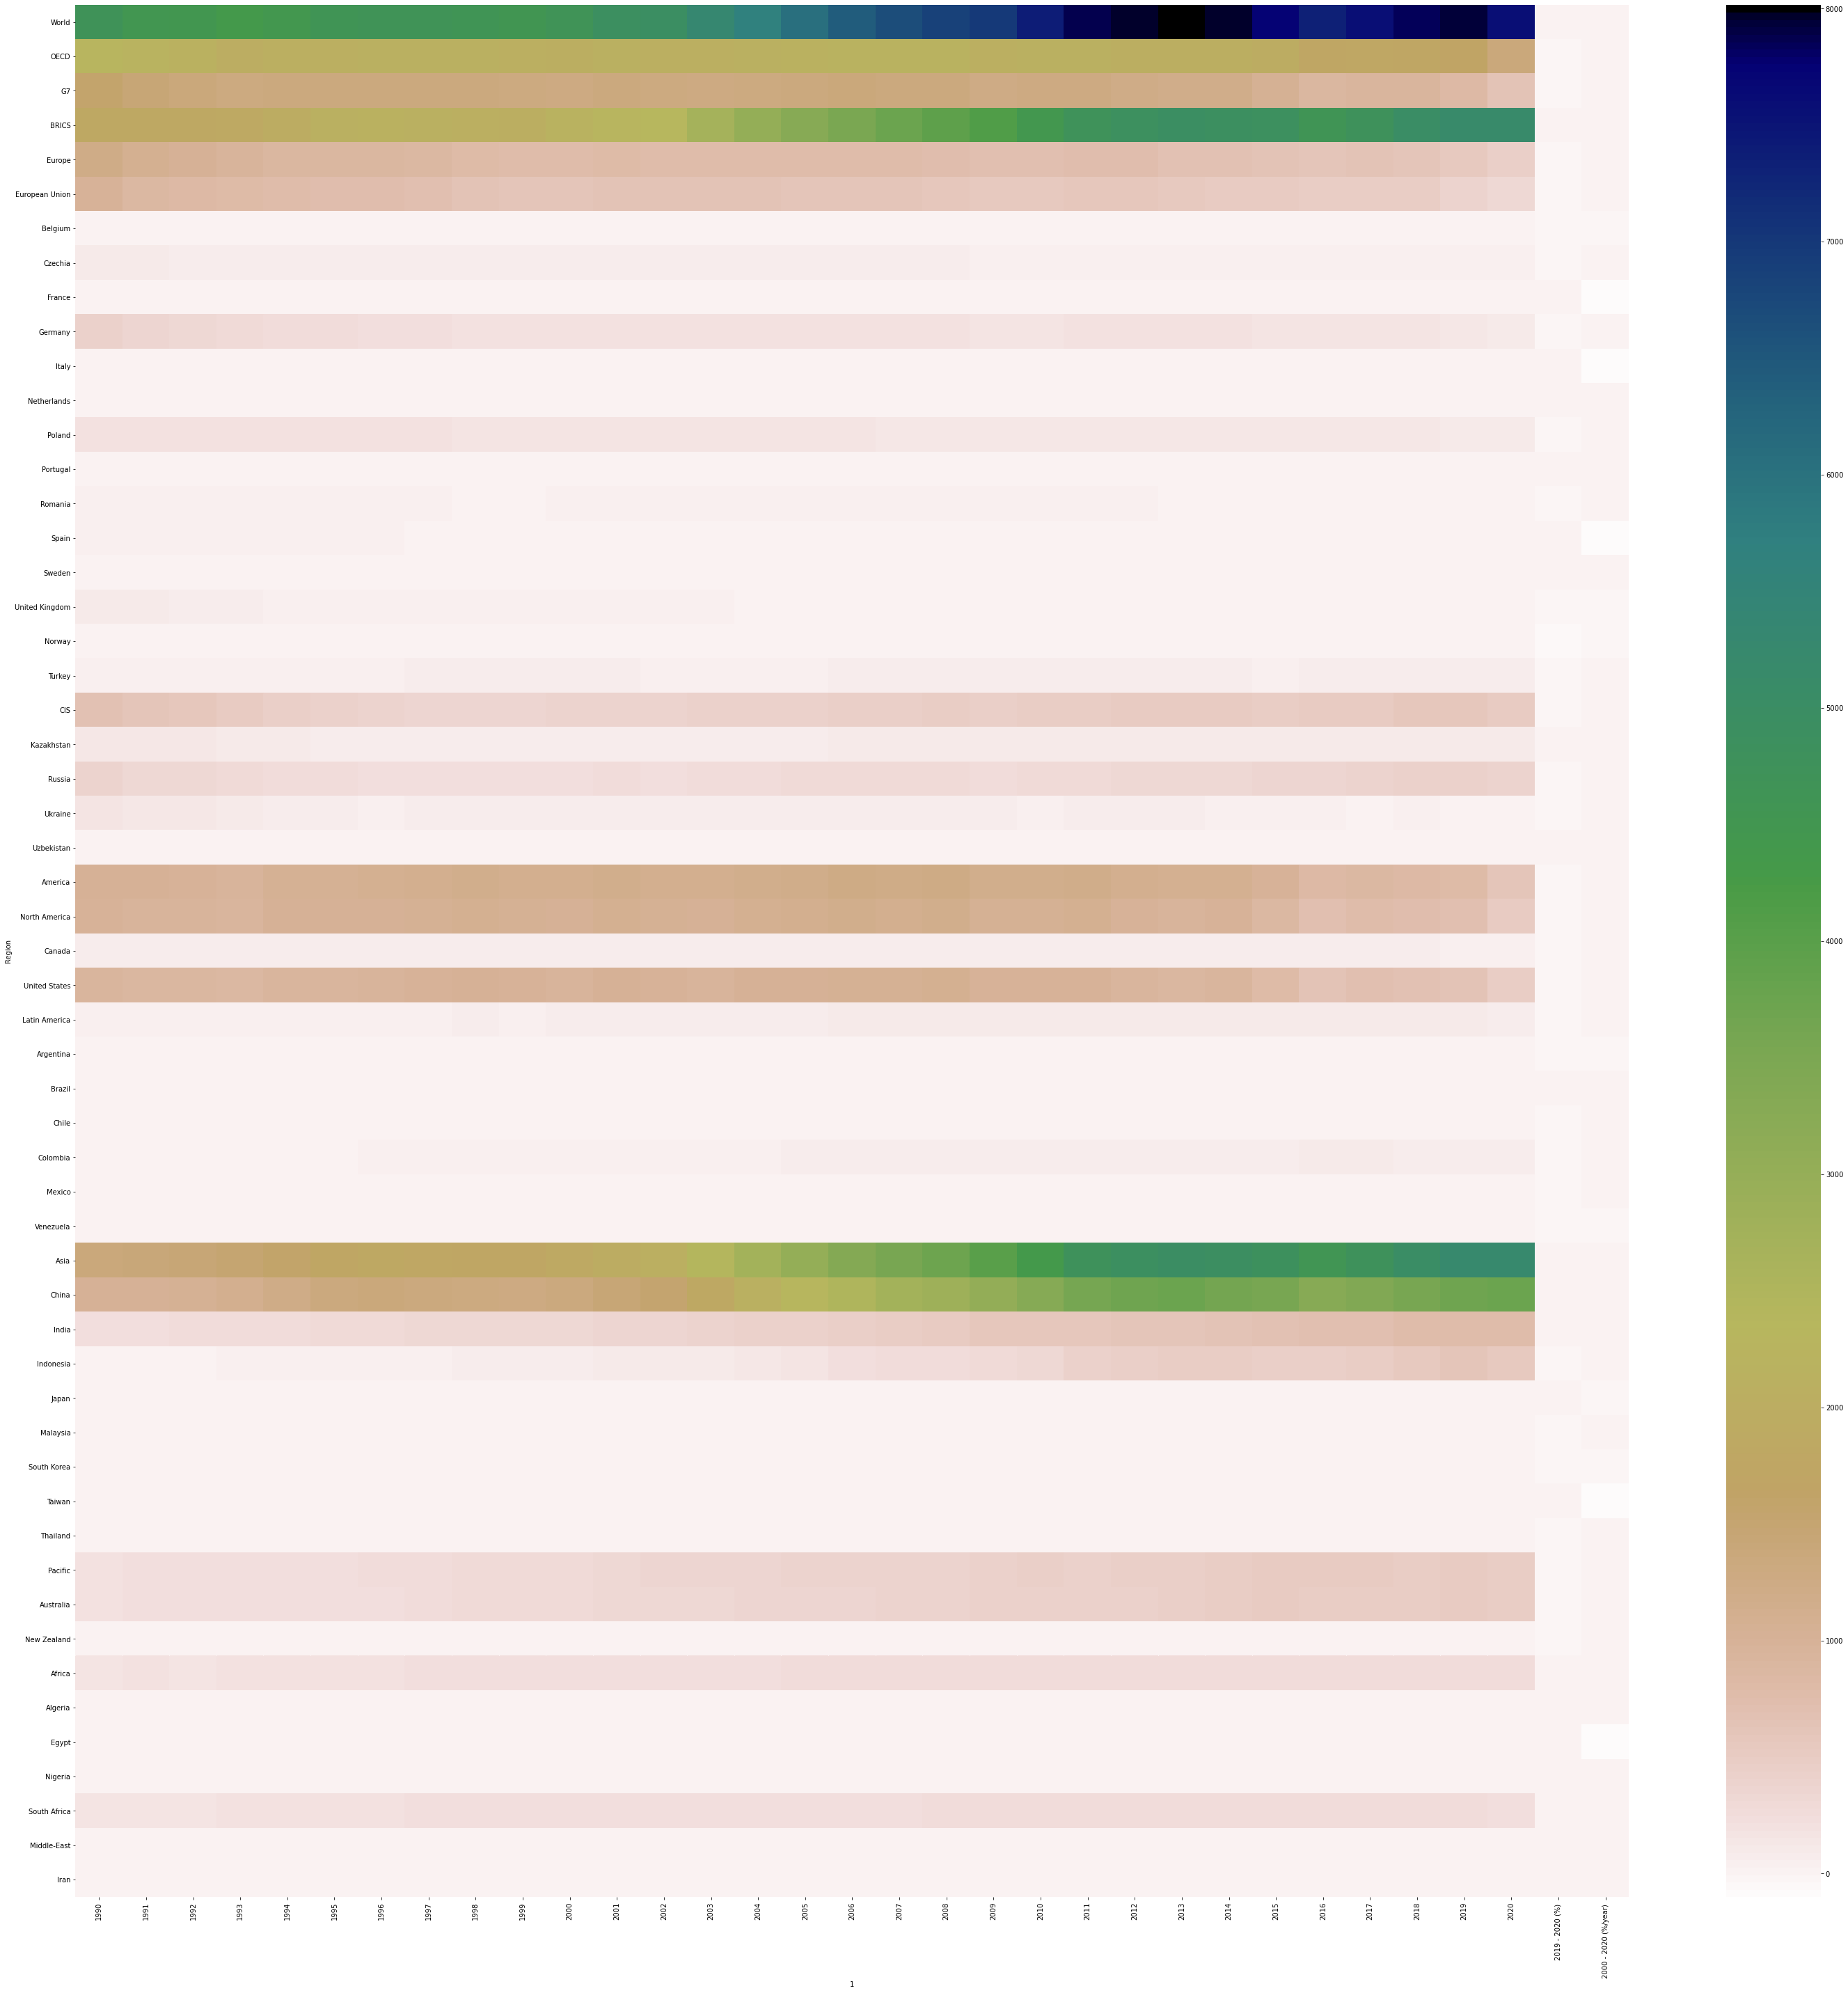

In [23]:
# import plotly.express as px
# sns.set_palette("YlOrBr")
plt.figure(figsize=(50,50))
sns.heatmap(df_pro, cmap="gist_earth_r")

In [24]:
large_regions = ['Europe', 'European Union', 'United Kingdom', 'North America', 'Latin America', 'Asia', 'Australia', 'Middle-East', 'Africa']
large_regions

['Europe',
 'European Union',
 'United Kingdom',
 'North America',
 'Latin America',
 'Asia',
 'Australia',
 'Middle-East',
 'Africa']

In [25]:
df_large_regions = df[df['Region'].isin(large_regions)]
df_large_regions      

1           Region         1990         1991         1992         1993  \
4           Europe  1209.388000  1088.551000  1026.659000   962.868000   
5   European Union   994.573000   882.171000   829.617000   788.849000   
17  United Kingdom    92.762000    94.922000    84.493000    68.199000   
26   North America  1001.893000   974.676000   970.583000   926.701000   
29   Latin America    37.646000    36.274000    37.016000    37.768000   
36            Asia  1375.827918  1398.712914  1440.635909  1488.375855   
46       Australia   204.562000   219.607000   228.339000   226.065000   
48          Africa   182.466919   186.385542   182.683525   195.771110   
53     Middle-East     1.138000     1.194000     1.032000     1.533000   

1          1994         1995         1996         1997         1998  \
4    909.803000   909.800000   900.969000   879.833000   819.203000   
5    763.167000   751.834000   744.704000   715.853000   650.979000   
17    49.785000    53.037000    50.197000    48.495000    41.177000   
26  1010.403000  1012.079000  1040.968000  1067.443000  1088.948000   
29    42.498000    45.625000    50.080000    55.077000    59.161000   
36  1586.032891  1751.549591  1817.906309  1790.149361  1747.444745   
46   225.402000   241.807000   247.149000   264.458000   287.351000   
48   202.970074   213.074570   212.655428   225.741050   229.063413   
53     1.493000     1.554000     1.441000     1.448000     1.701000   

1          1999         2000        2001         2002         2003  \
4    777.944000   778.299000   788.58700   782.284000   781.691000   
5    626.129000   626.133000   634.41900   635.980000   638.621000   
17    37.077000    31.198000    31.93000    29.989000    28.279000   
26  1068.581000  1040.754000  1091.77200  1059.225000  1034.432000   
29    56.523000    64.917000    69.68000    64.145000    74.581000   
36  1734.622273  1851.270256  1978.47000  2085.987000  2404.925000   
46   291.002000   306.722000   329.17700   339.898000   341.661000   
48   230.176266   230.611191   229.69041   226.515349   244.082037   
53     1.535000     1.538000     1.52900     1.490000     1.580000   

1          2004         2005         2006         2007         2008  \
4    767.803000   757.905000   758.742000   760.671000   749.085000   
5    630.279000   618.600000   611.935000   602.842000   581.097000   
17    25.096000    20.498000    18.517000    17.007000    18.054000   
26  1085.126000  1108.619000  1137.805000  1127.032000  1143.631000   
29    79.761000    86.600000    94.369000    98.641000   100.396000   
36  2740.691000  3036.083279  3329.259966  3576.937261  3733.617704   
46   350.304000   370.590000   374.653000   391.039000   392.251000   
48   248.011891   250.281741   249.923740   252.498609   256.239524   
53     1.663000     1.985000     2.103000     2.094000     2.017000   

1          2009         2010         2011         2012         2013  \
4    723.282000   705.496000   739.388000   730.340000   690.104000   
5    556.316000   545.534000   572.045000   574.316000   546.426000   
17    17.874000    18.346000    18.552000    16.967000    12.768000   
26  1050.488000  1064.001000  1073.428000   998.857000   973.810000   
29    95.577000    98.565000   113.828000   113.606000   113.527000   
36  4018.483545  4344.101815  4769.954504  4885.558631  4981.245744   
46   407.898000   435.876000   414.803000   434.700000   458.430000   
48   253.553200   259.002020   257.620954   268.362862   267.262565   
53     1.596000     1.521000     1.580000     1.464000     1.526000   

1          2014         2015         2016         2017         2018  \
4    664.413000   653.711000   624.687000   635.384020   628.517079   
5    528.851000   519.544000   479.246000   489.941483   475.148040   
17    11.647000     8.598000     4.178000     3.041401     2.580922   
26   985.642000   876.034000   720.020000   764.424000   746.270000   
29   117.534000   108.476000   113.783000   110.372039   104.079205   

In [26]:
df_large_regions.reset_index(drop=True, inplace=True)
df_large_regions

1          Region         1990         1991         1992         1993  \
0          Europe  1209.388000  1088.551000  1026.659000   962.868000   
1  European Union   994.573000   882.171000   829.617000   788.849000   
2  United Kingdom    92.762000    94.922000    84.493000    68.199000   
3   North America  1001.893000   974.676000   970.583000   926.701000   
4   Latin America    37.646000    36.274000    37.016000    37.768000   
5            Asia  1375.827918  1398.712914  1440.635909  1488.375855   
6       Australia   204.562000   219.607000   228.339000   226.065000   
7          Africa   182.466919   186.385542   182.683525   195.771110   
8     Middle-East     1.138000     1.194000     1.032000     1.533000   

1         1994         1995         1996         1997         1998  \
0   909.803000   909.800000   900.969000   879.833000   819.203000   
1   763.167000   751.834000   744.704000   715.853000   650.979000   
2    49.785000    53.037000    50.197000    48.495000    41.177000   
3  1010.403000  1012.079000  1040.968000  1067.443000  1088.948000   
4    42.498000    45.625000    50.080000    55.077000    59.161000   
5  1586.032891  1751.549591  1817.906309  1790.149361  1747.444745   
6   225.402000   241.807000   247.149000   264.458000   287.351000   
7   202.970074   213.074570   212.655428   225.741050   229.063413   
8     1.493000     1.554000     1.441000     1.448000     1.701000   

1         1999         2000        2001         2002         2003  \
0   777.944000   778.299000   788.58700   782.284000   781.691000   
1   626.129000   626.133000   634.41900   635.980000   638.621000   
2    37.077000    31.198000    31.93000    29.989000    28.279000   
3  1068.581000  1040.754000  1091.77200  1059.225000  1034.432000   
4    56.523000    64.917000    69.68000    64.145000    74.581000   
5  1734.622273  1851.270256  1978.47000  2085.987000  2404.925000   
6   291.002000   306.722000   329.17700   339.898000   341.661000   
7   230.176266   230.611191   229.69041   226.515349   244.082037   
8     1.535000     1.538000     1.52900     1.490000     1.580000   

1         2004         2005         2006         2007         2008  \
0   767.803000   757.905000   758.742000   760.671000   749.085000   
1   630.279000   618.600000   611.935000   602.842000   581.097000   
2    25.096000    20.498000    18.517000    17.007000    18.054000   
3  1085.126000  1108.619000  1137.805000  1127.032000  1143.631000   
4    79.761000    86.600000    94.369000    98.641000   100.396000   
5  2740.691000  3036.083279  3329.259966  3576.937261  3733.617704   
6   350.304000   370.590000   374.653000   391.039000   392.251000   
7   248.011891   250.281741   249.923740   252.498609   256.239524   
8     1.663000     1.985000     2.103000     2.094000     2.017000   

1         2009         2010         2011         2012         2013  \
0   723.282000   705.496000   739.388000   730.340000   690.104000   
1   556.316000   545.534000   572.045000   574.316000   546.426000   
2    17.874000    18.346000    18.552000    16.967000    12.768000   
3  1050.488000  1064.001000  1073.428000   998.857000   973.810000   
4    95.577000    98.565000   113.828000   113.606000   113.527000   
5  4018.483545  4344.101815  4769.954504  4885.558631  4981.245744   
6   407.898000   435.876000   414.803000   434.700000   458.430000   
7   253.553200   259.002020   257.620954   268.362862   267.262565   
8     1.596000     1.521000     1.580000     1.464000     1.526000   

1         2014         2015         2016         2017         2018  \
0   664.413000   653.711000   624.687000   635.384020   628.517079   
1   528.851000   519.544000   479.246000   489.941483   475.148040   
2    11.647000     8.598000     4.178000     3.041401     2.580922   
3   985.642000   876.034000   720.020000   764.424000   746.270000   
4   117.534000   108.476000   113.783000   110.372039   104.079205   
5  4919.764291  4829.355964  4591.026983  4768.780484  

In [27]:
associations = ['World', 'OECD', 'G7', 'BRICS']
associations

['World', 'OECD', 'G7', 'BRICS']

In [28]:
df_assoc = df[df['Region'].isin(associations)]
df_assoc  

1 Region         1990         1991         1992         1993         1994  \
0  World  4698.288837  4526.830456  4478.840434  4361.452965  4441.438965   
1   OECD  2308.374000  2191.172000  2126.165000  2017.686000  2061.141000   
2     G7  1551.632000  1444.011000  1389.490000  1299.959000  1341.687000   
3  BRICS  1821.086000  1806.950000  1830.705000  1856.011000  1932.811000   

1         1995         1996         1997         1998         1999  \
0  4597.941161  4660.912737  4658.417411  4592.788158  4532.045539   
1  2068.137000  2092.363000  2116.492000  2103.476000  2064.346000   
2  1333.285000  1346.579000  1355.965000  1351.647000  1320.428000   
3  2090.351000  2142.278000  2113.249000  2060.135000  2054.953000   

1         2000        2001         2002         2003         2004        2005  \
0  4665.173447  4889.85041  4945.344349  5295.846037  5691.124891  6055.83602   
1  2039.693000  2117.86900  2085.507000  2056.876000  2105.148000  2146.02500   
2  1284.242000  1335.51200  1303.862000  1274.541000  1323.674000  1337.13200   
3  2163.880000  2279.93100  2367.807000  2706.886000  3008.319000  3290.35900   

1         2006        2007         2008         2009         2010  \
0  6405.335706  6672.87487  6870.319228  7000.055745  7389.548835   
1  2174.899000  2178.76900  2177.314000  2075.452000  2103.422000   
2  1358.330000  1350.49300  1357.825000  1254.615000  1267.365000   
3  3518.634000  3756.84600  3934.051000  4140.911000  4446.229000   

1         2011         2012         2013        2014        2015        2016  \
0  7867.136458  7965.289493  8015.830309  7970.34255  7743.49178  7326.32305   
1  2111.548000  2054.044000  2026.561000  2053.86900  1935.30600  1744.71300   
2  1282.878000  1214.431000  1179.171000  1185.50800  1070.69200   901.11100   
3  4745.816000  4876.158000  4950.951000  4900.17700  4863.02400  4601.66800   

1         2017         2018         2019         2020  2019 - 2020 (%)   \
0  7584.222847  7843.504293  7937.827732  7581.723200         -4.486171   
1  1791.381471  1759.510803  1649.216882  1379.819919        -16.334841   
2   943.915298   919.197819   828.505792   640.820220        -22.653502   
3  4769.781415  5005.633298  5143.578817  5159.815313          0.315665   

1  2000 - 2020 (%/year)   
0               2.457795  
1              -1.935260  
2              -3.416160  
3               4.440766

In [29]:
df_countries = df[~df['Region'].isin(large_regions) & ~df['Region'].isin(associations)]
df_countries      

1          Region      1990      1991      1992      1993      1994      1995  \
6         Belgium     2.357     2.107     1.197     0.971     0.753     0.637   
7         Czechia   101.398    96.864    86.721    85.239    76.944    74.901   
8          France    13.532    12.876    11.827    10.662     9.610     9.896   
9         Germany   434.446   352.645   314.160   286.561   264.880   251.784   
10          Italy     1.014     0.961     0.825     0.630     0.267     0.172   
11    Netherlands     0.000     0.000     0.000     0.000     0.000     0.000   
12         Poland   215.320   209.782   198.472   198.584   200.703   200.713   
13       Portugal     0.281     0.270     0.221     0.197     0.147     0.000   
14        Romania    38.183    32.414    38.370    39.777    40.566    41.127   
15          Spain    35.682    33.562    33.471    31.583    29.633    28.305   
16         Sweden     0.592     0.746     0.746     0.718     0.686     0.752   
18         Norway     0.303     0.330     0.359     0.268     0.301     0.292   
19         Turkey    47.428    46.108    51.431    48.560    54.371    55.073   
20            CIS   682.789   618.741   588.874   519.034   459.804   418.875   
21     Kazakhstan   131.443   130.382   126.536   111.880   104.625    84.494   
22         Russia   376.613   337.863   323.545   288.613   257.311   249.769   
23        Ukraine   159.213   135.230   126.375   108.717    88.598    77.875   
24     Uzbekistan     6.400     6.750     5.531     4.657     4.650     3.054   
25        America  1039.539  1010.950  1007.599   964.469  1052.901  1057.704   
27         Canada    68.332    71.134    65.614    69.003    72.823    74.981   
28  United States   933.561   903.542   904.969   857.698   937.580   937.098   
30      Argentina     0.274     0.289     0.200     0.166     0.344     0.302   
31         Brazil     4.595     5.188     4.731     4.595     5.134     5.199   
32          Chile     2.183     2.208     1.626     1.355     1.182     1.038   
33       Colombia    21.375    19.894    21.817    21.139    22.599    25.651   
34         Mexico     6.933     6.463     6.104     6.615     8.898     9.320   
35      Venezuela     2.189     2.175     2.450     3.815     4.278     4.064   
37          China  1039.820  1040.692  1072.800  1112.298  1202.836  1338.746   
38          India   225.258   245.007   255.229   262.291   271.725   290.426   
39      Indonesia    10.230    13.271    22.008    28.314    30.687    41.828   
40          Japan     7.985     7.931     7.602     7.206     6.742     6.317   
41       Malaysia     0.111     0.200     0.084     0.419     0.141     0.135   
42    South Korea    17.217    15.058    11.970     9.443     7.438     5.720   
43         Taiwan     0.472     0.402     0.335     0.328     0.285     0.235   
44       Thailand    12.421    14.689    15.357    15.546    17.095    18.421   
45        Pacific   207.140   222.296   231.357   229.402   228.435   245.384   
47    New Zealand     2.578     2.689     3.018     3.337     3.033     3.577   
49        Algeria     0.000     0.000     0.000     0.000     0.000     0.000   
50          Egypt     0.000     0.000     0.000     0.000     0.000     0.000   
51        Nigeria     0.090     0.100     0.087     0.028     0.025     0.020   
52   South Africa   174.800   178.200   174.400   188.214   195.805   206.211   
54           Iran     0.835     0.858     0.677     1.134     1.112     1.084   

1       1996      1997      1998      1999      2000      2001      2002  \
6      0.560     0.427     0.312     0.364     0.375     0.218     0.173   
7     77.145    74.016    67.529    59.133    65.162    66.106    63.356   
8      8.553     7.316     6.112     5.690     4.100     2.671     2.068   
9    240.558   228.525   211.523   205.275   205.212   206.178   211.132   
10     0.137     0.216     0.189     0.115     0.014     0.139     0.163   
11     0.000     0.000     0.000     0.000     0.000     0.0

In [30]:
df_countries.reset_index(drop=True, inplace=True)
df_countries

1          Region      1990      1991      1992      1993      1994      1995  \
0         Belgium     2.357     2.107     1.197     0.971     0.753     0.637   
1         Czechia   101.398    96.864    86.721    85.239    76.944    74.901   
2          France    13.532    12.876    11.827    10.662     9.610     9.896   
3         Germany   434.446   352.645   314.160   286.561   264.880   251.784   
4           Italy     1.014     0.961     0.825     0.630     0.267     0.172   
5     Netherlands     0.000     0.000     0.000     0.000     0.000     0.000   
6          Poland   215.320   209.782   198.472   198.584   200.703   200.713   
7        Portugal     0.281     0.270     0.221     0.197     0.147     0.000   
8         Romania    38.183    32.414    38.370    39.777    40.566    41.127   
9           Spain    35.682    33.562    33.471    31.583    29.633    28.305   
10         Sweden     0.592     0.746     0.746     0.718     0.686     0.752   
11         Norway     0.303     0.330     0.359     0.268     0.301     0.292   
12         Turkey    47.428    46.108    51.431    48.560    54.371    55.073   
13            CIS   682.789   618.741   588.874   519.034   459.804   418.875   
14     Kazakhstan   131.443   130.382   126.536   111.880   104.625    84.494   
15         Russia   376.613   337.863   323.545   288.613   257.311   249.769   
16        Ukraine   159.213   135.230   126.375   108.717    88.598    77.875   
17     Uzbekistan     6.400     6.750     5.531     4.657     4.650     3.054   
18        America  1039.539  1010.950  1007.599   964.469  1052.901  1057.704   
19         Canada    68.332    71.134    65.614    69.003    72.823    74.981   
20  United States   933.561   903.542   904.969   857.698   937.580   937.098   
21      Argentina     0.274     0.289     0.200     0.166     0.344     0.302   
22         Brazil     4.595     5.188     4.731     4.595     5.134     5.199   
23          Chile     2.183     2.208     1.626     1.355     1.182     1.038   
24       Colombia    21.375    19.894    21.817    21.139    22.599    25.651   
25         Mexico     6.933     6.463     6.104     6.615     8.898     9.320   
26      Venezuela     2.189     2.175     2.450     3.815     4.278     4.064   
27          China  1039.820  1040.692  1072.800  1112.298  1202.836  1338.746   
28          India   225.258   245.007   255.229   262.291   271.725   290.426   
29      Indonesia    10.230    13.271    22.008    28.314    30.687    41.828   
30          Japan     7.985     7.931     7.602     7.206     6.742     6.317   
31       Malaysia     0.111     0.200     0.084     0.419     0.141     0.135   
32    South Korea    17.217    15.058    11.970     9.443     7.438     5.720   
33         Taiwan     0.472     0.402     0.335     0.328     0.285     0.235   
34       Thailand    12.421    14.689    15.357    15.546    17.095    18.421   
35        Pacific   207.140   222.296   231.357   229.402   228.435   245.384   
36    New Zealand     2.578     2.689     3.018     3.337     3.033     3.577   
37        Algeria     0.000     0.000     0.000     0.000     0.000     0.000   
38          Egypt     0.000     0.000     0.000     0.000     0.000     0.000   
39        Nigeria     0.090     0.100     0.087     0.028     0.025     0.020   
40   South Africa   174.800   178.200   174.400   188.214   195.805   206.211   
41           Iran     0.835     0.858     0.677     1.134     1.112     1.084   

1       1996      1997      1998      1999      2000      2001      2002  \
0      0.560     0.427     0.312     0.364     0.375     0.218     0.173   
1     77.145    74.016    67.529    59.133    65.162    66.106    63.356   
2      8.553     7.316     6.112     5.690     4.100     2.671     2.068   
3    240.558   228.525   211.523   205.275   205.212   206.178   211.132   
4      0.137     0.216     0.189     0.115     0.014     0.139     0.163   
5      0.000     0.000     0.000     0.000     0.000     0.0

# For Large Regions

In [31]:
df_large_regions

1          Region         1990         1991         1992         1993  \
0          Europe  1209.388000  1088.551000  1026.659000   962.868000   
1  European Union   994.573000   882.171000   829.617000   788.849000   
2  United Kingdom    92.762000    94.922000    84.493000    68.199000   
3   North America  1001.893000   974.676000   970.583000   926.701000   
4   Latin America    37.646000    36.274000    37.016000    37.768000   
5            Asia  1375.827918  1398.712914  1440.635909  1488.375855   
6       Australia   204.562000   219.607000   228.339000   226.065000   
7          Africa   182.466919   186.385542   182.683525   195.771110   
8     Middle-East     1.138000     1.194000     1.032000     1.533000   

1         1994         1995         1996         1997         1998  \
0   909.803000   909.800000   900.969000   879.833000   819.203000   
1   763.167000   751.834000   744.704000   715.853000   650.979000   
2    49.785000    53.037000    50.197000    48.495000    41.177000   
3  1010.403000  1012.079000  1040.968000  1067.443000  1088.948000   
4    42.498000    45.625000    50.080000    55.077000    59.161000   
5  1586.032891  1751.549591  1817.906309  1790.149361  1747.444745   
6   225.402000   241.807000   247.149000   264.458000   287.351000   
7   202.970074   213.074570   212.655428   225.741050   229.063413   
8     1.493000     1.554000     1.441000     1.448000     1.701000   

1         1999         2000        2001         2002         2003  \
0   777.944000   778.299000   788.58700   782.284000   781.691000   
1   626.129000   626.133000   634.41900   635.980000   638.621000   
2    37.077000    31.198000    31.93000    29.989000    28.279000   
3  1068.581000  1040.754000  1091.77200  1059.225000  1034.432000   
4    56.523000    64.917000    69.68000    64.145000    74.581000   
5  1734.622273  1851.270256  1978.47000  2085.987000  2404.925000   
6   291.002000   306.722000   329.17700   339.898000   341.661000   
7   230.176266   230.611191   229.69041   226.515349   244.082037   
8     1.535000     1.538000     1.52900     1.490000     1.580000   

1         2004         2005         2006         2007         2008  \
0   767.803000   757.905000   758.742000   760.671000   749.085000   
1   630.279000   618.600000   611.935000   602.842000   581.097000   
2    25.096000    20.498000    18.517000    17.007000    18.054000   
3  1085.126000  1108.619000  1137.805000  1127.032000  1143.631000   
4    79.761000    86.600000    94.369000    98.641000   100.396000   
5  2740.691000  3036.083279  3329.259966  3576.937261  3733.617704   
6   350.304000   370.590000   374.653000   391.039000   392.251000   
7   248.011891   250.281741   249.923740   252.498609   256.239524   
8     1.663000     1.985000     2.103000     2.094000     2.017000   

1         2009         2010         2011         2012         2013  \
0   723.282000   705.496000   739.388000   730.340000   690.104000   
1   556.316000   545.534000   572.045000   574.316000   546.426000   
2    17.874000    18.346000    18.552000    16.967000    12.768000   
3  1050.488000  1064.001000  1073.428000   998.857000   973.810000   
4    95.577000    98.565000   113.828000   113.606000   113.527000   
5  4018.483545  4344.101815  4769.954504  4885.558631  4981.245744   
6   407.898000   435.876000   414.803000   434.700000   458.430000   
7   253.553200   259.002020   257.620954   268.362862   267.262565   
8     1.596000     1.521000     1.580000     1.464000     1.526000   

1         2014         2015         2016         2017         2018  \
0   664.413000   653.711000   624.687000   635.384020   628.517079   
1   528.851000   519.544000   479.246000   489.941483   475.148040   
2    11.647000     8.598000     4.178000     3.041401     2.580922   
3   985.642000   876.034000   720.020000   764.424000   746.270000   
4   117.534000   108.476000   113.783000   110.372039   104.079205   
5  4919.764291  4829.355964  4591.026983  4768.780484  

In [32]:
df_large_regions2 = df_large_regions.copy()
df_large_regions2

1          Region         1990         1991         1992         1993  \
0          Europe  1209.388000  1088.551000  1026.659000   962.868000   
1  European Union   994.573000   882.171000   829.617000   788.849000   
2  United Kingdom    92.762000    94.922000    84.493000    68.199000   
3   North America  1001.893000   974.676000   970.583000   926.701000   
4   Latin America    37.646000    36.274000    37.016000    37.768000   
5            Asia  1375.827918  1398.712914  1440.635909  1488.375855   
6       Australia   204.562000   219.607000   228.339000   226.065000   
7          Africa   182.466919   186.385542   182.683525   195.771110   
8     Middle-East     1.138000     1.194000     1.032000     1.533000   

1         1994         1995         1996         1997         1998  \
0   909.803000   909.800000   900.969000   879.833000   819.203000   
1   763.167000   751.834000   744.704000   715.853000   650.979000   
2    49.785000    53.037000    50.197000    48.495000    41.177000   
3  1010.403000  1012.079000  1040.968000  1067.443000  1088.948000   
4    42.498000    45.625000    50.080000    55.077000    59.161000   
5  1586.032891  1751.549591  1817.906309  1790.149361  1747.444745   
6   225.402000   241.807000   247.149000   264.458000   287.351000   
7   202.970074   213.074570   212.655428   225.741050   229.063413   
8     1.493000     1.554000     1.441000     1.448000     1.701000   

1         1999         2000        2001         2002         2003  \
0   777.944000   778.299000   788.58700   782.284000   781.691000   
1   626.129000   626.133000   634.41900   635.980000   638.621000   
2    37.077000    31.198000    31.93000    29.989000    28.279000   
3  1068.581000  1040.754000  1091.77200  1059.225000  1034.432000   
4    56.523000    64.917000    69.68000    64.145000    74.581000   
5  1734.622273  1851.270256  1978.47000  2085.987000  2404.925000   
6   291.002000   306.722000   329.17700   339.898000   341.661000   
7   230.176266   230.611191   229.69041   226.515349   244.082037   
8     1.535000     1.538000     1.52900     1.490000     1.580000   

1         2004         2005         2006         2007         2008  \
0   767.803000   757.905000   758.742000   760.671000   749.085000   
1   630.279000   618.600000   611.935000   602.842000   581.097000   
2    25.096000    20.498000    18.517000    17.007000    18.054000   
3  1085.126000  1108.619000  1137.805000  1127.032000  1143.631000   
4    79.761000    86.600000    94.369000    98.641000   100.396000   
5  2740.691000  3036.083279  3329.259966  3576.937261  3733.617704   
6   350.304000   370.590000   374.653000   391.039000   392.251000   
7   248.011891   250.281741   249.923740   252.498609   256.239524   
8     1.663000     1.985000     2.103000     2.094000     2.017000   

1         2009         2010         2011         2012         2013  \
0   723.282000   705.496000   739.388000   730.340000   690.104000   
1   556.316000   545.534000   572.045000   574.316000   546.426000   
2    17.874000    18.346000    18.552000    16.967000    12.768000   
3  1050.488000  1064.001000  1073.428000   998.857000   973.810000   
4    95.577000    98.565000   113.828000   113.606000   113.527000   
5  4018.483545  4344.101815  4769.954504  4885.558631  4981.245744   
6   407.898000   435.876000   414.803000   434.700000   458.430000   
7   253.553200   259.002020   257.620954   268.362862   267.262565   
8     1.596000     1.521000     1.580000     1.464000     1.526000   

1         2014         2015         2016         2017         2018  \
0   664.413000   653.711000   624.687000   635.384020   628.517079   
1   528.851000   519.544000   479.246000   489.941483   475.148040   
2    11.647000     8.598000     4.178000     3.041401     2.580922   
3   985.642000   876.034000   720.020000   764.424000   746.270000   
4   117.534000   108.476000   113.783000   110.372039   104.079205   
5  4919.764291  4829.355964  4591.026983  4768.780484  

In [33]:
df_large_regions2.set_index('Region', inplace=True)
df_large_regions2

1                      1990         1991         1992         1993  \
Region                                                               
Europe          1209.388000  1088.551000  1026.659000   962.868000   
European Union   994.573000   882.171000   829.617000   788.849000   
United Kingdom    92.762000    94.922000    84.493000    68.199000   
North America   1001.893000   974.676000   970.583000   926.701000   
Latin America     37.646000    36.274000    37.016000    37.768000   
Asia            1375.827918  1398.712914  1440.635909  1488.375855   
Australia        204.562000   219.607000   228.339000   226.065000   
Africa           182.466919   186.385542   182.683525   195.771110   
Middle-East        1.138000     1.194000     1.032000     1.533000   

1                      1994         1995         1996         1997  \
Region                                                               
Europe           909.803000   909.800000   900.969000   879.833000   
European Union   763.167000   751.834000   744.704000   715.853000   
United Kingdom    49.785000    53.037000    50.197000    48.495000   
North America   1010.403000  1012.079000  1040.968000  1067.443000   
Latin America     42.498000    45.625000    50.080000    55.077000   
Asia            1586.032891  1751.549591  1817.906309  1790.149361   
Australia        225.402000   241.807000   247.149000   264.458000   
Africa           202.970074   213.074570   212.655428   225.741050   
Middle-East        1.493000     1.554000     1.441000     1.448000   

1                      1998         1999         2000        2001  \
Region                                                              
Europe           819.203000   777.944000   778.299000   788.58700   
European Union   650.979000   626.129000   626.133000   634.41900   
United Kingdom    41.177000    37.077000    31.198000    31.93000   
North America   1088.948000  1068.581000  1040.754000  1091.77200   
Latin America     59.161000    56.523000    64.917000    69.68000   
Asia            1747.444745  1734.622273  1851.270256  1978.47000   
Australia        287.351000   291.002000   306.722000   329.17700   
Africa           229.063413   230.176266   230.611191   229.69041   
Middle-East        1.701000     1.535000     1.538000     1.52900   

1                      2002         2003         2004         2005  \
Region                                                               
Europe           782.284000   781.691000   767.803000   757.905000   
European Union   635.980000   638.621000   630.279000   618.600000   
United Kingdom    29.989000    28.279000    25.096000    20.498000   
North America   1059.225000  1034.432000  1085.126000  1108.619000   
Latin America     64.145000    74.581000    79.761000    86.600000   
Asia            2085.987000  2404.925000  2740.691000  3036.083279   
Australia        339.898000   341.661000   350.304000   370.590000   
Africa           226.515349   244.082037   248.011891   250.281741   
Middle-East        1.490000     1.580000     1.663000     1.985000   

1                      2006         2007         2008         2009  \
Region                                                               
Europe           758.742000   760.671000   749.085000   723.282000   
European Union   611.935000   602.842000   581.097000   556.316000   
United Kingdom    18.517000    17.007000    18.054000    17.874000   
North America   1137.805000  1127.032000  1143.631000  1050.488000   
Latin America     94.369000    98.641000   100.396000    95.577000   
Asia            3329.259966  3576.937261  3733.617704  4018.483545   
Australia        374.653000   391.039000   392.251000   407.898000   
Africa           249.923740   252.498609   256.239524   253.553200   
Middle-East        2.103000     2.094000     2.017000     1.596000   

1                      2010         2011         2012         2013  \
Region                                                               
Europe          

In [34]:
plt.rcParams.update({'font.size': 22})

<AxesSubplot:xlabel='1', ylabel='Region'>

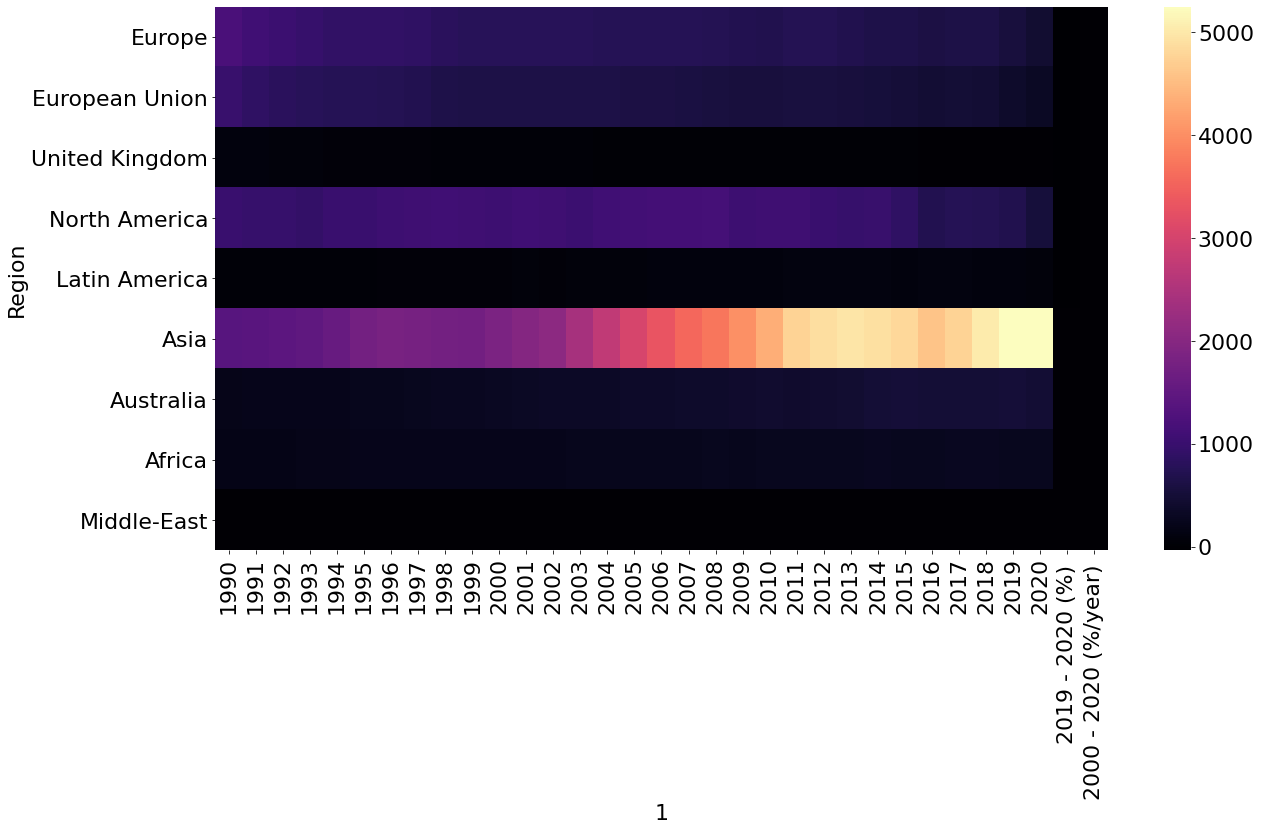

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df_large_regions2, cmap="magma")

In [36]:
df_large_regions2_T = df_large_regions2.T
df_large_regions2_T

Region                      Europe  European Union  United Kingdom  \
1                                                                    
1990                   1209.388000      994.573000       92.762000   
1991                   1088.551000      882.171000       94.922000   
1992                   1026.659000      829.617000       84.493000   
1993                    962.868000      788.849000       68.199000   
1994                    909.803000      763.167000       49.785000   
1995                    909.800000      751.834000       53.037000   
1996                    900.969000      744.704000       50.197000   
1997                    879.833000      715.853000       48.495000   
1998                    819.203000      650.979000       41.177000   
1999                    777.944000      626.129000       37.077000   
2000                    778.299000      626.133000       31.198000   
2001                    788.587000      634.419000       31.930000   
2002                    782.284000      635.980000       29.989000   
2003                    781.691000      638.621000       28.279000   
2004                    767.803000      630.279000       25.096000   
2005                    757.905000      618.600000       20.498000   
2006                    758.742000      611.935000       18.517000   
2007                    760.671000      602.842000       17.007000   
2008                    749.085000      581.097000       18.054000   
2009                    723.282000      556.316000       17.874000   
2010                    705.496000      545.534000       18.346000   
2011                    739.388000      572.045000       18.552000   
2012                    730.340000      574.316000       16.967000   
2013                    690.104000      546.426000       12.768000   
2014                    664.413000      528.851000       11.647000   
2015                    653.711000      519.544000        8.598000   
2016                    624.687000      479.246000        4.178000   
2017                    635.384020      489.941483        3.041401   
2018                    628.517079      475.148040        2.580922   
2019                    549.212713      391.519621        2.431808   
2020                    454.442307      326.757077        1.570234   
2019 - 2020 (%)         -17.255683      -16.541328      -35.429361   
2000 - 2020 (%/year)     -2.654335       -3.199429      -13.882407   

Region                 North America  Latin America         Asia   Australia  \
1                                                                              
1990                     1001.893000      37.646000  1375.827918  204.562000   
1991                      974.676000      36.274000  1398.712914  219.607000   
1992                      970.583000      37.016000  1440.635909  228.339000   
1993                      926.701000      37.768000  1488.375855  226.065000   
1994                     1010.403000      42.498000  1586.032891  225.402000   
1995                     1012.079000      45.625000  1751.549591  241.807000   
1996                     1040.968000      50.080000  1817.906309  247.149000   
1997                     1067.443000      55.077000  1790.149361  264.458000   
1998                     1088.948000      59.161000  1747.444745  287.351000   
1999                     1068.581000      56.523000  1734.622273  291.002000   
2000                     1040.754000      64.917000  1851.270256  306.722000   
2001                     1091.772000      69.680000  1978.470000  329.177000   
2002                     1059.225000      64.145000  2085.987000  339.898000   
2003                     1034.432000      74.581000  2404.925000  341.661000   
2004                     1085.126000      79.761000  2740.691000  350.304000   
2005                     1108.619000      86.600000  3036.083279  370.590000   
2006                     1137.805000      94.369000  3329.259966  374.653000   
2007                     1127

In [37]:
df_large_regions2_T.drop(df_large_regions2_T.tail(2).index,inplace=True)
df_large_regions2_T

Region       Europe  European Union  United Kingdom  North America  \
1                                                                    
1990    1209.388000      994.573000       92.762000    1001.893000   
1991    1088.551000      882.171000       94.922000     974.676000   
1992    1026.659000      829.617000       84.493000     970.583000   
1993     962.868000      788.849000       68.199000     926.701000   
1994     909.803000      763.167000       49.785000    1010.403000   
1995     909.800000      751.834000       53.037000    1012.079000   
1996     900.969000      744.704000       50.197000    1040.968000   
1997     879.833000      715.853000       48.495000    1067.443000   
1998     819.203000      650.979000       41.177000    1088.948000   
1999     777.944000      626.129000       37.077000    1068.581000   
2000     778.299000      626.133000       31.198000    1040.754000   
2001     788.587000      634.419000       31.930000    1091.772000   
2002     782.284000      635.980000       29.989000    1059.225000   
2003     781.691000      638.621000       28.279000    1034.432000   
2004     767.803000      630.279000       25.096000    1085.126000   
2005     757.905000      618.600000       20.498000    1108.619000   
2006     758.742000      611.935000       18.517000    1137.805000   
2007     760.671000      602.842000       17.007000    1127.032000   
2008     749.085000      581.097000       18.054000    1143.631000   
2009     723.282000      556.316000       17.874000    1050.488000   
2010     705.496000      545.534000       18.346000    1064.001000   
2011     739.388000      572.045000       18.552000    1073.428000   
2012     730.340000      574.316000       16.967000     998.857000   
2013     690.104000      546.426000       12.768000     973.810000   
2014     664.413000      528.851000       11.647000     985.642000   
2015     653.711000      519.544000        8.598000     876.034000   
2016     624.687000      479.246000        4.178000     720.020000   
2017     635.384020      489.941483        3.041401     764.424000   
2018     628.517079      475.148040        2.580922     746.270000   
2019     549.212713      391.519621        2.431808     697.949057   
2020     454.442307      326.757077        1.570234     533.710631   

Region  Latin America         Asia   Australia      Africa  Middle-East  
1                                                                        
1990        37.646000  1375.827918  204.562000  182.466919     1.138000  
1991        36.274000  1398.712914  219.607000  186.385542     1.194000  
1992        37.016000  1440.635909  228.339000  182.683525     1.032000  
1993        37.768000  1488.375855  226.065000  195.771110     1.533000  
1994        42.498000  1586.032891  225.402000  202.970074     1.493000  
1995        45.625000  1751.549591  241.807000  213.074570     1.554000  
1996        50.080000  1817.906309  247.149000  212.655428     1.441000  
1997        55.077000  1790.149361  264.458000  225.741050     1.448000  
1998        59.161000  1747.444745  287.351000  229.063413     1.701000  
1999        56.523000  1734.622273  291.002000  230.176266     1.535000  
2000        64.917000  1851.270256  306.722000  230.611191     1.538000  
2001        69.680000  1978.470000  329.177000  229.690410     1.529000  
2002        64.145000  2085.987000  339.898000  226.515349     1.490000  
2003        74.581000  2404.925000  341.661000  244.082037     1.580000  
2004        79.761000  2740.691000  350.304000  248.011891     1.663000  
2005        86.600000  3036.083279  370.590000  250.281741     1.985000  
2006        94.369000  3329.259966  374.653000  249.923740     2.103000  
2007        98.641000  3576.937261  391.039000  252.498609     2.094000  
2008       100.396000  3733.617704  392.251000  256.239524     2.017000  
2009        95.577000  4018.483545  407.898000  253.553200     1.596000  
2010        98.565000  4344.101815  435.876000  259.002020   

Text(0, 0.5, 'Production in Mt')

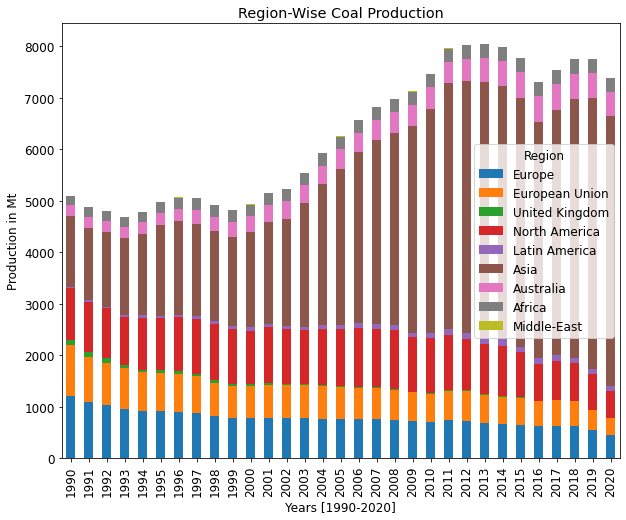

In [38]:
plt.rcParams.update({'font.size': 12})
df_large_regions2_T.plot(kind="bar",stacked=True,figsize=(10,8))
plt.title("Region-Wise Coal Production")
plt.xlabel("Years [1990-2020]")
plt.ylabel("Production in Mt")

In [39]:
df_large_regions2_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1990 to 2020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Europe          31 non-null     float64
 1   European Union  31 non-null     float64
 2   United Kingdom  31 non-null     float64
 3   North America   31 non-null     float64
 4   Latin America   31 non-null     float64
 5   Asia            31 non-null     float64
 6   Australia       31 non-null     float64
 7   Africa          31 non-null     float64
 8   Middle-East     31 non-null     float64
dtypes: float64(9)
memory usage: 2.4+ KB


In [40]:
df_large_regions2_T.describe()

Region       Europe  European Union  United Kingdom  North America  \
count     31.000000       31.000000       31.000000      31.000000   
mean     780.937488      623.658910       30.944076     983.074345   
std      154.237938      139.190278       26.049400     146.275803   
min      454.442307      326.757077        1.570234     533.710631   
25%      697.800000      545.980000       14.867500     972.196500   
50%      760.671000      618.600000       20.498000    1034.432000   
75%      849.518000      683.416000       44.836000    1071.004500   
max     1209.388000      994.573000       94.922000    1143.631000   

Region  Latin America         Asia   Australia      Africa  Middle-East  
count       31.000000    31.000000   31.000000   31.000000    31.000000  
mean        79.371440  3177.615992  362.784316  240.273357     1.642704  
std         27.916743  1455.125265  100.683778   28.805288     0.293248  
min         36.274000  1375.827918  204.562000  182.466919     1.032000  
25%         55.800000  1770.849476  275.904500  226.128199     1.491500  
50%         79.761000  3036.083279  370.590000  249.923740     1.554000  
75%        103.067186  4769.367494  447.153000  264.064534     1.864187  
max        117.534000  5251.165430  512.431000  276.120487     2.169336

In [41]:
corr_matrix_large_regions = df_large_regions2_T.corr()
corr_matrix_large_regions

Region            Europe  European Union  United Kingdom  North America  \
Region                                                                    
Europe          1.000000        0.996148        0.958398       0.480243   
European Union  0.996148        1.000000        0.948888       0.502731   
United Kingdom  0.958398        0.948888        1.000000       0.312114   
North America   0.480243        0.502731        0.312114       1.000000   
Latin America  -0.788371       -0.798433       -0.879720      -0.212037   
Asia           -0.828504       -0.849352       -0.838022      -0.505334   
Australia      -0.893406       -0.905615       -0.908022      -0.485795   
Africa         -0.909597       -0.909520       -0.962787      -0.303881   
Middle-East    -0.729898       -0.729638       -0.745936      -0.320564   

Region          Latin America      Asia  Australia    Africa  Middle-East  
Region                                                                     
Europe              -0.788371 -0.828504  -0.893406 -0.909597    -0.729898  
European Union      -0.798433 -0.849352  -0.905615 -0.909520    -0.729638  
United Kingdom      -0.879720 -0.838022  -0.908022 -0.962787    -0.745936  
North America       -0.212037 -0.505334  -0.485795 -0.303881    -0.320564  
Latin America        1.000000  0.921996   0.938152  0.950759     0.548271  
Asia                 0.921996  1.000000   0.959363  0.906211     0.564603  
Australia            0.938152  0.959363   1.000000  0.952154     0.607505  
Africa               0.950759  0.906211   0.952154  1.000000     0.667395  
Middle-East          0.548271  0.564603   0.607505  0.667395     1.000000

<AxesSubplot:xlabel='Region', ylabel='Region'>

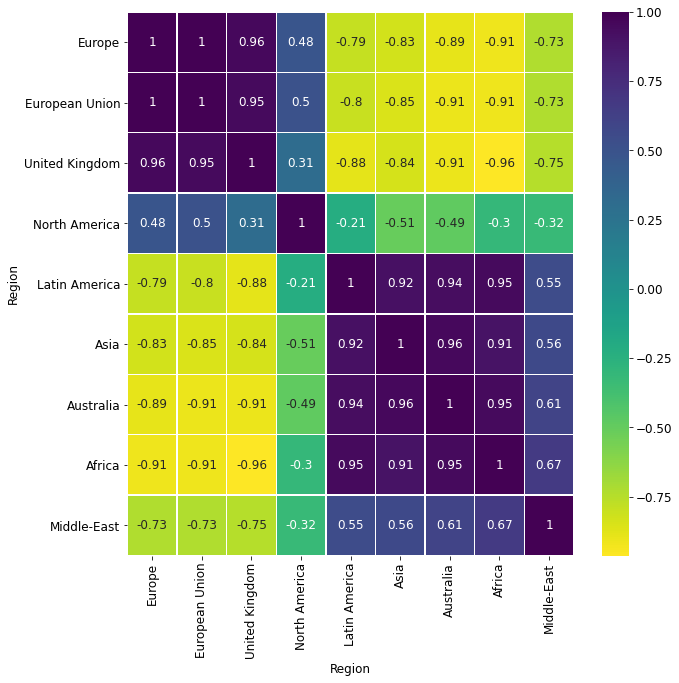

In [42]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_large_regions, cmap='viridis_r', linewidths=0.4, annot=True)

In [43]:
df_large_regions2_per = df_large_regions2.copy()
df_large_regions2_per

1                      1990         1991         1992         1993  \
Region                                                               
Europe          1209.388000  1088.551000  1026.659000   962.868000   
European Union   994.573000   882.171000   829.617000   788.849000   
United Kingdom    92.762000    94.922000    84.493000    68.199000   
North America   1001.893000   974.676000   970.583000   926.701000   
Latin America     37.646000    36.274000    37.016000    37.768000   
Asia            1375.827918  1398.712914  1440.635909  1488.375855   
Australia        204.562000   219.607000   228.339000   226.065000   
Africa           182.466919   186.385542   182.683525   195.771110   
Middle-East        1.138000     1.194000     1.032000     1.533000   

1                      1994         1995         1996         1997  \
Region                                                               
Europe           909.803000   909.800000   900.969000   879.833000   
European Union   763.167000   751.834000   744.704000   715.853000   
United Kingdom    49.785000    53.037000    50.197000    48.495000   
North America   1010.403000  1012.079000  1040.968000  1067.443000   
Latin America     42.498000    45.625000    50.080000    55.077000   
Asia            1586.032891  1751.549591  1817.906309  1790.149361   
Australia        225.402000   241.807000   247.149000   264.458000   
Africa           202.970074   213.074570   212.655428   225.741050   
Middle-East        1.493000     1.554000     1.441000     1.448000   

1                      1998         1999         2000        2001  \
Region                                                              
Europe           819.203000   777.944000   778.299000   788.58700   
European Union   650.979000   626.129000   626.133000   634.41900   
United Kingdom    41.177000    37.077000    31.198000    31.93000   
North America   1088.948000  1068.581000  1040.754000  1091.77200   
Latin America     59.161000    56.523000    64.917000    69.68000   
Asia            1747.444745  1734.622273  1851.270256  1978.47000   
Australia        287.351000   291.002000   306.722000   329.17700   
Africa           229.063413   230.176266   230.611191   229.69041   
Middle-East        1.701000     1.535000     1.538000     1.52900   

1                      2002         2003         2004         2005  \
Region                                                               
Europe           782.284000   781.691000   767.803000   757.905000   
European Union   635.980000   638.621000   630.279000   618.600000   
United Kingdom    29.989000    28.279000    25.096000    20.498000   
North America   1059.225000  1034.432000  1085.126000  1108.619000   
Latin America     64.145000    74.581000    79.761000    86.600000   
Asia            2085.987000  2404.925000  2740.691000  3036.083279   
Australia        339.898000   341.661000   350.304000   370.590000   
Africa           226.515349   244.082037   248.011891   250.281741   
Middle-East        1.490000     1.580000     1.663000     1.985000   

1                      2006         2007         2008         2009  \
Region                                                               
Europe           758.742000   760.671000   749.085000   723.282000   
European Union   611.935000   602.842000   581.097000   556.316000   
United Kingdom    18.517000    17.007000    18.054000    17.874000   
North America   1137.805000  1127.032000  1143.631000  1050.488000   
Latin America     94.369000    98.641000   100.396000    95.577000   
Asia            3329.259966  3576.937261  3733.617704  4018.483545   
Australia        374.653000   391.039000   392.251000   407.898000   
Africa           249.923740   252.498609   256.239524   253.553200   
Middle-East        2.103000     2.094000     2.017000     1.596000   

1                      2010         2011         2012         2013  \
Region                                                               
Europe          

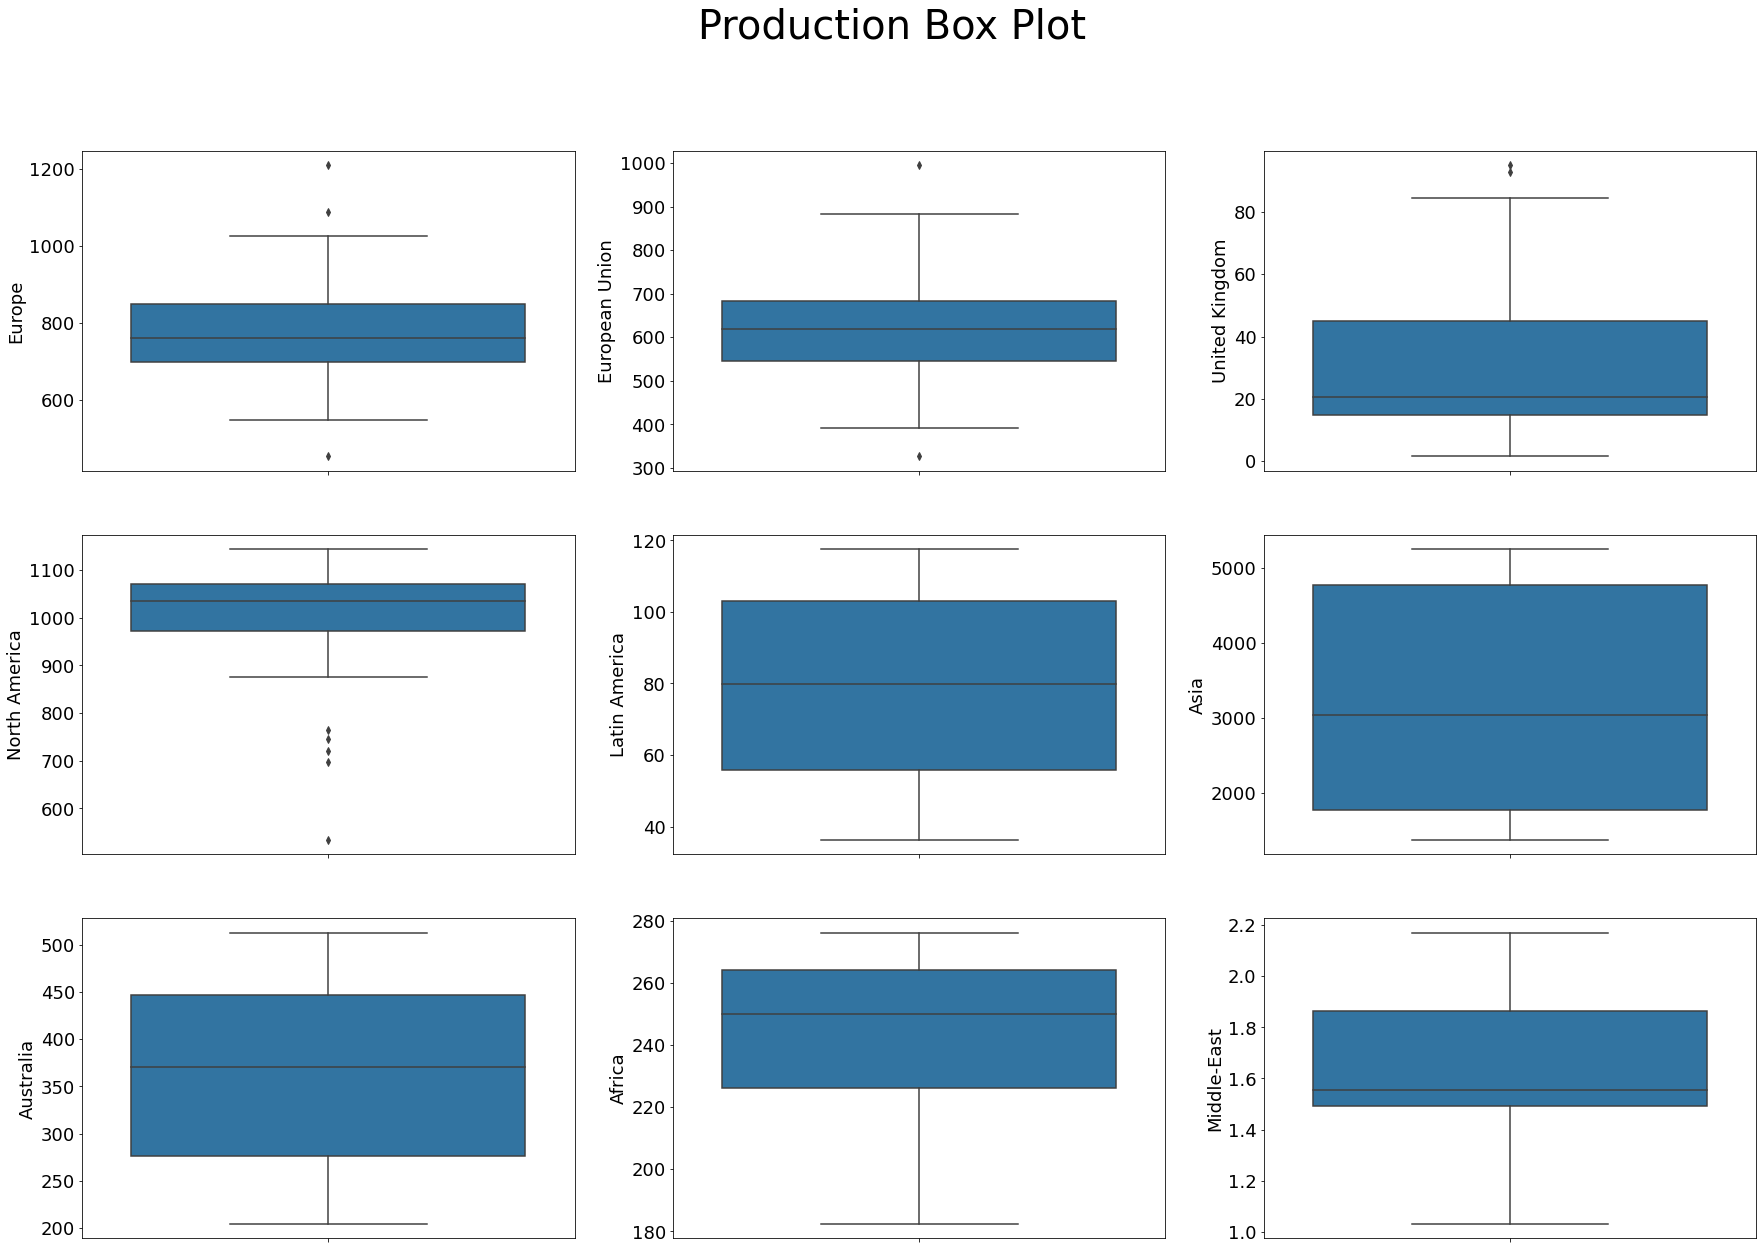

In [44]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3,3, figsize=(30, 20))
sns.boxplot(y=df_large_regions2_T['Europe'], ax=ax[0,0])
sns.boxplot(y=df_large_regions2_T['European Union'], ax=ax[0,1])
sns.boxplot(y=df_large_regions2_T['United Kingdom'], ax=ax[0,2])
sns.boxplot(y=df_large_regions2_T['North America'], ax=ax[1,0])
sns.boxplot(y=df_large_regions2_T['Latin America'], ax=ax[1,1])
sns.boxplot(y=df_large_regions2_T['Asia'], ax=ax[1,2])
sns.boxplot(y=df_large_regions2_T['Australia'], ax=ax[2,0])
sns.boxplot(y=df_large_regions2_T['Africa'], ax=ax[2,1])
sns.boxplot(y=df_large_regions2_T['Middle-East'], ax=ax[2,2])
fig.suptitle("Production Box Plot", fontsize=40)
plt.show()

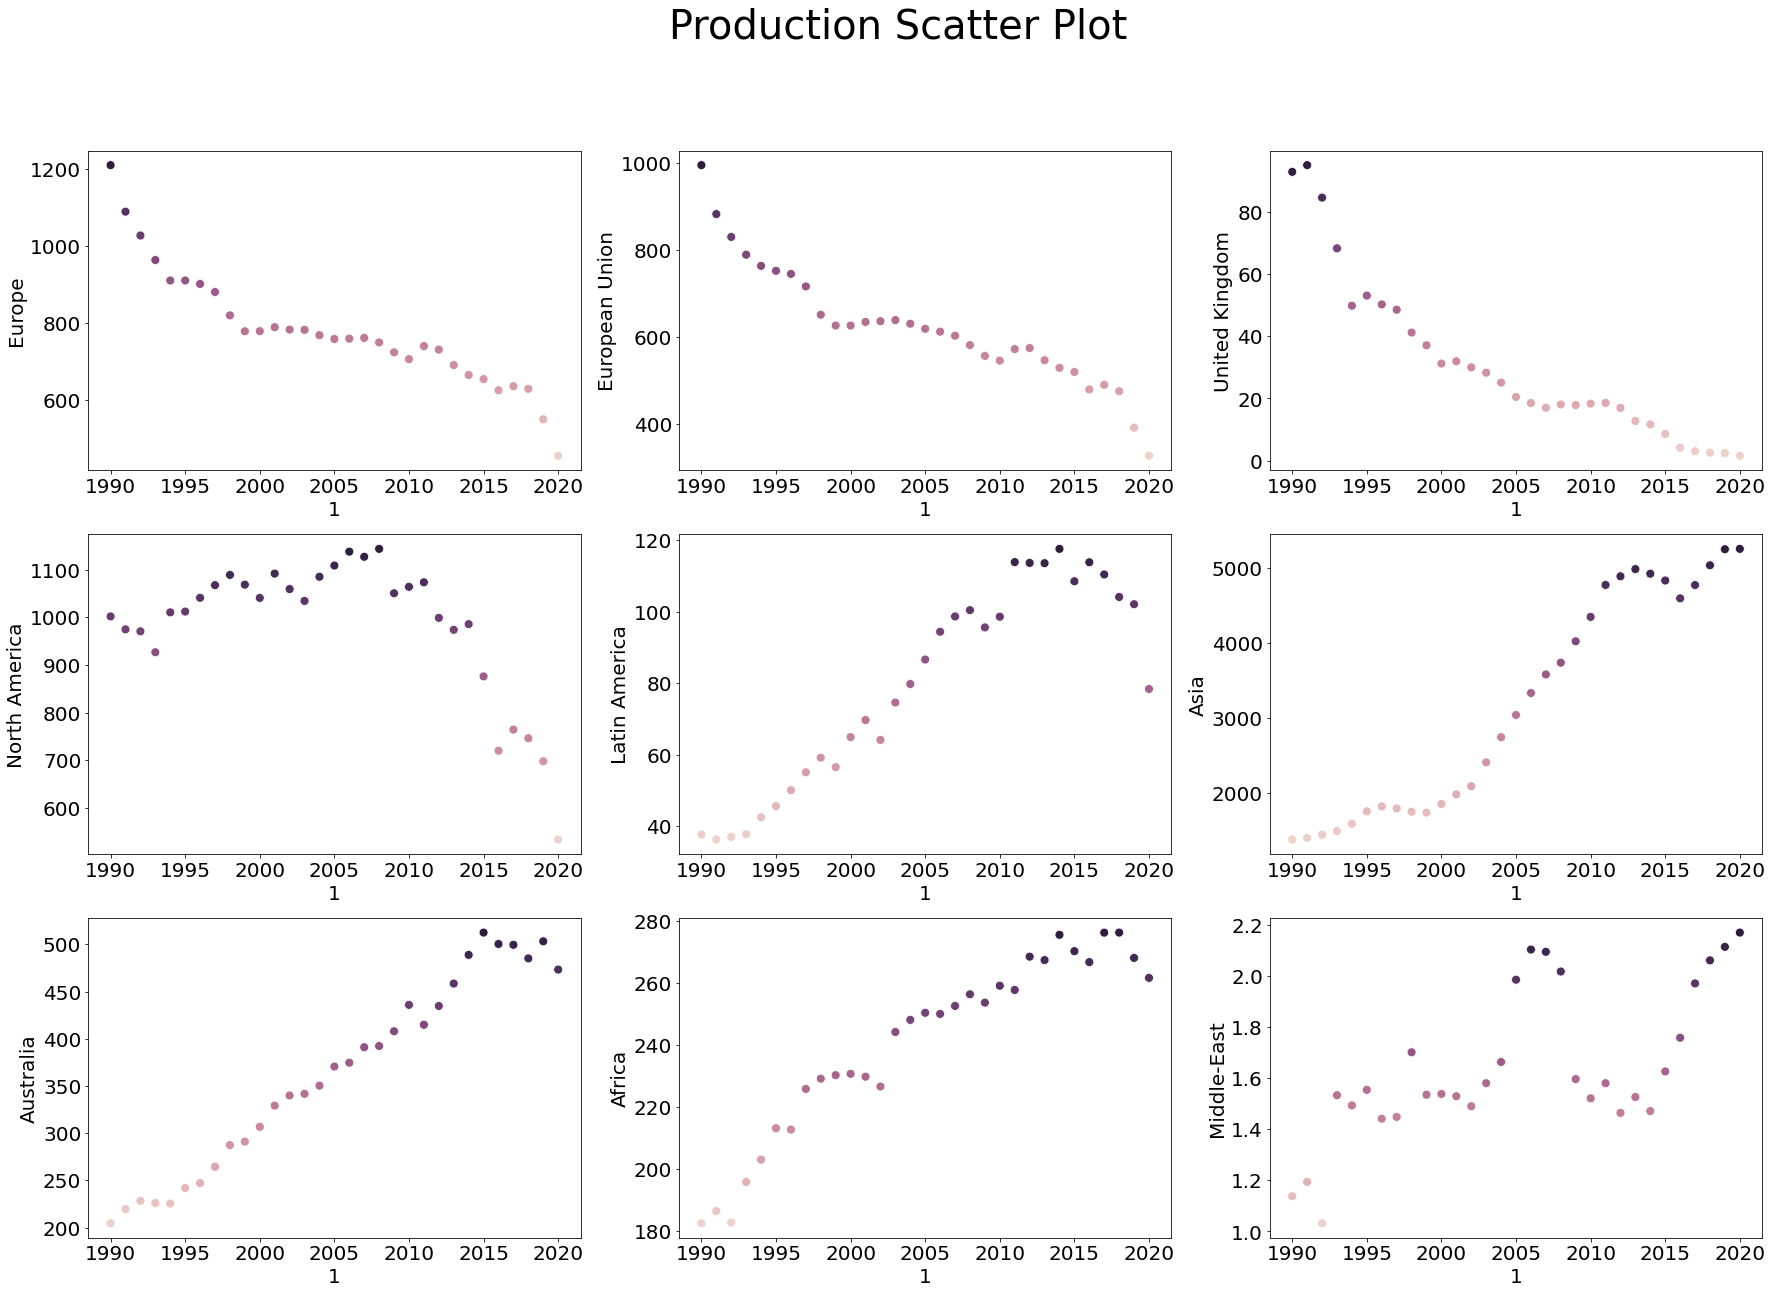

In [45]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(3,3, figsize=(30, 20))
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y="Europe", hue="Europe", s=80, legend=None, ax=ax[0,0])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='European Union',hue="European Union", s=80, legend=None, ax=ax[0,1])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='United Kingdom', hue="United Kingdom", s=80, legend=None,ax=ax[0,2])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='North America', hue="North America", s=80, legend=None,ax=ax[1,0])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Latin America', hue="Latin America", s=80, legend=None,ax=ax[1,1])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Asia', hue="Asia", s=80, legend=None,ax=ax[1,2])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Australia', hue="Australia", s=80, legend=None,ax=ax[2,0])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Africa', hue="Africa", s=80, legend=None,ax=ax[2,1])
sns.scatterplot(data=df_large_regions2_T, x=df_large_regions2_T.index, y='Middle-East', hue="Middle-East", s=80, legend=None,ax=ax[2,2])
fig.suptitle("Production Scatter Plot", fontsize=40)
plt.show()

In [46]:
df_large_regions2_per = df_large_regions2_per.drop(df_large_regions2_per.columns[:-2], axis=1)

In [47]:
df_large_regions2_per

1               2019 - 2020 (%)   2000 - 2020 (%/year) 
Region                                                 
Europe                -17.255683              -2.654335
European Union        -16.541328              -3.199429
United Kingdom        -35.429361             -13.882407
North America         -23.531578              -3.284098
Latin America         -23.223662               0.945089
Asia                    0.098604               5.351153
Australia              -5.946772               2.192207
Africa                 -2.400426               0.630928
Middle-East             2.640829               1.734564

Text(0, 0.5, '% Change')

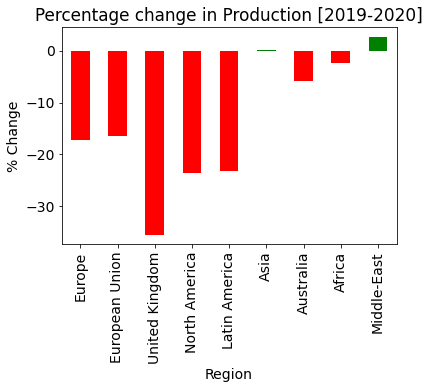

In [48]:
plt.rcParams.update({'font.size':14})
df_large_regions2_per['2019 - 2020 (%) '].plot.bar(color=(df_large_regions2_per['2019 - 2020 (%) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Production [2019-2020]')
plt.ylabel('% Change')

Text(0, 0.5, '% Change')

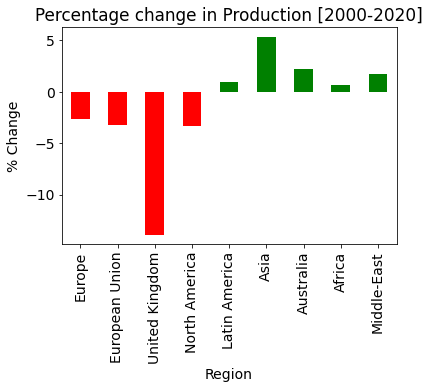

In [49]:
df_large_regions2_per['2000 - 2020 (%/year) '].plot.bar(color=(df_large_regions2_per['2000 - 2020 (%/year) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Production [2000-2020]')
plt.ylabel('% Change')

# <p style="line-height:1.4"><font face='Montserrat'>Univariate Time Series Prediction</font></p>

### <p style="line-height:1.4"><font face='Montserrat'>Based on the individual regions</font></p>

In [50]:
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [408]:
print("Please enter a region: ")
place = input()

Please enter a region: 
Latin America


In [409]:
data = df_large_regions2_T.filter([place], axis=1)
data

Region  Latin America
1                    
1990        37.646000
1991        36.274000
1992        37.016000
1993        37.768000
1994        42.498000
1995        45.625000
1996        50.080000
1997        55.077000
1998        59.161000
1999        56.523000
2000        64.917000
2001        69.680000
2002        64.145000
2003        74.581000
2004        79.761000
2005        86.600000
2006        94.369000
2007        98.641000
2008       100.396000
2009        95.577000
2010        98.565000
2011       113.828000
2012       113.606000
2013       113.527000
2014       117.534000
2015       108.476000
2016       113.783000
2017       110.372039
2018       104.079205
2019       102.055167
2020        78.354220

In [410]:
data2 = data.copy()
data2.index.names = [None]
# data2.index.round(0).astype('int64')
data2.index = pd.to_numeric(data2.index, downcast='integer')
data2.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64')

In [411]:
data2.index.dtype

dtype('int64')

In [412]:
data2.index=pd.to_datetime(data2.index,format='%Y', errors='coerce')
data2

Region      Latin America
1990-01-01      37.646000
1991-01-01      36.274000
1992-01-01      37.016000
1993-01-01      37.768000
1994-01-01      42.498000
1995-01-01      45.625000
1996-01-01      50.080000
1997-01-01      55.077000
1998-01-01      59.161000
1999-01-01      56.523000
2000-01-01      64.917000
2001-01-01      69.680000
2002-01-01      64.145000
2003-01-01      74.581000
2004-01-01      79.761000
2005-01-01      86.600000
2006-01-01      94.369000
2007-01-01      98.641000
2008-01-01     100.396000
2009-01-01      95.577000
2010-01-01      98.565000
2011-01-01     113.828000
2012-01-01     113.606000
2013-01-01     113.527000
2014-01-01     117.534000
2015-01-01     108.476000
2016-01-01     113.783000
2017-01-01     110.372039
2018-01-01     104.079205
2019-01-01     102.055167
2020-01-01      78.354220

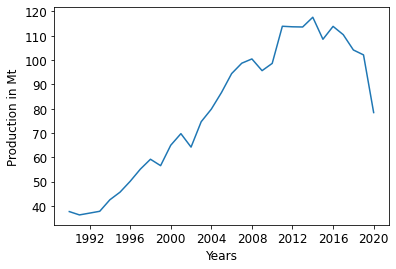

In [413]:
plt.rcParams.update({'font.size': 12})
plt.xlabel('Years')
plt.ylabel('Production in Mt')
plt.plot(data2[place])

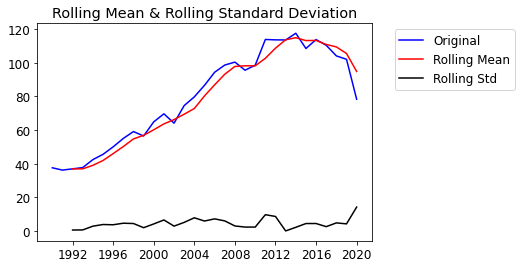

In [414]:
rolling_mean = data2.rolling(window = 3).mean()
rolling_std = data2.rolling(window = 3).std()
plt.plot(data2, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### <p style="line-height:1.4"><font face='Montserrat'>Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).</font></p>
#### <p style="line-height:1.4"><font face='Montserrat'>Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics</font></p>

### <p style="line-height:1.4"><font face='Montserrat'>ADF Statistic</font></p>
##### <p style="line-height:1.4"><font face='Montserrat'>This statistic helps us check if the ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.</font></p>

In [415]:
result = adfuller(data2[place])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.85288228195951
p-value: 0.3545407838437944
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


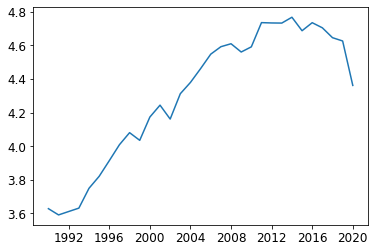

In [416]:
df_log = np.log(data2)
plt.plot(df_log)

In [191]:
def get_stationarity(timeseries, place):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries[place])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

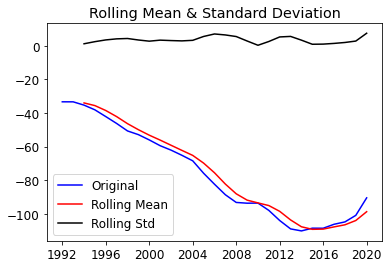

ADF Statistic: -1.990645562369385
p-value: 0.290689696483965
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [417]:
rolling_mean = data2.rolling(window=3).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean, place)

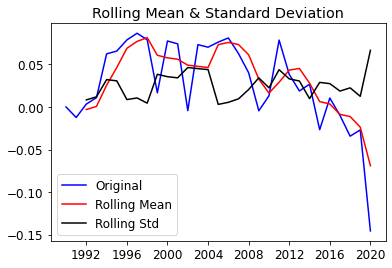

ADF Statistic: 1.7168638264812957
p-value: 0.9981690551273885
Critical Values:
	1%: -3.7377092158564813
	5%: -2.9922162731481485
	10%: -2.635746736111111


In [418]:
rolling_mean_exp_decay = df_log.ewm(halflife=1, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay, place)

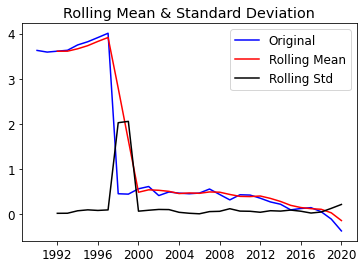

ADF Statistic: -1.978463856720102
p-value: 0.2960950389603201
Critical Values:
	1%: -3.7112123008648155
	5%: -2.981246804733728
	10%: -2.6300945562130176


In [419]:
df_log_shift = df_log - df_log.shift(periods=8, fill_value=0)
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift, place)

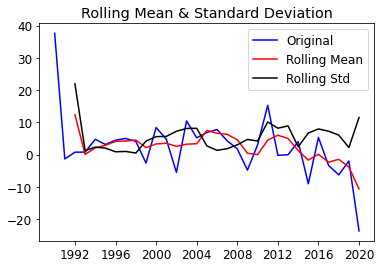

ADF Statistic: 1.4757465189950634
p-value: 0.9974324880277465
Critical Values:
	1%: -3.7377092158564813
	5%: -2.9922162731481485
	10%: -2.635746736111111


In [420]:
df_new1 = data2 - data2.shift(1, fill_value=0)
# df_new2 = data-data.shift(12, fill_value=0)
get_stationarity(df_new1, place)

In [421]:
# rolling_mean_exp_decay = df_log.ewm(halflife=1, min_periods=0, adjust=True).mean()
# data2['First Difference'] = df_log - rolling_mean_exp_decay

data2['First Difference'] = df_log - df_log.shift(periods=8, fill_value=0)

# data2['First Difference'] = data2.rolling(window = 3).mean()

# data2['First Difference'] = data2[place] - data2[place].shift(1, fill_value=0)

In [422]:
# data2['First Difference'] = data2['First Difference'].fillna(0)
data2['First Difference']

1990-01-01    3.628227
1991-01-01    3.591101
1992-01-01    3.611350
1993-01-01    3.631462
1994-01-01    3.749457
1995-01-01    3.820456
1996-01-01    3.913622
1997-01-01    4.008732
1998-01-01    0.452036
1999-01-01    0.443546
2000-01-01    0.561759
2001-01-01    0.612451
2002-01-01    0.411689
2003-01-01    0.491430
2004-01-01    0.465413
2005-01-01    0.452568
2006-01-01    0.466950
2007-01-01    0.556839
2008-01-01    0.436013
2009-01-01    0.316019
2010-01-01    0.429570
2011-01-01    0.422803
2012-01-01    0.353702
2013-01-01    0.270741
2014-01-01    0.219515
2015-01-01    0.095042
2016-01-01    0.125171
2017-01-01    0.143925
2018-01-01    0.054436
2019-01-01   -0.109175
2020-01-01   -0.371496
Name: First Difference, dtype: float64

In [423]:
adfuller(data2['First Difference'].dropna())

(-1.978463856720102,
 0.2960950389603201,
 4,
 26,
 {'1%': -3.7112123008648155,
  '5%': -2.981246804733728,
  '10%': -2.6300945562130176},
 -36.58602204762862)

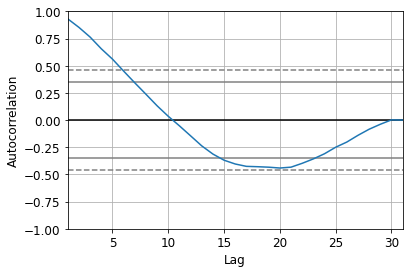

In [424]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data2[place])
plt.show()

<AxesSubplot:>

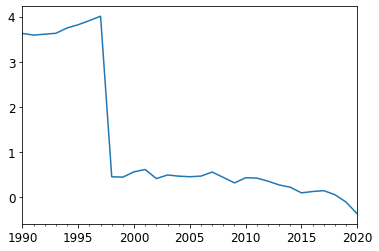

In [425]:
data2['First Difference'].plot()

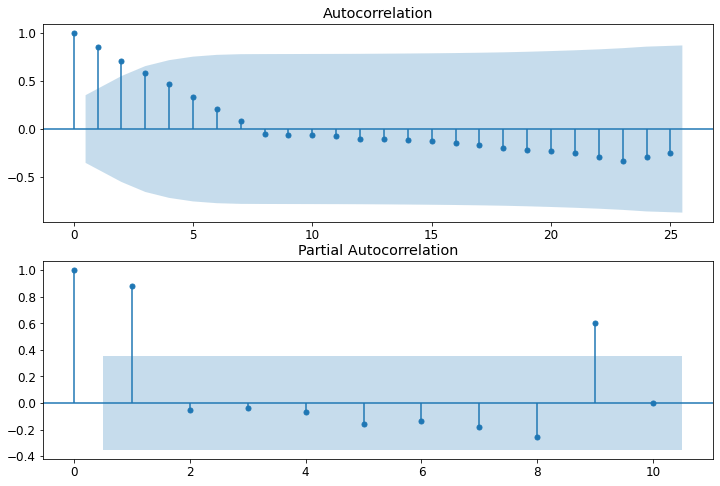

In [426]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['First Difference'].dropna(),lags=25,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['First Difference'].dropna(),lags=10,ax=ax2)

In [427]:
data2.index.dtype

dtype('<M8[ns]')

In [428]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data2[place],order=(3,1,3))
model_fit=model.fit()
model_fit.summary()

F:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Latin America   No. Observations:                   30
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -95.174
Method:                       css-mle   S.D. of innovations              5.377
Date:                Wed, 10 Nov 2021   AIC                            206.349
Time:                        14:33:28   BIC                            217.558
Sample:                    01-01-1991   HQIC                           209.935
                         - 01-01-2020                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5875      3.734     -0.157      0.875      -7.906       6.731
ar.L1.D.Latin America    -0.4182      0.305     -1.371      0.170      -1.016       0.179
ar.L2.D.Latin America     0.4140      0.301      1.374      0.170      -0.177       1.005
ar.L3.D.Latin America     0.5974      0.195      3.057      0.002       0.214       0.981
ma.L1.D.Latin America     0.8691      0.350      2.480      0.013       0.182       1.556
ma.L2.D.Latin America    -0.2385      0.532     -0.448      0.654      -1.281       0.804
ma.L3.D.Latin America    -0.1076      0.301     -0.357      0.721      -0.698       0.483
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1585           -0.0000j            1.1585           -0.0000
AR.2           -0.9257           -0.7668j            1.2020           -0.3899
AR.3           -0.9257           +0.7668j            1.2020            0.3899
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            2.5005           +0.0000j            2.5005            0.0000
MA.3           -3.7176           +0.0000j            3.7176            0.5000
-----------------------------------------------------------------------------
"""

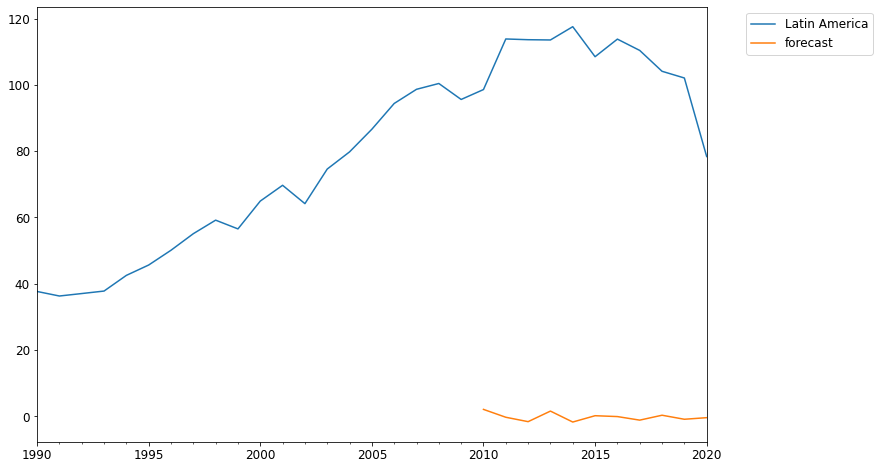

In [429]:
data2['forecast']=model_fit.predict(start=20, end=30, dynamic=True)
data2[[place,'forecast']].plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [430]:
data2

Region      Latin America  First Difference  forecast
1990-01-01      37.646000          3.628227       NaN
1991-01-01      36.274000          3.591101       NaN
1992-01-01      37.016000          3.611350       NaN
1993-01-01      37.768000          3.631462       NaN
1994-01-01      42.498000          3.749457       NaN
1995-01-01      45.625000          3.820456       NaN
1996-01-01      50.080000          3.913622       NaN
1997-01-01      55.077000          4.008732       NaN
1998-01-01      59.161000          0.452036       NaN
1999-01-01      56.523000          0.443546       NaN
2000-01-01      64.917000          0.561759       NaN
2001-01-01      69.680000          0.612451       NaN
2002-01-01      64.145000          0.411689       NaN
2003-01-01      74.581000          0.491430       NaN
2004-01-01      79.761000          0.465413       NaN
2005-01-01      86.600000          0.452568       NaN
2006-01-01      94.369000          0.466950       NaN
2007-01-01      98.641000          0.556839       NaN
2008-01-01     100.396000          0.436013       NaN
2009-01-01      95.577000          0.316019       NaN
2010-01-01      98.565000          0.429570  2.065225
2011-01-01     113.828000          0.422803 -0.307846
2012-01-01     113.606000          0.353702 -1.636972
2013-01-01     113.527000          0.270741  1.551943
2014-01-01     117.534000          0.219515 -1.749508
2015-01-01     108.476000          0.095042  0.157052
2016-01-01     113.783000          0.125171 -0.101700
2017-01-01     110.372039          0.143925 -1.176665
2018-01-01     104.079205          0.054436  0.304778
2019-01-01     102.055167         -0.109175 -0.914288
2020-01-01      78.354220         -0.371496 -0.433483

## <p style="line-height:1.4"><font face='Montserrat'>Remember to make changes to "order" based on autocorrelation and partial autocorrelation</font></p>

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimat

<AxesSubplot:>

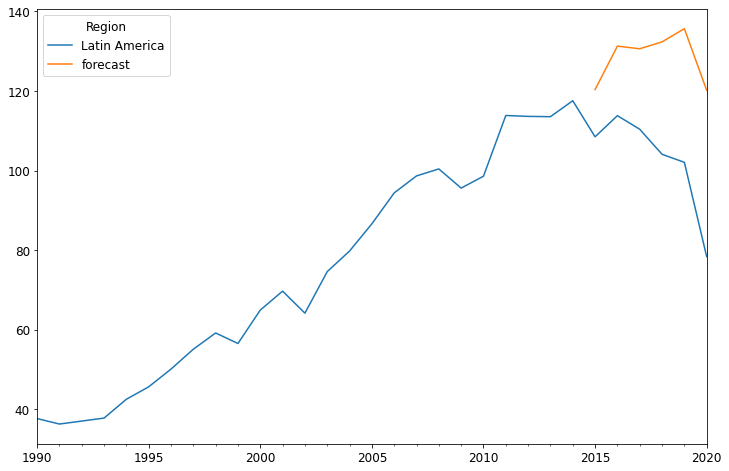

In [432]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data2[place],order=(3, 1, 3), seasonal_order=(3,1,3,12))
results=model.fit()
data2['forecast']=results.predict(start=25,end=30,dynamic=True)
data2[[place,'forecast']].plot(figsize=(12,8))

In [433]:
data2

Region      Latin America  First Difference    forecast
1990-01-01      37.646000          3.628227         NaN
1991-01-01      36.274000          3.591101         NaN
1992-01-01      37.016000          3.611350         NaN
1993-01-01      37.768000          3.631462         NaN
1994-01-01      42.498000          3.749457         NaN
1995-01-01      45.625000          3.820456         NaN
1996-01-01      50.080000          3.913622         NaN
1997-01-01      55.077000          4.008732         NaN
1998-01-01      59.161000          0.452036         NaN
1999-01-01      56.523000          0.443546         NaN
2000-01-01      64.917000          0.561759         NaN
2001-01-01      69.680000          0.612451         NaN
2002-01-01      64.145000          0.411689         NaN
2003-01-01      74.581000          0.491430         NaN
2004-01-01      79.761000          0.465413         NaN
2005-01-01      86.600000          0.452568         NaN
2006-01-01      94.369000          0.466950         NaN
2007-01-01      98.641000          0.556839         NaN
2008-01-01     100.396000          0.436013         NaN
2009-01-01      95.577000          0.316019         NaN
2010-01-01      98.565000          0.429570         NaN
2011-01-01     113.828000          0.422803         NaN
2012-01-01     113.606000          0.353702         NaN
2013-01-01     113.527000          0.270741         NaN
2014-01-01     117.534000          0.219515         NaN
2015-01-01     108.476000          0.095042  120.343002
2016-01-01     113.783000          0.125171  131.269460
2017-01-01     110.372039          0.143925  130.598719
2018-01-01     104.079205          0.054436  132.329523
2019-01-01     102.055167         -0.109175  135.646522
2020-01-01      78.354220         -0.371496  120.164104

In [434]:
future = np.arange(data.index[-1]+1, 2046,1)
print(future)
future = pd.to_numeric(future, downcast='integer')
print(future)
future_dates=pd.to_datetime(future,format='%Y', errors='coerce')
print(future_dates)

[2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034
 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045]
[2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034
 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045]
DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01',
               '2025-01-01', '2026-01-01', '2027-01-01', '2028-01-01',
               '2029-01-01', '2030-01-01', '2031-01-01', '2032-01-01',
               '2033-01-01', '2034-01-01', '2035-01-01', '2036-01-01',
               '2037-01-01', '2038-01-01', '2039-01-01', '2040-01-01',
               '2041-01-01', '2042-01-01', '2043-01-01', '2044-01-01',
               '2045-01-01'],
              dtype='datetime64[ns]', freq=None)


<AxesSubplot:>

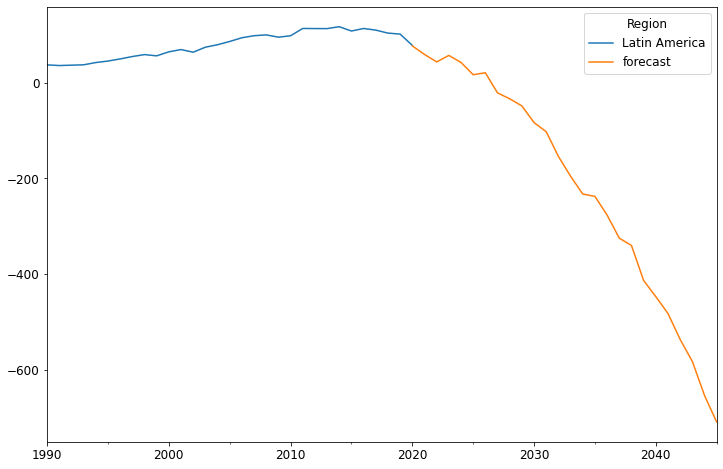

In [435]:
from pandas.tseries.offsets import DateOffset

future_datest_df=pd.DataFrame(index=future_dates[0:],columns=data2.columns)
future_datest_df.tail()
future_df=pd.concat([data2,future_datest_df])

future_df['forecast'] = results.predict(start = 30, end = 60, dynamic= True)
future_df[[place, 'forecast']].plot(figsize=(12, 8))

In [436]:
future_datest_df.tail()

Region     Latin America First Difference forecast
2041-01-01           NaN              NaN      NaN
2042-01-01           NaN              NaN      NaN
2043-01-01           NaN              NaN      NaN
2044-01-01           NaN              NaN      NaN
2045-01-01           NaN              NaN      NaN

In [437]:
future_df

Region      Latin America  First Difference    forecast
1990-01-01      37.646000          3.628227         NaN
1991-01-01      36.274000          3.591101         NaN
1992-01-01      37.016000          3.611350         NaN
1993-01-01      37.768000          3.631462         NaN
1994-01-01      42.498000          3.749457         NaN
1995-01-01      45.625000          3.820456         NaN
1996-01-01      50.080000          3.913622         NaN
1997-01-01      55.077000          4.008732         NaN
1998-01-01      59.161000          0.452036         NaN
1999-01-01      56.523000          0.443546         NaN
2000-01-01      64.917000          0.561759         NaN
2001-01-01      69.680000          0.612451         NaN
2002-01-01      64.145000          0.411689         NaN
2003-01-01      74.581000          0.491430         NaN
2004-01-01      79.761000          0.465413         NaN
2005-01-01      86.600000          0.452568         NaN
2006-01-01      94.369000          0.466950         NaN
2007-01-01      98.641000          0.556839         NaN
2008-01-01     100.396000          0.436013         NaN
2009-01-01      95.577000          0.316019         NaN
2010-01-01      98.565000          0.429570         NaN
2011-01-01     113.828000          0.422803         NaN
2012-01-01     113.606000          0.353702         NaN
2013-01-01     113.527000          0.270741         NaN
2014-01-01     117.534000          0.219515         NaN
2015-01-01     108.476000          0.095042         NaN
2016-01-01     113.783000          0.125171         NaN
2017-01-01     110.372039          0.143925         NaN
2018-01-01     104.079205          0.054436         NaN
2019-01-01     102.055167         -0.109175         NaN
2020-01-01      78.354220         -0.371496   77.368986
2021-01-01            NaN               NaN   59.563698
2022-01-01            NaN               NaN   43.853222
2023-01-01            NaN               NaN   57.424560
2024-01-01            NaN               NaN   42.742977
2025-01-01            NaN               NaN   17.086296
2026-01-01            NaN               NaN   21.157648
2027-01-01            NaN               NaN  -20.966884
2028-01-01            NaN               NaN  -33.303776
2029-01-01            NaN               NaN  -48.230790
2030-01-01            NaN               NaN  -83.093237
2031-01-01            NaN               NaN -102.192284
2032-01-01            NaN               NaN -153.877206
2033-01-01            NaN               NaN -195.298332
2034-01-01            NaN               NaN -232.559093
2035-01-01            NaN               NaN -237.474297
2036-01-01            NaN               NaN -276.534983
2037-01-01            NaN               NaN -324.851245
2038-01-01            NaN               NaN -340.179633
2039-01-01            NaN               NaN -413.348379
2040-01-01            NaN               NaN -447.143717
2041-01-01            NaN               NaN -482.433273
2042-01-01            NaN               NaN -536.701735
2043-01-01            NaN               NaN -582.653608
2044-01-01            NaN               NaN -653.770795
2045-01-01            NaN               NaN -709.495097

In [406]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [438]:
true = data2[place].loc[(data2.index > '2014-01-01') & (data2.index <= '2021-01-01')]
pred = data2['forecast'].loc[(data2.index > '2014-01-01') & (data2.index <= '2021-01-01')]
print("\n\nPredictions are off by: {}%".format(mean_absolute_percentage_error(true, pred)))
print("\n\n",true,"\n\n",pred)



Predictions are off by: 26.34199986922548%


 2015-01-01    108.476000
2016-01-01    113.783000
2017-01-01    110.372039
2018-01-01    104.079205
2019-01-01    102.055167
2020-01-01     78.354220
Name: Latin America, dtype: float64 

 2015-01-01    120.343002
2016-01-01    131.269460
2017-01-01    130.598719
2018-01-01    132.329523
2019-01-01    135.646522
2020-01-01    120.164104
Name: forecast, dtype: float64


# For Associations

In [439]:
df_assoc

1 Region         1990         1991         1992         1993         1994  \
0  World  4698.288837  4526.830456  4478.840434  4361.452965  4441.438965   
1   OECD  2308.374000  2191.172000  2126.165000  2017.686000  2061.141000   
2     G7  1551.632000  1444.011000  1389.490000  1299.959000  1341.687000   
3  BRICS  1821.086000  1806.950000  1830.705000  1856.011000  1932.811000   

1         1995         1996         1997         1998         1999  \
0  4597.941161  4660.912737  4658.417411  4592.788158  4532.045539   
1  2068.137000  2092.363000  2116.492000  2103.476000  2064.346000   
2  1333.285000  1346.579000  1355.965000  1351.647000  1320.428000   
3  2090.351000  2142.278000  2113.249000  2060.135000  2054.953000   

1         2000        2001         2002         2003         2004        2005  \
0  4665.173447  4889.85041  4945.344349  5295.846037  5691.124891  6055.83602   
1  2039.693000  2117.86900  2085.507000  2056.876000  2105.148000  2146.02500   
2  1284.242000  1335.51200  1303.862000  1274.541000  1323.674000  1337.13200   
3  2163.880000  2279.93100  2367.807000  2706.886000  3008.319000  3290.35900   

1         2006        2007         2008         2009         2010  \
0  6405.335706  6672.87487  6870.319228  7000.055745  7389.548835   
1  2174.899000  2178.76900  2177.314000  2075.452000  2103.422000   
2  1358.330000  1350.49300  1357.825000  1254.615000  1267.365000   
3  3518.634000  3756.84600  3934.051000  4140.911000  4446.229000   

1         2011         2012         2013        2014        2015        2016  \
0  7867.136458  7965.289493  8015.830309  7970.34255  7743.49178  7326.32305   
1  2111.548000  2054.044000  2026.561000  2053.86900  1935.30600  1744.71300   
2  1282.878000  1214.431000  1179.171000  1185.50800  1070.69200   901.11100   
3  4745.816000  4876.158000  4950.951000  4900.17700  4863.02400  4601.66800   

1         2017         2018         2019         2020  2019 - 2020 (%)   \
0  7584.222847  7843.504293  7937.827732  7581.723200         -4.486171   
1  1791.381471  1759.510803  1649.216882  1379.819919        -16.334841   
2   943.915298   919.197819   828.505792   640.820220        -22.653502   
3  4769.781415  5005.633298  5143.578817  5159.815313          0.315665   

1  2000 - 2020 (%/year)   
0               2.457795  
1              -1.935260  
2              -3.416160  
3               4.440766

In [440]:
df_assoc2 = df_assoc.copy()
df_assoc2

1 Region         1990         1991         1992         1993         1994  \
0  World  4698.288837  4526.830456  4478.840434  4361.452965  4441.438965   
1   OECD  2308.374000  2191.172000  2126.165000  2017.686000  2061.141000   
2     G7  1551.632000  1444.011000  1389.490000  1299.959000  1341.687000   
3  BRICS  1821.086000  1806.950000  1830.705000  1856.011000  1932.811000   

1         1995         1996         1997         1998         1999  \
0  4597.941161  4660.912737  4658.417411  4592.788158  4532.045539   
1  2068.137000  2092.363000  2116.492000  2103.476000  2064.346000   
2  1333.285000  1346.579000  1355.965000  1351.647000  1320.428000   
3  2090.351000  2142.278000  2113.249000  2060.135000  2054.953000   

1         2000        2001         2002         2003         2004        2005  \
0  4665.173447  4889.85041  4945.344349  5295.846037  5691.124891  6055.83602   
1  2039.693000  2117.86900  2085.507000  2056.876000  2105.148000  2146.02500   
2  1284.242000  1335.51200  1303.862000  1274.541000  1323.674000  1337.13200   
3  2163.880000  2279.93100  2367.807000  2706.886000  3008.319000  3290.35900   

1         2006        2007         2008         2009         2010  \
0  6405.335706  6672.87487  6870.319228  7000.055745  7389.548835   
1  2174.899000  2178.76900  2177.314000  2075.452000  2103.422000   
2  1358.330000  1350.49300  1357.825000  1254.615000  1267.365000   
3  3518.634000  3756.84600  3934.051000  4140.911000  4446.229000   

1         2011         2012         2013        2014        2015        2016  \
0  7867.136458  7965.289493  8015.830309  7970.34255  7743.49178  7326.32305   
1  2111.548000  2054.044000  2026.561000  2053.86900  1935.30600  1744.71300   
2  1282.878000  1214.431000  1179.171000  1185.50800  1070.69200   901.11100   
3  4745.816000  4876.158000  4950.951000  4900.17700  4863.02400  4601.66800   

1         2017         2018         2019         2020  2019 - 2020 (%)   \
0  7584.222847  7843.504293  7937.827732  7581.723200         -4.486171   
1  1791.381471  1759.510803  1649.216882  1379.819919        -16.334841   
2   943.915298   919.197819   828.505792   640.820220        -22.653502   
3  4769.781415  5005.633298  5143.578817  5159.815313          0.315665   

1  2000 - 2020 (%/year)   
0               2.457795  
1              -1.935260  
2              -3.416160  
3               4.440766

In [441]:
df_assoc2.set_index('Region', inplace=True)
df_assoc2

1              1990         1991         1992         1993         1994  \
Region                                                                    
World   4698.288837  4526.830456  4478.840434  4361.452965  4441.438965   
OECD    2308.374000  2191.172000  2126.165000  2017.686000  2061.141000   
G7      1551.632000  1444.011000  1389.490000  1299.959000  1341.687000   
BRICS   1821.086000  1806.950000  1830.705000  1856.011000  1932.811000   

1              1995         1996         1997         1998         1999  \
Region                                                                    
World   4597.941161  4660.912737  4658.417411  4592.788158  4532.045539   
OECD    2068.137000  2092.363000  2116.492000  2103.476000  2064.346000   
G7      1333.285000  1346.579000  1355.965000  1351.647000  1320.428000   
BRICS   2090.351000  2142.278000  2113.249000  2060.135000  2054.953000   

1              2000        2001         2002         2003         2004  \
Region                                                                   
World   4665.173447  4889.85041  4945.344349  5295.846037  5691.124891   
OECD    2039.693000  2117.86900  2085.507000  2056.876000  2105.148000   
G7      1284.242000  1335.51200  1303.862000  1274.541000  1323.674000   
BRICS   2163.880000  2279.93100  2367.807000  2706.886000  3008.319000   

1             2005         2006        2007         2008         2009  \
Region                                                                  
World   6055.83602  6405.335706  6672.87487  6870.319228  7000.055745   
OECD    2146.02500  2174.899000  2178.76900  2177.314000  2075.452000   
G7      1337.13200  1358.330000  1350.49300  1357.825000  1254.615000   
BRICS   3290.35900  3518.634000  3756.84600  3934.051000  4140.911000   

1              2010         2011         2012         2013        2014  \
Region                                                                   
World   7389.548835  7867.136458  7965.289493  8015.830309  7970.34255   
OECD    2103.422000  2111.548000  2054.044000  2026.561000  2053.86900   
G7      1267.365000  1282.878000  1214.431000  1179.171000  1185.50800   
BRICS   4446.229000  4745.816000  4876.158000  4950.951000  4900.17700   

1             2015        2016         2017         2018         2019  \
Region                                                                  
World   7743.49178  7326.32305  7584.222847  7843.504293  7937.827732   
OECD    1935.30600  1744.71300  1791.381471  1759.510803  1649.216882   
G7      1070.69200   901.11100   943.915298   919.197819   828.505792   
BRICS   4863.02400  4601.66800  4769.781415  5005.633298  5143.578817   

1              2020  2019 - 2020 (%)   2000 - 2020 (%/year)   
Region                                                        
World   7581.723200         -4.486171               2.457795  
OECD    1379.819919        -16.334841              -1.935260  
G7       640.820220        -22.653502              -3.416160  
BRICS   5159.815313          0.315665               4.440766

In [442]:
plt.rcParams.update({'font.size': 12})

<AxesSubplot:xlabel='1', ylabel='Region'>

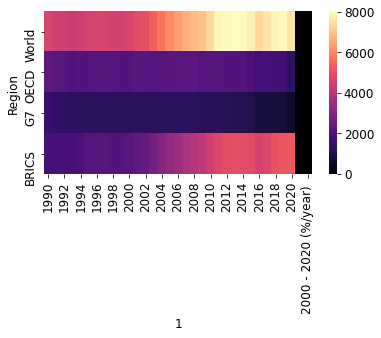

In [443]:
plt.figure(figsize=(6, 3))
sns.heatmap(df_assoc2, cmap="magma")

In [444]:
df_assoc2_T = df_assoc2.T
df_assoc2_T

Region                       World         OECD           G7        BRICS
1                                                                        
1990                   4698.288837  2308.374000  1551.632000  1821.086000
1991                   4526.830456  2191.172000  1444.011000  1806.950000
1992                   4478.840434  2126.165000  1389.490000  1830.705000
1993                   4361.452965  2017.686000  1299.959000  1856.011000
1994                   4441.438965  2061.141000  1341.687000  1932.811000
1995                   4597.941161  2068.137000  1333.285000  2090.351000
1996                   4660.912737  2092.363000  1346.579000  2142.278000
1997                   4658.417411  2116.492000  1355.965000  2113.249000
1998                   4592.788158  2103.476000  1351.647000  2060.135000
1999                   4532.045539  2064.346000  1320.428000  2054.953000
2000                   4665.173447  2039.693000  1284.242000  2163.880000
2001                   4889.850410  2117.869000  1335.512000  2279.931000
2002                   4945.344349  2085.507000  1303.862000  2367.807000
2003                   5295.846037  2056.876000  1274.541000  2706.886000
2004                   5691.124891  2105.148000  1323.674000  3008.319000
2005                   6055.836020  2146.025000  1337.132000  3290.359000
2006                   6405.335706  2174.899000  1358.330000  3518.634000
2007                   6672.874870  2178.769000  1350.493000  3756.846000
2008                   6870.319228  2177.314000  1357.825000  3934.051000
2009                   7000.055745  2075.452000  1254.615000  4140.911000
2010                   7389.548835  2103.422000  1267.365000  4446.229000
2011                   7867.136458  2111.548000  1282.878000  4745.816000
2012                   7965.289493  2054.044000  1214.431000  4876.158000
2013                   8015.830309  2026.561000  1179.171000  4950.951000
2014                   7970.342550  2053.869000  1185.508000  4900.177000
2015                   7743.491780  1935.306000  1070.692000  4863.024000
2016                   7326.323050  1744.713000   901.111000  4601.668000
2017                   7584.222847  1791.381471   943.915298  4769.781415
2018                   7843.504293  1759.510803   919.197819  5005.633298
2019                   7937.827732  1649.216882   828.505792  5143.578817
2020                   7581.723200  1379.819919   640.820220  5159.815313
2019 - 2020 (%)          -4.486171   -16.334841   -22.653502     0.315665
2000 - 2020 (%/year)      2.457795    -1.935260    -3.416160     4.440766

In [445]:
df_assoc2_T.drop(df_assoc2_T.tail(2).index,inplace=True)
df_assoc2_T

Region        World         OECD           G7        BRICS
1                                                         
1990    4698.288837  2308.374000  1551.632000  1821.086000
1991    4526.830456  2191.172000  1444.011000  1806.950000
1992    4478.840434  2126.165000  1389.490000  1830.705000
1993    4361.452965  2017.686000  1299.959000  1856.011000
1994    4441.438965  2061.141000  1341.687000  1932.811000
1995    4597.941161  2068.137000  1333.285000  2090.351000
1996    4660.912737  2092.363000  1346.579000  2142.278000
1997    4658.417411  2116.492000  1355.965000  2113.249000
1998    4592.788158  2103.476000  1351.647000  2060.135000
1999    4532.045539  2064.346000  1320.428000  2054.953000
2000    4665.173447  2039.693000  1284.242000  2163.880000
2001    4889.850410  2117.869000  1335.512000  2279.931000
2002    4945.344349  2085.507000  1303.862000  2367.807000
2003    5295.846037  2056.876000  1274.541000  2706.886000
2004    5691.124891  2105.148000  1323.674000  3008.319000
2005    6055.836020  2146.025000  1337.132000  3290.359000
2006    6405.335706  2174.899000  1358.330000  3518.634000
2007    6672.874870  2178.769000  1350.493000  3756.846000
2008    6870.319228  2177.314000  1357.825000  3934.051000
2009    7000.055745  2075.452000  1254.615000  4140.911000
2010    7389.548835  2103.422000  1267.365000  4446.229000
2011    7867.136458  2111.548000  1282.878000  4745.816000
2012    7965.289493  2054.044000  1214.431000  4876.158000
2013    8015.830309  2026.561000  1179.171000  4950.951000
2014    7970.342550  2053.869000  1185.508000  4900.177000
2015    7743.491780  1935.306000  1070.692000  4863.024000
2016    7326.323050  1744.713000   901.111000  4601.668000
2017    7584.222847  1791.381471   943.915298  4769.781415
2018    7843.504293  1759.510803   919.197819  5005.633298
2019    7937.827732  1649.216882   828.505792  5143.578817
2020    7581.723200  1379.819919   640.820220  5159.815313

Text(0, 0.5, 'Production in Mt')

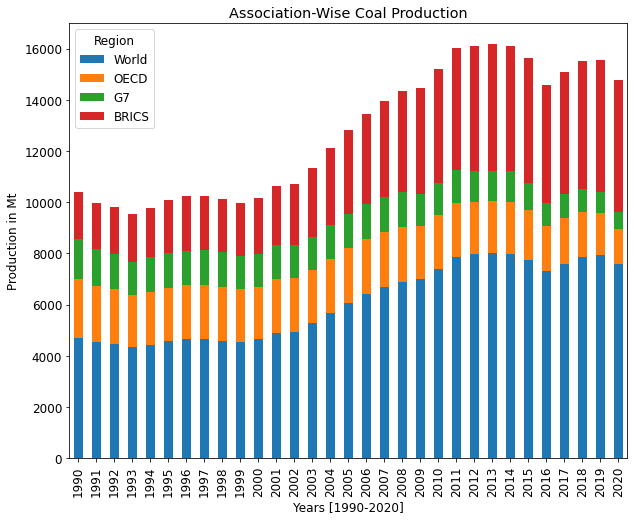

In [446]:
plt.rcParams.update({'font.size': 12})
df_assoc2_T.plot(kind="bar",stacked=True,figsize=(10,8))
plt.title("Association-Wise Coal Production")
plt.xlabel("Years [1990-2020]")
plt.ylabel("Production in Mt")

In [447]:
corr_assoc_regions = df_assoc2_T.corr()
corr_assoc_regions

Region     World      OECD        G7     BRICS
Region                                        
World   1.000000 -0.487392 -0.661270  0.994250
OECD   -0.487392  1.000000  0.972780 -0.571425
G7     -0.661270  0.972780  1.000000 -0.732132
BRICS   0.994250 -0.571425 -0.732132  1.000000

<AxesSubplot:xlabel='Region', ylabel='Region'>

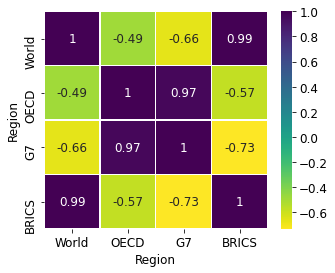

In [448]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5, 4))
sns.heatmap(corr_assoc_regions, cmap='viridis_r', linewidths=0.4, annot=True)

In [449]:
df_assoc2_per = df_assoc2.copy()
df_assoc2_per

1              1990         1991         1992         1993         1994  \
Region                                                                    
World   4698.288837  4526.830456  4478.840434  4361.452965  4441.438965   
OECD    2308.374000  2191.172000  2126.165000  2017.686000  2061.141000   
G7      1551.632000  1444.011000  1389.490000  1299.959000  1341.687000   
BRICS   1821.086000  1806.950000  1830.705000  1856.011000  1932.811000   

1              1995         1996         1997         1998         1999  \
Region                                                                    
World   4597.941161  4660.912737  4658.417411  4592.788158  4532.045539   
OECD    2068.137000  2092.363000  2116.492000  2103.476000  2064.346000   
G7      1333.285000  1346.579000  1355.965000  1351.647000  1320.428000   
BRICS   2090.351000  2142.278000  2113.249000  2060.135000  2054.953000   

1              2000        2001         2002         2003         2004  \
Region                                                                   
World   4665.173447  4889.85041  4945.344349  5295.846037  5691.124891   
OECD    2039.693000  2117.86900  2085.507000  2056.876000  2105.148000   
G7      1284.242000  1335.51200  1303.862000  1274.541000  1323.674000   
BRICS   2163.880000  2279.93100  2367.807000  2706.886000  3008.319000   

1             2005         2006        2007         2008         2009  \
Region                                                                  
World   6055.83602  6405.335706  6672.87487  6870.319228  7000.055745   
OECD    2146.02500  2174.899000  2178.76900  2177.314000  2075.452000   
G7      1337.13200  1358.330000  1350.49300  1357.825000  1254.615000   
BRICS   3290.35900  3518.634000  3756.84600  3934.051000  4140.911000   

1              2010         2011         2012         2013        2014  \
Region                                                                   
World   7389.548835  7867.136458  7965.289493  8015.830309  7970.34255   
OECD    2103.422000  2111.548000  2054.044000  2026.561000  2053.86900   
G7      1267.365000  1282.878000  1214.431000  1179.171000  1185.50800   
BRICS   4446.229000  4745.816000  4876.158000  4950.951000  4900.17700   

1             2015        2016         2017         2018         2019  \
Region                                                                  
World   7743.49178  7326.32305  7584.222847  7843.504293  7937.827732   
OECD    1935.30600  1744.71300  1791.381471  1759.510803  1649.216882   
G7      1070.69200   901.11100   943.915298   919.197819   828.505792   
BRICS   4863.02400  4601.66800  4769.781415  5005.633298  5143.578817   

1              2020  2019 - 2020 (%)   2000 - 2020 (%/year)   
Region                                                        
World   7581.723200         -4.486171               2.457795  
OECD    1379.819919        -16.334841              -1.935260  
G7       640.820220        -22.653502              -3.416160  
BRICS   5159.815313          0.315665               4.440766

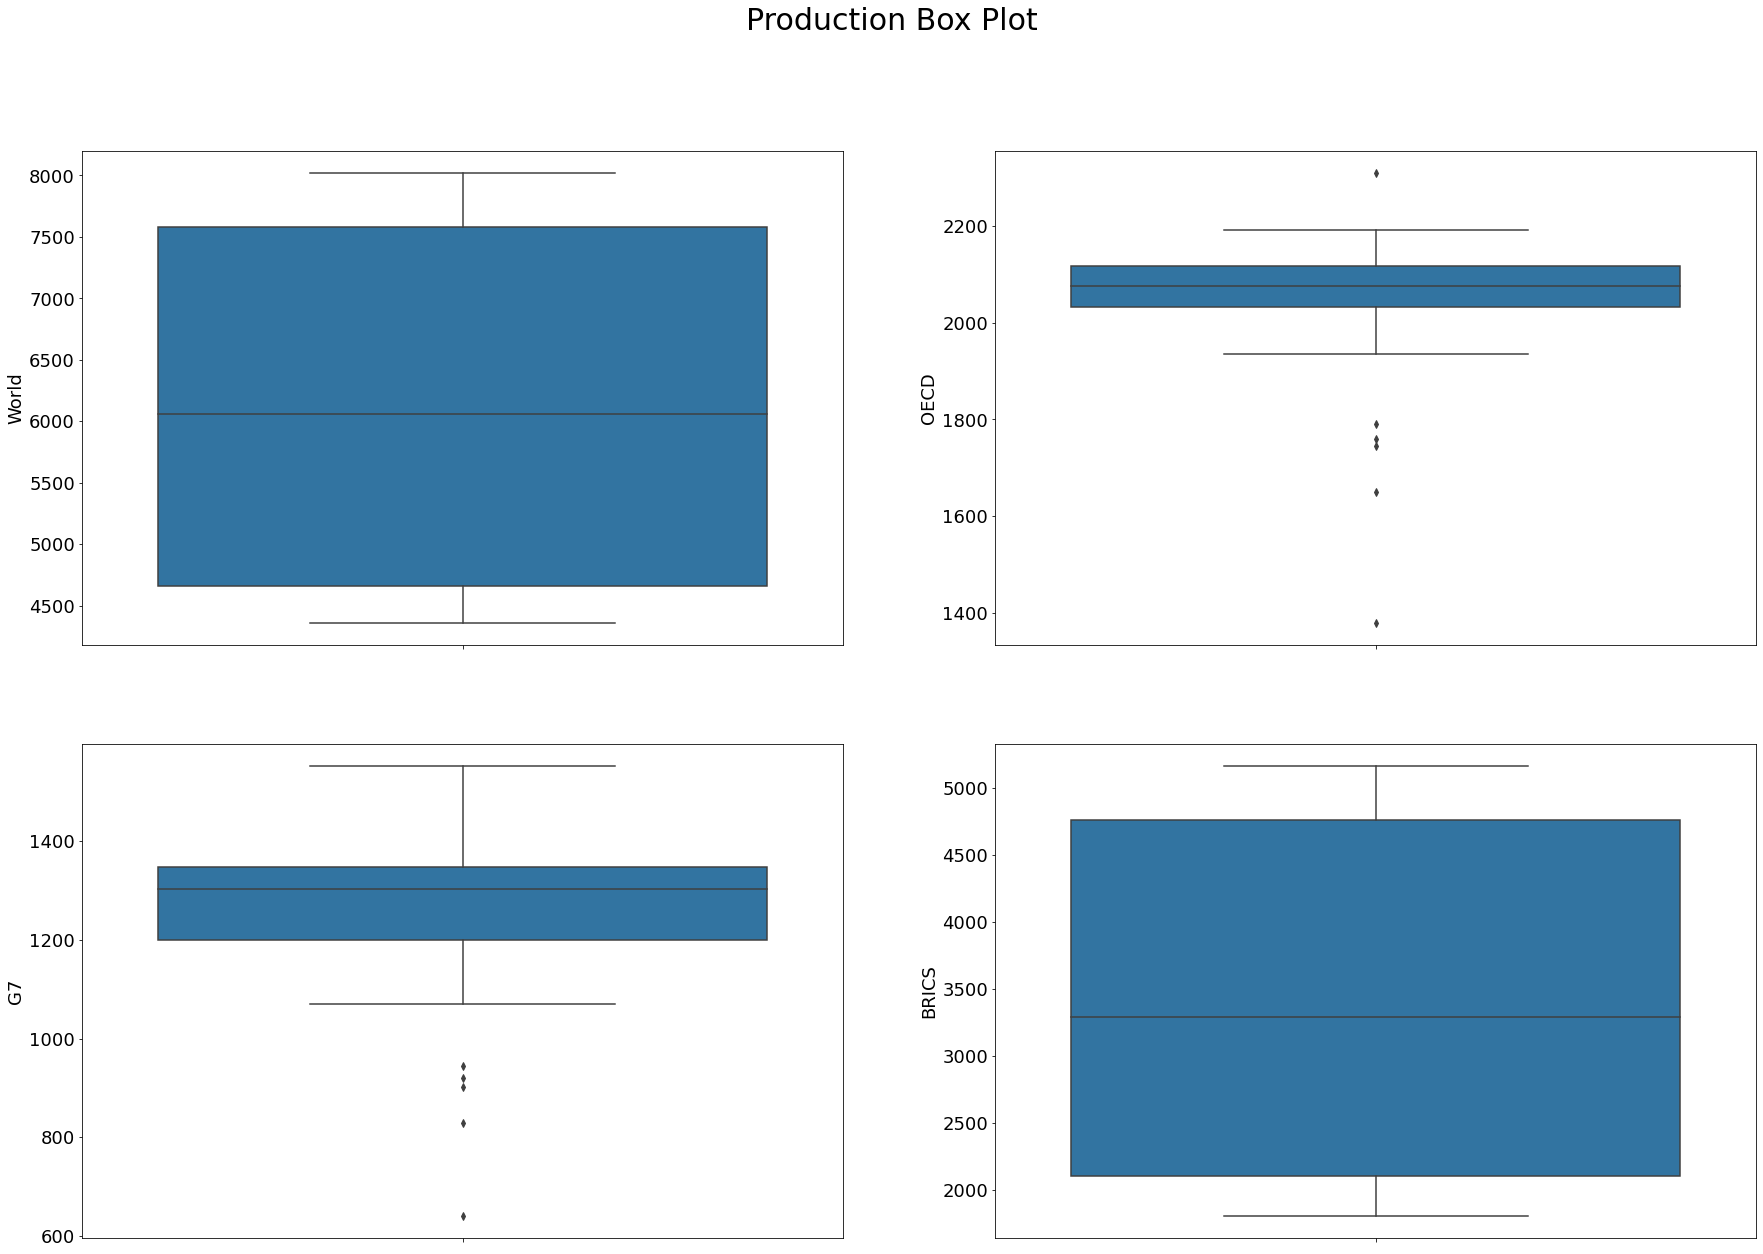

In [450]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(2,2, figsize=(30, 20))
sns.boxplot(y=df_assoc2_T['World'], ax=ax[0,0])
sns.boxplot(y=df_assoc2_T['OECD'], ax=ax[0,1])
sns.boxplot(y=df_assoc2_T['G7'], ax=ax[1,0])
sns.boxplot(y=df_assoc2_T['BRICS'], ax=ax[1,1])
fig.suptitle("Production Box Plot", fontsize=30)
plt.show()

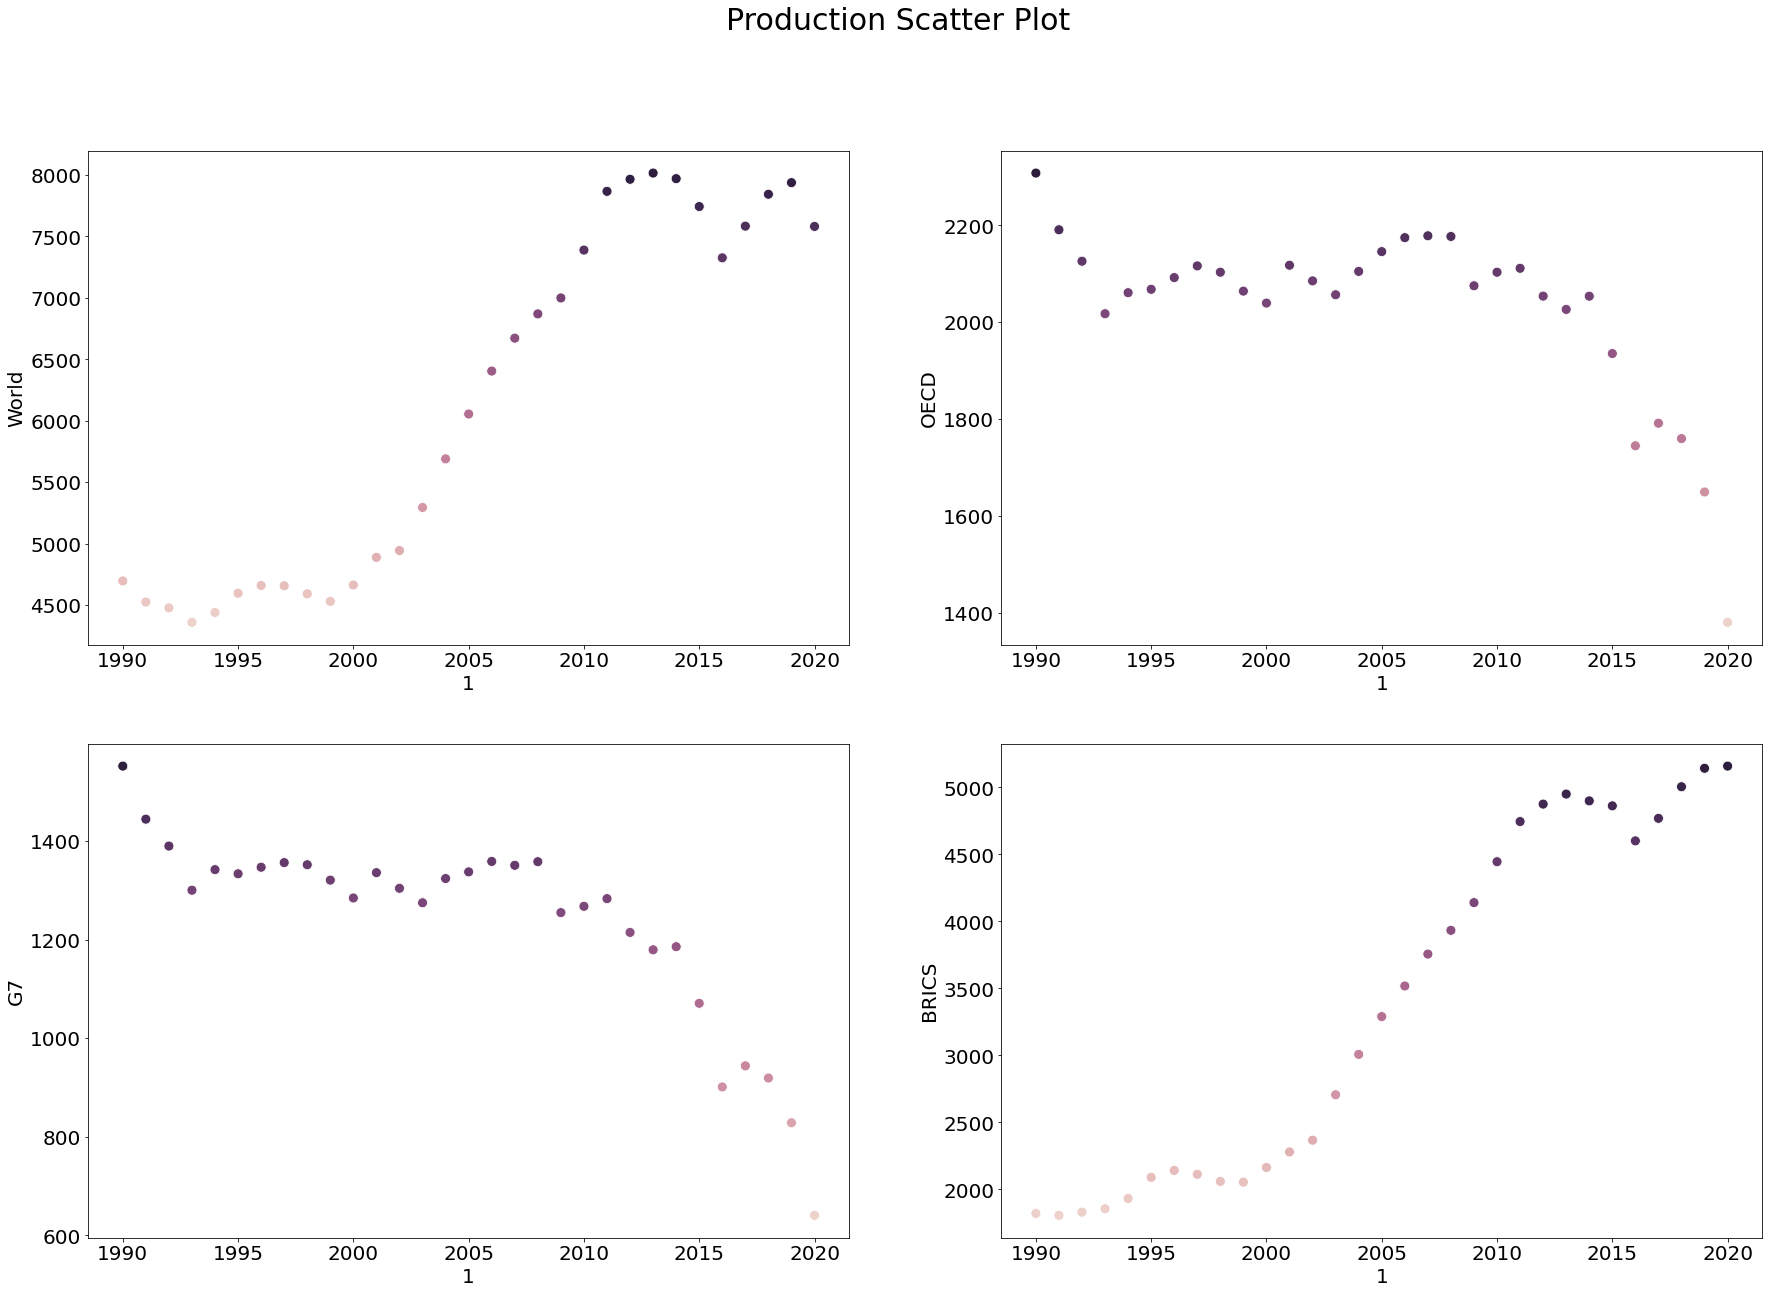

In [451]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(2,2, figsize=(30, 20))
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y="World", hue="World", s=100, legend=None, ax=ax[0,0])
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y='OECD',hue="OECD", s=100, legend=None, ax=ax[0,1])
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y='G7', hue="G7", s=100, legend=None,ax=ax[1,0])
sns.scatterplot(data=df_assoc2_T, x=df_large_regions2_T.index, y='BRICS', hue="BRICS", s=100, legend=None,ax=ax[1,1])
fig.suptitle("Production Scatter Plot", fontsize=30)
plt.show()

In [452]:
df_assoc2_per = df_assoc2_per.drop(df_assoc2_per.columns[:-2], axis=1)

In [453]:
df_assoc2_per

1       2019 - 2020 (%)   2000 - 2020 (%/year) 
Region                                         
World          -4.486171               2.457795
OECD          -16.334841              -1.935260
G7            -22.653502              -3.416160
BRICS           0.315665               4.440766

Text(0, 0.5, '% Change')

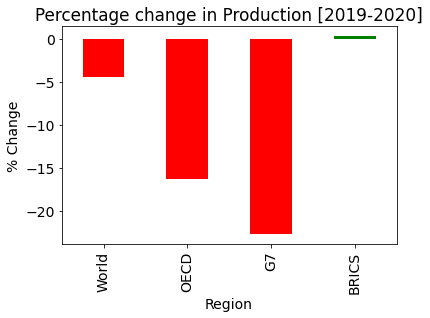

In [454]:
plt.rcParams.update({'font.size': 14})
df_assoc2_per['2019 - 2020 (%) '].plot.bar(color=(df_assoc2_per['2019 - 2020 (%) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Production [2019-2020]')
plt.ylabel('% Change')

Text(0, 0.5, '% Change')

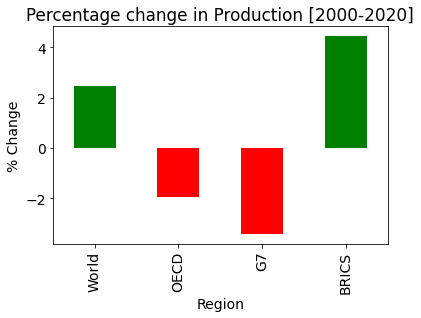

In [455]:
df_assoc2_per['2000 - 2020 (%/year) '].plot.bar(color=(df_assoc2_per['2000 - 2020 (%/year) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Production [2000-2020]')
plt.ylabel('% Change')

# For Countries

In [456]:
df_countries

1          Region      1990      1991      1992      1993      1994      1995  \
0         Belgium     2.357     2.107     1.197     0.971     0.753     0.637   
1         Czechia   101.398    96.864    86.721    85.239    76.944    74.901   
2          France    13.532    12.876    11.827    10.662     9.610     9.896   
3         Germany   434.446   352.645   314.160   286.561   264.880   251.784   
4           Italy     1.014     0.961     0.825     0.630     0.267     0.172   
5     Netherlands     0.000     0.000     0.000     0.000     0.000     0.000   
6          Poland   215.320   209.782   198.472   198.584   200.703   200.713   
7        Portugal     0.281     0.270     0.221     0.197     0.147     0.000   
8         Romania    38.183    32.414    38.370    39.777    40.566    41.127   
9           Spain    35.682    33.562    33.471    31.583    29.633    28.305   
10         Sweden     0.592     0.746     0.746     0.718     0.686     0.752   
11         Norway     0.303     0.330     0.359     0.268     0.301     0.292   
12         Turkey    47.428    46.108    51.431    48.560    54.371    55.073   
13            CIS   682.789   618.741   588.874   519.034   459.804   418.875   
14     Kazakhstan   131.443   130.382   126.536   111.880   104.625    84.494   
15         Russia   376.613   337.863   323.545   288.613   257.311   249.769   
16        Ukraine   159.213   135.230   126.375   108.717    88.598    77.875   
17     Uzbekistan     6.400     6.750     5.531     4.657     4.650     3.054   
18        America  1039.539  1010.950  1007.599   964.469  1052.901  1057.704   
19         Canada    68.332    71.134    65.614    69.003    72.823    74.981   
20  United States   933.561   903.542   904.969   857.698   937.580   937.098   
21      Argentina     0.274     0.289     0.200     0.166     0.344     0.302   
22         Brazil     4.595     5.188     4.731     4.595     5.134     5.199   
23          Chile     2.183     2.208     1.626     1.355     1.182     1.038   
24       Colombia    21.375    19.894    21.817    21.139    22.599    25.651   
25         Mexico     6.933     6.463     6.104     6.615     8.898     9.320   
26      Venezuela     2.189     2.175     2.450     3.815     4.278     4.064   
27          China  1039.820  1040.692  1072.800  1112.298  1202.836  1338.746   
28          India   225.258   245.007   255.229   262.291   271.725   290.426   
29      Indonesia    10.230    13.271    22.008    28.314    30.687    41.828   
30          Japan     7.985     7.931     7.602     7.206     6.742     6.317   
31       Malaysia     0.111     0.200     0.084     0.419     0.141     0.135   
32    South Korea    17.217    15.058    11.970     9.443     7.438     5.720   
33         Taiwan     0.472     0.402     0.335     0.328     0.285     0.235   
34       Thailand    12.421    14.689    15.357    15.546    17.095    18.421   
35        Pacific   207.140   222.296   231.357   229.402   228.435   245.384   
36    New Zealand     2.578     2.689     3.018     3.337     3.033     3.577   
37        Algeria     0.000     0.000     0.000     0.000     0.000     0.000   
38          Egypt     0.000     0.000     0.000     0.000     0.000     0.000   
39        Nigeria     0.090     0.100     0.087     0.028     0.025     0.020   
40   South Africa   174.800   178.200   174.400   188.214   195.805   206.211   
41           Iran     0.835     0.858     0.677     1.134     1.112     1.084   

1       1996      1997      1998      1999      2000      2001      2002  \
0      0.560     0.427     0.312     0.364     0.375     0.218     0.173   
1     77.145    74.016    67.529    59.133    65.162    66.106    63.356   
2      8.553     7.316     6.112     5.690     4.100     2.671     2.068   
3    240.558   228.525   211.523   205.275   205.212   206.178   211.132   
4      0.137     0.216     0.189     0.115     0.014     0.139     0.163   
5      0.000     0.000     0.000     0.000     0.000     0.0

In [457]:
df_countries2 = df_countries.copy()
df_countries2

1          Region      1990      1991      1992      1993      1994      1995  \
0         Belgium     2.357     2.107     1.197     0.971     0.753     0.637   
1         Czechia   101.398    96.864    86.721    85.239    76.944    74.901   
2          France    13.532    12.876    11.827    10.662     9.610     9.896   
3         Germany   434.446   352.645   314.160   286.561   264.880   251.784   
4           Italy     1.014     0.961     0.825     0.630     0.267     0.172   
5     Netherlands     0.000     0.000     0.000     0.000     0.000     0.000   
6          Poland   215.320   209.782   198.472   198.584   200.703   200.713   
7        Portugal     0.281     0.270     0.221     0.197     0.147     0.000   
8         Romania    38.183    32.414    38.370    39.777    40.566    41.127   
9           Spain    35.682    33.562    33.471    31.583    29.633    28.305   
10         Sweden     0.592     0.746     0.746     0.718     0.686     0.752   
11         Norway     0.303     0.330     0.359     0.268     0.301     0.292   
12         Turkey    47.428    46.108    51.431    48.560    54.371    55.073   
13            CIS   682.789   618.741   588.874   519.034   459.804   418.875   
14     Kazakhstan   131.443   130.382   126.536   111.880   104.625    84.494   
15         Russia   376.613   337.863   323.545   288.613   257.311   249.769   
16        Ukraine   159.213   135.230   126.375   108.717    88.598    77.875   
17     Uzbekistan     6.400     6.750     5.531     4.657     4.650     3.054   
18        America  1039.539  1010.950  1007.599   964.469  1052.901  1057.704   
19         Canada    68.332    71.134    65.614    69.003    72.823    74.981   
20  United States   933.561   903.542   904.969   857.698   937.580   937.098   
21      Argentina     0.274     0.289     0.200     0.166     0.344     0.302   
22         Brazil     4.595     5.188     4.731     4.595     5.134     5.199   
23          Chile     2.183     2.208     1.626     1.355     1.182     1.038   
24       Colombia    21.375    19.894    21.817    21.139    22.599    25.651   
25         Mexico     6.933     6.463     6.104     6.615     8.898     9.320   
26      Venezuela     2.189     2.175     2.450     3.815     4.278     4.064   
27          China  1039.820  1040.692  1072.800  1112.298  1202.836  1338.746   
28          India   225.258   245.007   255.229   262.291   271.725   290.426   
29      Indonesia    10.230    13.271    22.008    28.314    30.687    41.828   
30          Japan     7.985     7.931     7.602     7.206     6.742     6.317   
31       Malaysia     0.111     0.200     0.084     0.419     0.141     0.135   
32    South Korea    17.217    15.058    11.970     9.443     7.438     5.720   
33         Taiwan     0.472     0.402     0.335     0.328     0.285     0.235   
34       Thailand    12.421    14.689    15.357    15.546    17.095    18.421   
35        Pacific   207.140   222.296   231.357   229.402   228.435   245.384   
36    New Zealand     2.578     2.689     3.018     3.337     3.033     3.577   
37        Algeria     0.000     0.000     0.000     0.000     0.000     0.000   
38          Egypt     0.000     0.000     0.000     0.000     0.000     0.000   
39        Nigeria     0.090     0.100     0.087     0.028     0.025     0.020   
40   South Africa   174.800   178.200   174.400   188.214   195.805   206.211   
41           Iran     0.835     0.858     0.677     1.134     1.112     1.084   

1       1996      1997      1998      1999      2000      2001      2002  \
0      0.560     0.427     0.312     0.364     0.375     0.218     0.173   
1     77.145    74.016    67.529    59.133    65.162    66.106    63.356   
2      8.553     7.316     6.112     5.690     4.100     2.671     2.068   
3    240.558   228.525   211.523   205.275   205.212   206.178   211.132   
4      0.137     0.216     0.189     0.115     0.014     0.139     0.163   
5      0.000     0.000     0.000     0.000     0.000     0.0

In [458]:
df_countries2.set_index('Region', inplace=True)
df_countries2

1                  1990      1991      1992      1993      1994      1995  \
Region                                                                      
Belgium           2.357     2.107     1.197     0.971     0.753     0.637   
Czechia         101.398    96.864    86.721    85.239    76.944    74.901   
France           13.532    12.876    11.827    10.662     9.610     9.896   
Germany         434.446   352.645   314.160   286.561   264.880   251.784   
Italy             1.014     0.961     0.825     0.630     0.267     0.172   
Netherlands       0.000     0.000     0.000     0.000     0.000     0.000   
Poland          215.320   209.782   198.472   198.584   200.703   200.713   
Portugal          0.281     0.270     0.221     0.197     0.147     0.000   
Romania          38.183    32.414    38.370    39.777    40.566    41.127   
Spain            35.682    33.562    33.471    31.583    29.633    28.305   
Sweden            0.592     0.746     0.746     0.718     0.686     0.752   
Norway            0.303     0.330     0.359     0.268     0.301     0.292   
Turkey           47.428    46.108    51.431    48.560    54.371    55.073   
CIS             682.789   618.741   588.874   519.034   459.804   418.875   
Kazakhstan      131.443   130.382   126.536   111.880   104.625    84.494   
Russia          376.613   337.863   323.545   288.613   257.311   249.769   
Ukraine         159.213   135.230   126.375   108.717    88.598    77.875   
Uzbekistan        6.400     6.750     5.531     4.657     4.650     3.054   
America        1039.539  1010.950  1007.599   964.469  1052.901  1057.704   
Canada           68.332    71.134    65.614    69.003    72.823    74.981   
United States   933.561   903.542   904.969   857.698   937.580   937.098   
Argentina         0.274     0.289     0.200     0.166     0.344     0.302   
Brazil            4.595     5.188     4.731     4.595     5.134     5.199   
Chile             2.183     2.208     1.626     1.355     1.182     1.038   
Colombia         21.375    19.894    21.817    21.139    22.599    25.651   
Mexico            6.933     6.463     6.104     6.615     8.898     9.320   
Venezuela         2.189     2.175     2.450     3.815     4.278     4.064   
China          1039.820  1040.692  1072.800  1112.298  1202.836  1338.746   
India           225.258   245.007   255.229   262.291   271.725   290.426   
Indonesia        10.230    13.271    22.008    28.314    30.687    41.828   
Japan             7.985     7.931     7.602     7.206     6.742     6.317   
Malaysia          0.111     0.200     0.084     0.419     0.141     0.135   
South Korea      17.217    15.058    11.970     9.443     7.438     5.720   
Taiwan            0.472     0.402     0.335     0.328     0.285     0.235   
Thailand         12.421    14.689    15.357    15.546    17.095    18.421   
Pacific         207.140   222.296   231.357   229.402   228.435   245.384   
New Zealand       2.578     2.689     3.018     3.337     3.033     3.577   
Algeria           0.000     0.000     0.000     0.000     0.000     0.000   
Egypt             0.000     0.000     0.000     0.000     0.000     0.000   
Nigeria           0.090     0.100     0.087     0.028     0.025     0.020   
South Africa    174.800   178.200   174.400   188.214   195.805   206.211   
Iran              0.835     0.858     0.677     1.134     1.112     1.084   

1                  1996      1997      1998      1999      2000      2001  \
Region                                                                      
Belgium           0.560     0.427     0.312     0.364     0.375     0.218   
Czechia          77.145    74.016    67.529    59.133    65.162    66.106   
France            8.553     7.316     6.112     5.690     4.100     2.671   
Germany         240.558   228.525   211.523   205.275   205.212   206.178   
Italy             0.137     0.216     0.189     0.115     0.014     0.139   
Netherlands       0.000     0.000     0.000     0.000     0.000     0.00

In [459]:
plt.rcParams.update({'font.size': 14})

<AxesSubplot:xlabel='1', ylabel='Region'>

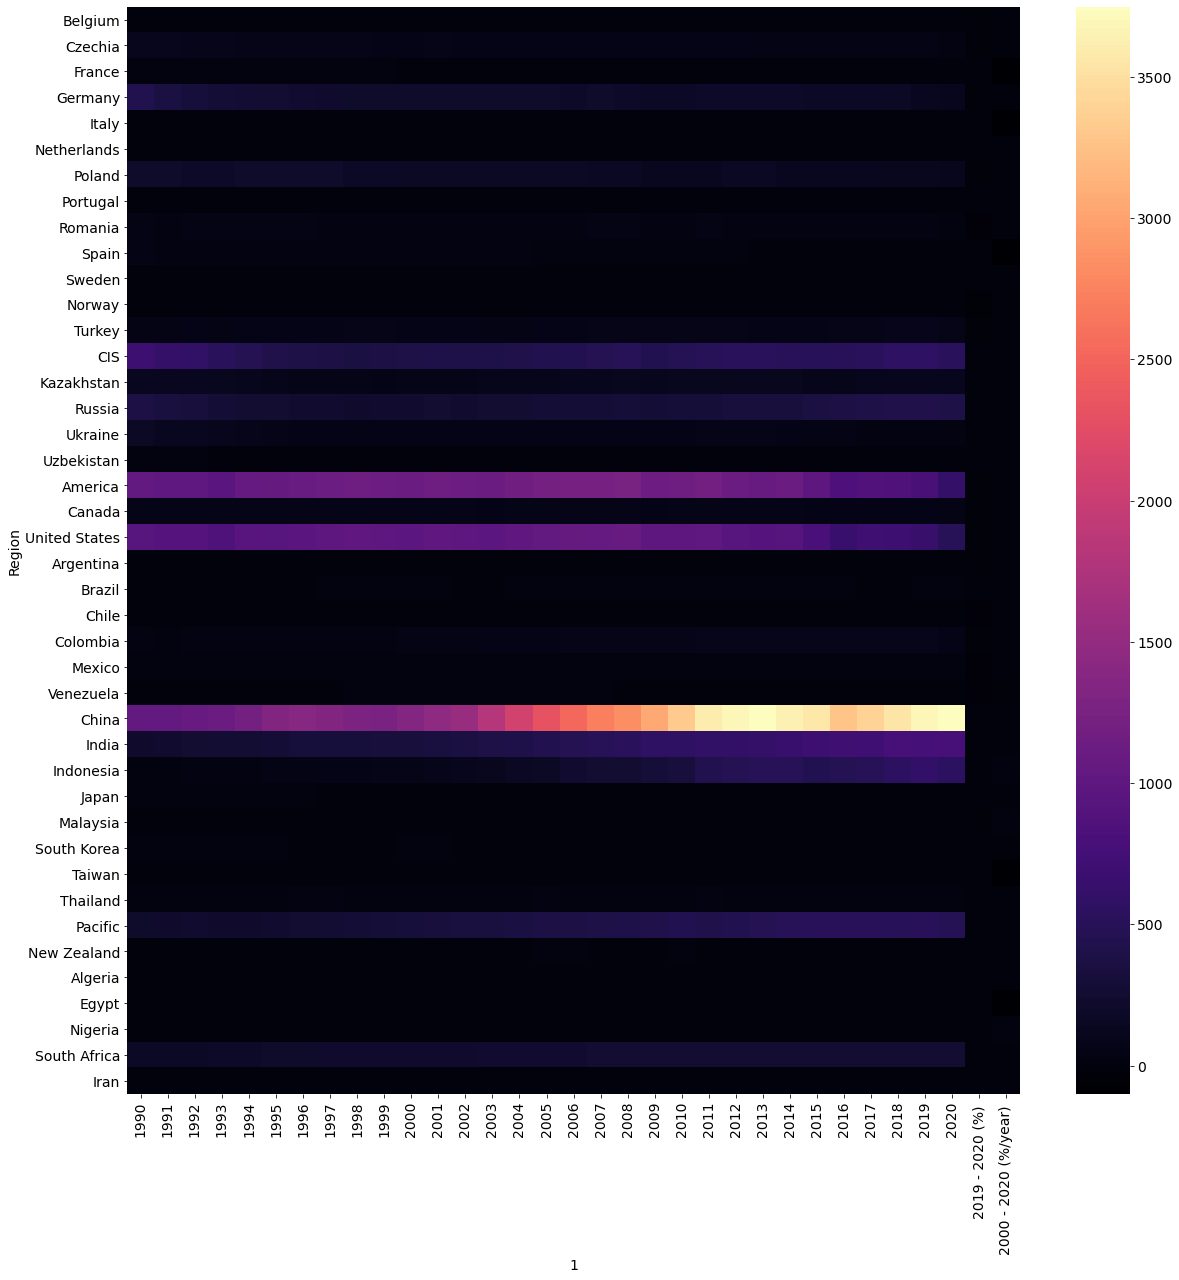

In [460]:
plt.figure(figsize=(20,20))
sns.heatmap(df_countries2, cmap="magma")

In [461]:
df_countries2_T = df_countries2.T
df_countries2_T

Region                   Belgium     Czechia   France     Germany    Italy  \
1                                                                            
1990                    2.357000  101.398000   13.532  434.446000    1.014   
1991                    2.107000   96.864000   12.876  352.645000    0.961   
1992                    1.197000   86.721000   11.827  314.160000    0.825   
1993                    0.971000   85.239000   10.662  286.561000    0.630   
1994                    0.753000   76.944000    9.610  264.880000    0.267   
1995                    0.637000   74.901000    9.896  251.784000    0.172   
1996                    0.560000   77.145000    8.553  240.558000    0.137   
1997                    0.427000   74.016000    7.316  228.525000    0.216   
1998                    0.312000   67.529000    6.112  211.523000    0.189   
1999                    0.364000   59.133000    5.690  205.275000    0.115   
2000                    0.375000   65.162000    4.100  205.212000    0.014   
2001                    0.218000   66.106000    2.671  206.178000    0.139   
2002                    0.173000   63.356000    2.068  211.132000    0.163   
2003                    0.129000   63.906000    2.243  207.982000    0.250   
2004                    0.181000   64.076000    0.872  211.210000    0.098   
2005                    0.109000   62.026000    0.617  206.054000    0.095   
2006                    0.029000   62.903000    0.452  200.184000    0.021   
2007                    0.000000   62.626000    0.422  204.594000    0.158   
2008                    0.000000   60.200000    0.277  194.456000    0.117   
2009                    0.000000   56.417000    0.147  184.828000    0.072   
2010                    0.016000   55.367000    0.261  183.511000    0.101   
2011                    0.014000   58.080000    0.149  189.462000    0.092   
2012                    0.020000   55.185000    0.290  196.990000    0.080   
2013                    0.116000   49.131000    0.313  190.956000    0.073   
2014                    0.126000   47.077000    0.300  186.515000    0.086   
2015                    0.106000   46.531000    0.000  184.714000    0.081   
2016                    0.107000   45.543000    0.000  175.625000    0.000   
2017                    0.090300   44.906774    0.000  175.122000    0.000   
2018                    0.116700   43.765593    0.000  169.019000    0.000   
2019                    0.099402   40.020570    0.000  127.143254    0.000   
2020                    0.084825   30.948056    0.000  104.595682    0.000   
2019 - 2020 (%)       -14.664823  -22.669628    0.000  -17.733990    0.000   
2000 - 2020 (%/year)   -7.162266   -3.654386 -100.000   -3.313564 -100.000   

Region                 Netherlands      Poland  Portugal    Romania    Spain  \
1                                                                              
1990                           0.0  215.320000     0.281  38.183000   35.682   
1991                           0.0  209.782000     0.270  32.414000   33.562   
1992                           0.0  198.472000     0.221  38.370000   33.471   
1993                           0.0  198.584000     0.197  39.777000   31.583   
1994                           0.0  200.703000     0.147  40.566000   29.633   
1995                           0.0  200.713000     0.000  41.127000   28.305   
1996                           0.0  201.715000     0.000  41.871000   26.990   
1997                           0.0  200.924000     0.000  33.807000   26.490   
1998                           0.0  178.546000     0.000  26.235000   26.138   
1999                           0.0  171.063000     0.000  22.893000   24.299   
2000                           0.0  162.815000     0.000  29.294000   23.471   
2001                           0.0  163.544000     0.000  33.303000   22.678   
2002                           0.0  161.915000     0.000  30.428000   22.034   
2003                           0.0  163.794000     0.000  33.082000  

In [462]:
df_countries2_T.drop(df_countries2_T.tail(2).index,inplace=True)
df_countries2_T

Region   Belgium     Czechia  France     Germany  Italy  Netherlands  \
1                                                                      
1990    2.357000  101.398000  13.532  434.446000  1.014          0.0   
1991    2.107000   96.864000  12.876  352.645000  0.961          0.0   
1992    1.197000   86.721000  11.827  314.160000  0.825          0.0   
1993    0.971000   85.239000  10.662  286.561000  0.630          0.0   
1994    0.753000   76.944000   9.610  264.880000  0.267          0.0   
1995    0.637000   74.901000   9.896  251.784000  0.172          0.0   
1996    0.560000   77.145000   8.553  240.558000  0.137          0.0   
1997    0.427000   74.016000   7.316  228.525000  0.216          0.0   
1998    0.312000   67.529000   6.112  211.523000  0.189          0.0   
1999    0.364000   59.133000   5.690  205.275000  0.115          0.0   
2000    0.375000   65.162000   4.100  205.212000  0.014          0.0   
2001    0.218000   66.106000   2.671  206.178000  0.139          0.0   
2002    0.173000   63.356000   2.068  211.132000  0.163          0.0   
2003    0.129000   63.906000   2.243  207.982000  0.250          0.0   
2004    0.181000   64.076000   0.872  211.210000  0.098          0.0   
2005    0.109000   62.026000   0.617  206.054000  0.095          0.0   
2006    0.029000   62.903000   0.452  200.184000  0.021          0.0   
2007    0.000000   62.626000   0.422  204.594000  0.158          0.0   
2008    0.000000   60.200000   0.277  194.456000  0.117          0.0   
2009    0.000000   56.417000   0.147  184.828000  0.072          0.0   
2010    0.016000   55.367000   0.261  183.511000  0.101          0.0   
2011    0.014000   58.080000   0.149  189.462000  0.092          0.0   
2012    0.020000   55.185000   0.290  196.990000  0.080          0.0   
2013    0.116000   49.131000   0.313  190.956000  0.073          0.0   
2014    0.126000   47.077000   0.300  186.515000  0.086          0.0   
2015    0.106000   46.531000   0.000  184.714000  0.081          0.0   
2016    0.107000   45.543000   0.000  175.625000  0.000          0.0   
2017    0.090300   44.906774   0.000  175.122000  0.000          0.0   
2018    0.116700   43.765593   0.000  169.019000  0.000          0.0   
2019    0.099402   40.020570   0.000  127.143254  0.000          0.0   
2020    0.084825   30.948056   0.000  104.595682  0.000          0.0   

Region      Poland  Portugal    Romania   Spain  Sweden    Norway     Turkey  \
1                                                                              
1990    215.320000     0.281  38.183000  35.682   0.592  0.303000  47.428000   
1991    209.782000     0.270  32.414000  33.562   0.746  0.330000  46.108000   
1992    198.472000     0.221  38.370000  33.471   0.746  0.359000  51.431000   
1993    198.584000     0.197  39.777000  31.583   0.718  0.268000  48.560000   
1994    200.703000     0.147  40.566000  29.633   0.686  0.301000  54.371000   
1995    200.713000     0.000  41.127000  28.305   0.752  0.292000  55.073000   
1996    201.715000     0.000  41.871000  26.990   0.718  0.230000  56.363000   
1997    200.924000     0.000  33.807000  26.490   0.645  0.386000  59.929000   
1998    178.546000     0.000  26.235000  26.138   0.625  0.328000  67.383000   
1999    171.063000     0.000  22.893000  24.299   0.585  0.404000  67.038000   
2000    162.815000     0.000  29.294000  23.471   0.541  0.632000  63.268000   
2001    163.544000     0.000  33.303000  22.678   0.637  1.788000  62.097000   
2002    161.915000     0.000  30.428000  22.034   0.804  2.132000  53.984000   
2003    163.794000     0.000  33.082000  20.562   0.806  2.944000  48.563000   
2004    162.428000     0.000  31.800000  20.487   0.893  2.904000  46.377000   
2005    159.540000     0.000  31.112000  19.481   0.708  1.471000  58.340000   
2006    156.067000     0.000  34.932000  18.447   0.621  2.395000  64.255000   
2007    145.850000     0.000  35.781000  17.182   0.520  4.073000  75.364000   
2008    144.013000     

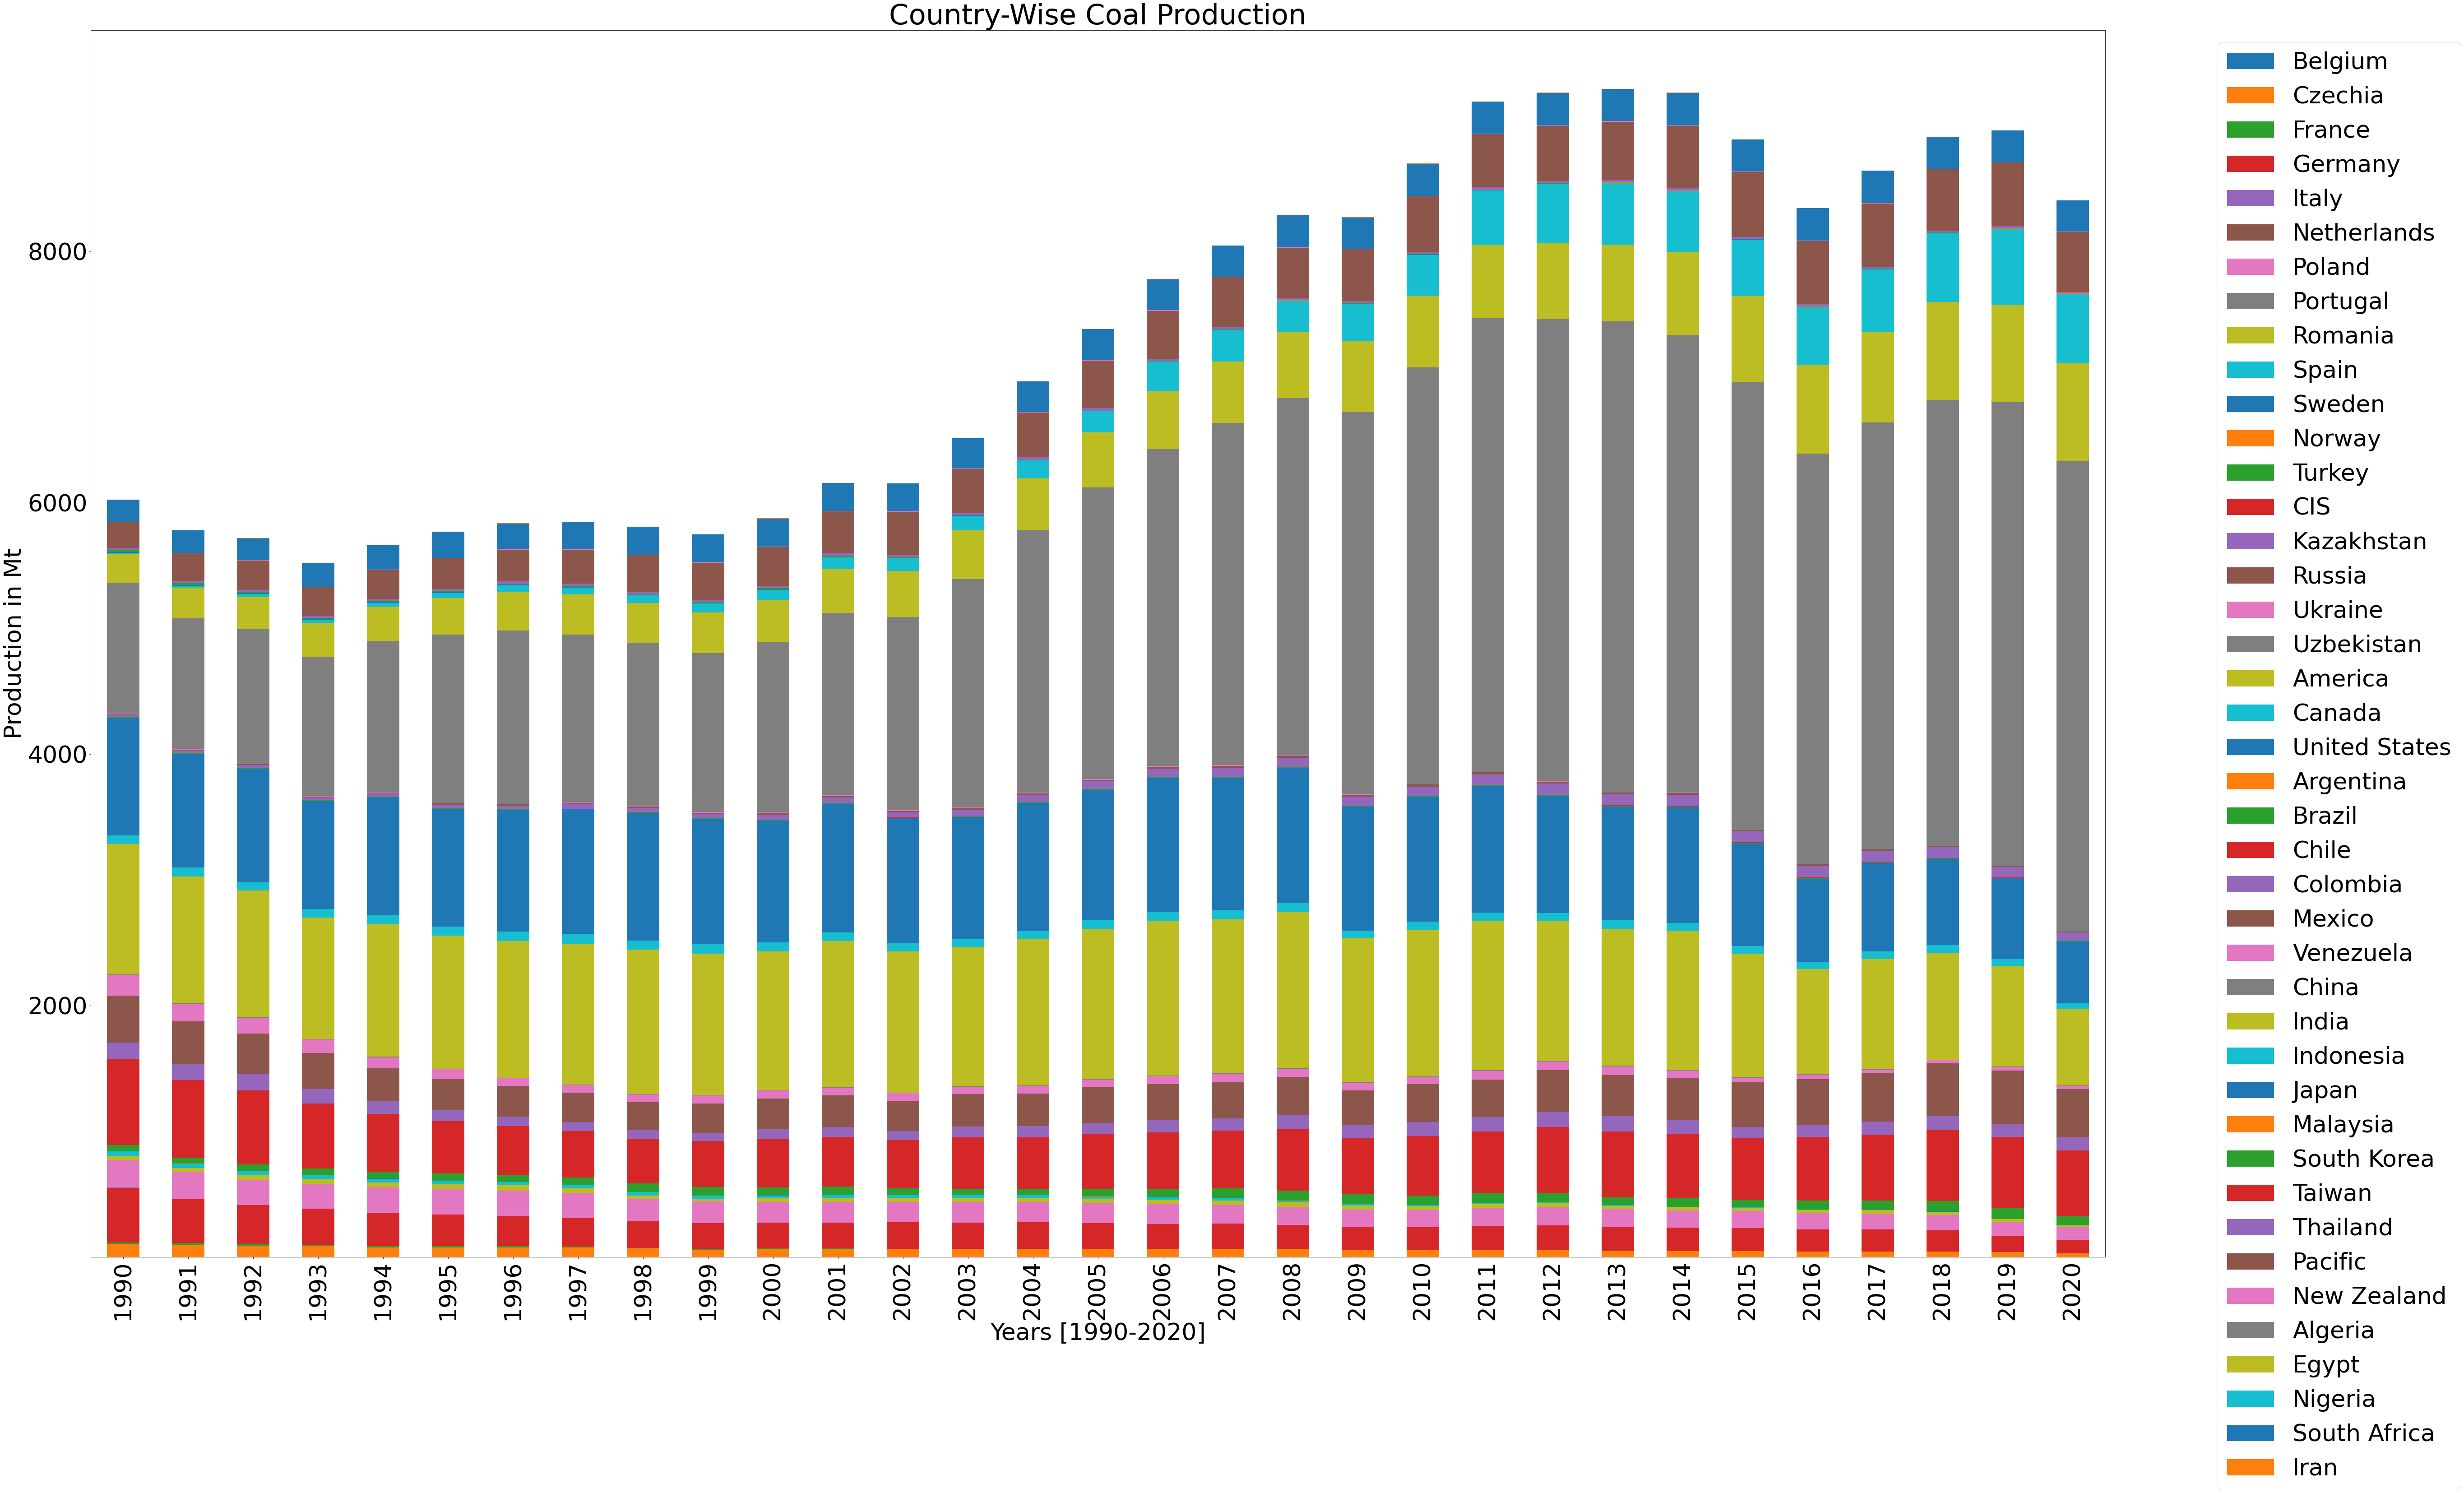

In [463]:
plt.rcParams.update({'font.size': 52})
df_countries2_T.plot(kind="bar",stacked=True,figsize=(80,50))
plt.title("Country-Wise Coal Production")
plt.xlabel("Years [1990-2020]")
plt.ylabel("Production in Mt")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [464]:
corr_countries2_corr = df_countries2_T.corr()
corr_countries2_corr

Region          Belgium   Czechia    France   Germany     Italy  Netherlands  \
Region                                                                         
Belgium        1.000000  0.828184  0.883970  0.926508  0.934292          NaN   
Czechia        0.828184  1.000000  0.889755  0.937317  0.844245          NaN   
France         0.883970  0.889755  1.000000  0.868338  0.828812          NaN   
Germany        0.926508  0.937317  0.868338  1.000000  0.919895          NaN   
Italy          0.934292  0.844245  0.828812  0.919895  1.000000          NaN   
Netherlands         NaN       NaN       NaN       NaN       NaN          NaN   
Poland         0.750446  0.944944  0.916667  0.859291  0.721074          NaN   
Portugal       0.925937  0.767124  0.799908  0.870606  0.950992          NaN   
Romania        0.390291  0.766647  0.558386  0.629956  0.459224          NaN   
Spain          0.704343  0.930921  0.869793  0.808255  0.702375          NaN   
Sweden         0.173503  0.483050  0.294227  0.297246  0.286679          NaN   
Norway        -0.439221 -0.143863 -0.507086 -0.217602 -0.248410          NaN   
Turkey        -0.612436 -0.709076 -0.659876 -0.691398 -0.624371          NaN   
CIS            0.509134  0.099888  0.172637  0.359667  0.521018          NaN   
Kazakhstan     0.394480  0.139780  0.115936  0.332736  0.477748          NaN   
Russia         0.076559 -0.402629 -0.251791 -0.139796  0.040059          NaN   
Ukraine        0.868044  0.900966  0.805384  0.942575  0.920733          NaN   
Uzbekistan     0.729962  0.368736  0.480753  0.577399  0.718166          NaN   
America       -0.111851  0.355591 -0.005616  0.200171 -0.002518          NaN   
Canada         0.245393  0.622990  0.472288  0.469626  0.230003          NaN   
United States  0.021069  0.493552  0.153022  0.322909  0.123326          NaN   
Argentina      0.608379  0.676197  0.827961  0.576401  0.466041          NaN   
Brazil        -0.398185 -0.466557 -0.489369 -0.375622 -0.414015          NaN   
Chile          0.215119 -0.153253  0.029738  0.102771  0.155408          NaN   
Colombia      -0.695134 -0.839006 -0.890451 -0.713469 -0.655291          NaN   
Mexico        -0.685668 -0.468855 -0.729287 -0.499559 -0.609030          NaN   
Venezuela     -0.087229  0.342165  0.113808  0.107072 -0.043981          NaN   
China         -0.634398 -0.850187 -0.832244 -0.710634 -0.606196          NaN   
India         -0.628696 -0.909287 -0.818226 -0.764886 -0.636615          NaN   
Indonesia     -0.572361 -0.870220 -0.772858 -0.708563 -0.580654          NaN   
Japan          0.876642  0.868303  0.987512  0.856835  0.815854          NaN   
Malaysia      -0.518069 -0.809435 -0.713832 -0.652115 -0.518431          NaN   
South Korea    0.943751  0.892022  0.879306  0.927781  0.912869          NaN   
Taiwan         0.948476  0.855883  0.955584  0.907569  0.897547          NaN   
Thailand      -0.421755  0.050679 -0.159329 -0.189288 -0.375864          NaN   
Pacific       -0.710878 -0.923023 -0.902496 -0.791860 -0.691081          NaN   
New Zealand   -0.546464 -0.180133 -0.533296 -0.302695 -0.383535          NaN   
Algeria             NaN       NaN       NaN       NaN       NaN          NaN   
Egypt         -0.128912  0.028429 -0.083847 -0.075273 -0.157303          NaN   
Nigeria        0.597771  0.208695  0.300952  0.455472  0.639286          NaN   
South Africa  -0.869075 -0.900829 -0.968941 -0.860570 -0.841522          NaN   
Iran          -0.573583 -0.656468 -0.650640 -0.667684 -0.600602          NaN   

Region           Poland  Portugal   Romania     Spain    Sweden    Norway  \
Region                                                                      
Belgium        0.750446  0.925937  0.390291  0.704343  0.173503 -0.439221   
Czechia        0.944944  0.767124  0.766647  0.930921  0.483050 -0.143863   
France         0.916667  0.799908  0.558386  0.869793  0.294227 -0.507086   
Germany        0.859291  0.870606  0.629956  0.808255  0.297246 -0.217602   
Italy          0.

<AxesSubplot:xlabel='Region', ylabel='Region'>

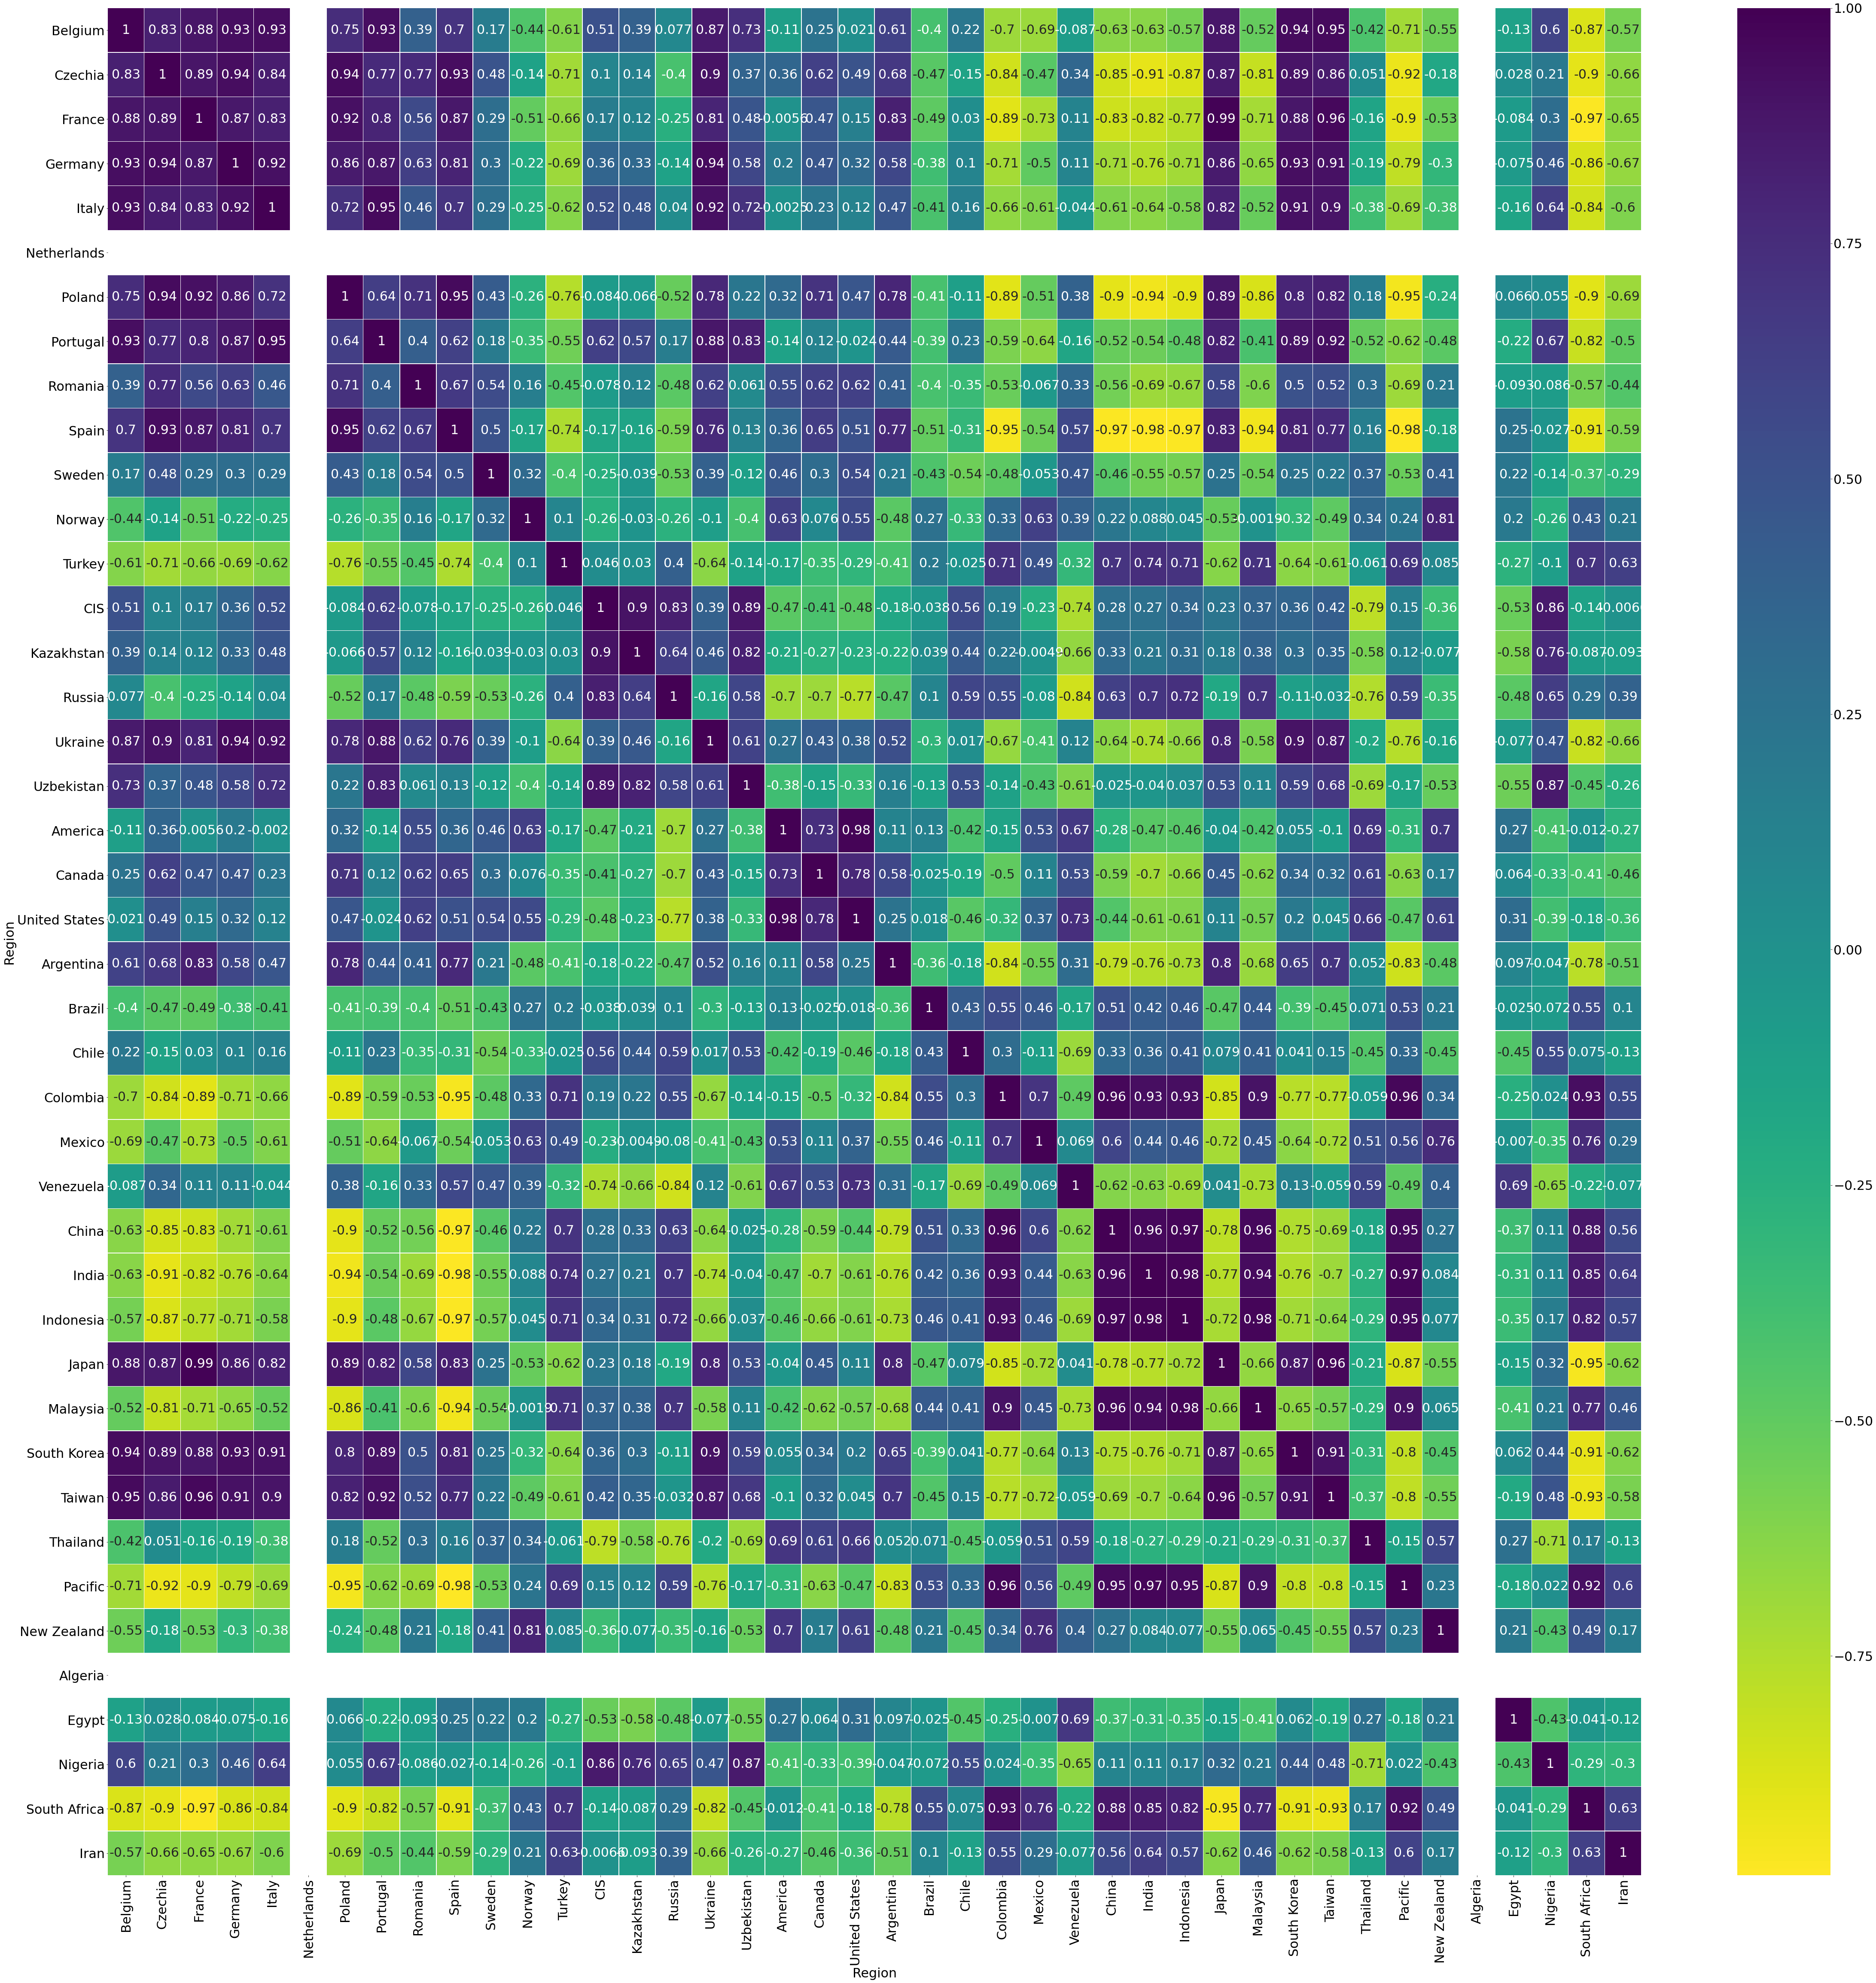

In [465]:
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(80, 80))
sns.heatmap(corr_countries2_corr, cmap='viridis_r', linewidths=0.4, annot=True)

In [466]:
df_countries2_per = df_countries2.copy()
df_countries2_per

1                  1990      1991      1992      1993      1994      1995  \
Region                                                                      
Belgium           2.357     2.107     1.197     0.971     0.753     0.637   
Czechia         101.398    96.864    86.721    85.239    76.944    74.901   
France           13.532    12.876    11.827    10.662     9.610     9.896   
Germany         434.446   352.645   314.160   286.561   264.880   251.784   
Italy             1.014     0.961     0.825     0.630     0.267     0.172   
Netherlands       0.000     0.000     0.000     0.000     0.000     0.000   
Poland          215.320   209.782   198.472   198.584   200.703   200.713   
Portugal          0.281     0.270     0.221     0.197     0.147     0.000   
Romania          38.183    32.414    38.370    39.777    40.566    41.127   
Spain            35.682    33.562    33.471    31.583    29.633    28.305   
Sweden            0.592     0.746     0.746     0.718     0.686     0.752   
Norway            0.303     0.330     0.359     0.268     0.301     0.292   
Turkey           47.428    46.108    51.431    48.560    54.371    55.073   
CIS             682.789   618.741   588.874   519.034   459.804   418.875   
Kazakhstan      131.443   130.382   126.536   111.880   104.625    84.494   
Russia          376.613   337.863   323.545   288.613   257.311   249.769   
Ukraine         159.213   135.230   126.375   108.717    88.598    77.875   
Uzbekistan        6.400     6.750     5.531     4.657     4.650     3.054   
America        1039.539  1010.950  1007.599   964.469  1052.901  1057.704   
Canada           68.332    71.134    65.614    69.003    72.823    74.981   
United States   933.561   903.542   904.969   857.698   937.580   937.098   
Argentina         0.274     0.289     0.200     0.166     0.344     0.302   
Brazil            4.595     5.188     4.731     4.595     5.134     5.199   
Chile             2.183     2.208     1.626     1.355     1.182     1.038   
Colombia         21.375    19.894    21.817    21.139    22.599    25.651   
Mexico            6.933     6.463     6.104     6.615     8.898     9.320   
Venezuela         2.189     2.175     2.450     3.815     4.278     4.064   
China          1039.820  1040.692  1072.800  1112.298  1202.836  1338.746   
India           225.258   245.007   255.229   262.291   271.725   290.426   
Indonesia        10.230    13.271    22.008    28.314    30.687    41.828   
Japan             7.985     7.931     7.602     7.206     6.742     6.317   
Malaysia          0.111     0.200     0.084     0.419     0.141     0.135   
South Korea      17.217    15.058    11.970     9.443     7.438     5.720   
Taiwan            0.472     0.402     0.335     0.328     0.285     0.235   
Thailand         12.421    14.689    15.357    15.546    17.095    18.421   
Pacific         207.140   222.296   231.357   229.402   228.435   245.384   
New Zealand       2.578     2.689     3.018     3.337     3.033     3.577   
Algeria           0.000     0.000     0.000     0.000     0.000     0.000   
Egypt             0.000     0.000     0.000     0.000     0.000     0.000   
Nigeria           0.090     0.100     0.087     0.028     0.025     0.020   
South Africa    174.800   178.200   174.400   188.214   195.805   206.211   
Iran              0.835     0.858     0.677     1.134     1.112     1.084   

1                  1996      1997      1998      1999      2000      2001  \
Region                                                                      
Belgium           0.560     0.427     0.312     0.364     0.375     0.218   
Czechia          77.145    74.016    67.529    59.133    65.162    66.106   
France            8.553     7.316     6.112     5.690     4.100     2.671   
Germany         240.558   228.525   211.523   205.275   205.212   206.178   
Italy             0.137     0.216     0.189     0.115     0.014     0.139   
Netherlands       0.000     0.000     0.000     0.000     0.000     0.00

In [467]:
df_countries2_per = df_countries2_per.drop(df_countries2_per.columns[:-2], axis=1)

In [468]:
df_countries2_per

1              2019 - 2020 (%)   2000 - 2020 (%/year) 
Region                                                
Belgium              -14.664823              -7.162266
Czechia              -22.669628              -3.654386
France                 0.000000            -100.000000
Germany              -17.733990              -3.313564
Italy                  0.000000            -100.000000
Netherlands            0.000000               0.000000
Poland               -10.351748              -2.370200
Portugal               0.000000               0.000000
Romania              -30.711287              -3.273283
Spain                  0.000000            -100.000000
Sweden                 0.000000              -0.055747
Norway               -41.931186             -10.390976
Turkey               -19.190499               0.533827
CIS                   -7.425469               1.521592
Kazakhstan            -0.539088               1.474684
Russia                -9.191509               2.349569
Ukraine               -7.693466              -4.642688
Uzbekistan             1.891445               2.613335
America              -23.492298              -2.913560
Canada               -20.928488              -2.101560
United States        -23.763941              -3.379703
Argentina            -11.028604              -4.933976
Brazil                 2.584170              -1.015325
Chile                -36.237388               4.658108
Colombia             -23.374714               2.658277
Mexico               -33.721481              -2.591915
Venezuela            -34.351370             -16.872085
China                  1.400000               5.211696
India                  1.239861               4.296065
Indonesia             -9.006816              10.173015
Japan                 -3.870968              -5.561919
Malaysia             -13.901570              10.785227
South Korea           -5.996310             -10.186632
Taiwan                 0.000000            -100.000000
Thailand              -7.586305              -1.529671
Pacific               -5.953678               2.165342
New Zealand           -7.096315              -1.004963
Algeria                0.000000               0.000000
Egypt                  0.000000            -100.000000
Nigeria               -4.800186              14.218478
South Africa          -2.400000               0.495246
Iran                   3.932664               2.211491

Text(0, 0.5, '% Change')

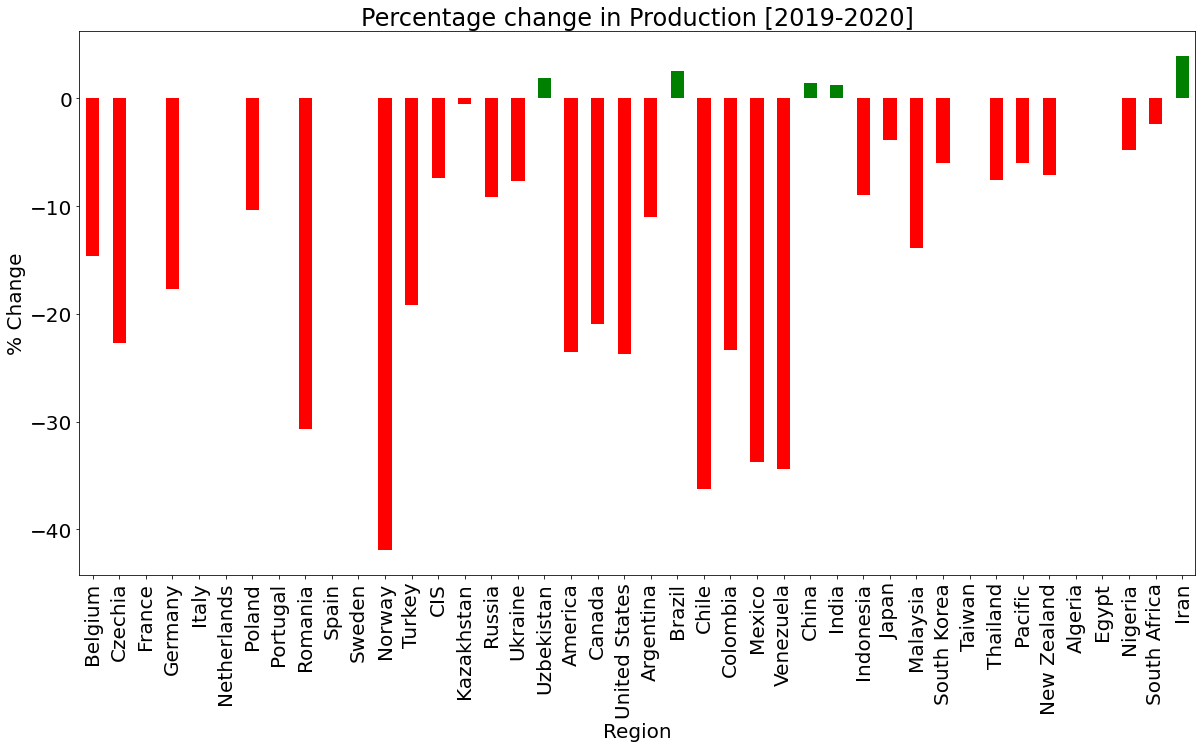

In [469]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
df_countries2_per['2019 - 2020 (%) '].plot.bar(color=(df_countries2_per['2019 - 2020 (%) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Production [2019-2020]')
plt.ylabel('% Change')

Text(0, 0.5, '% Change')

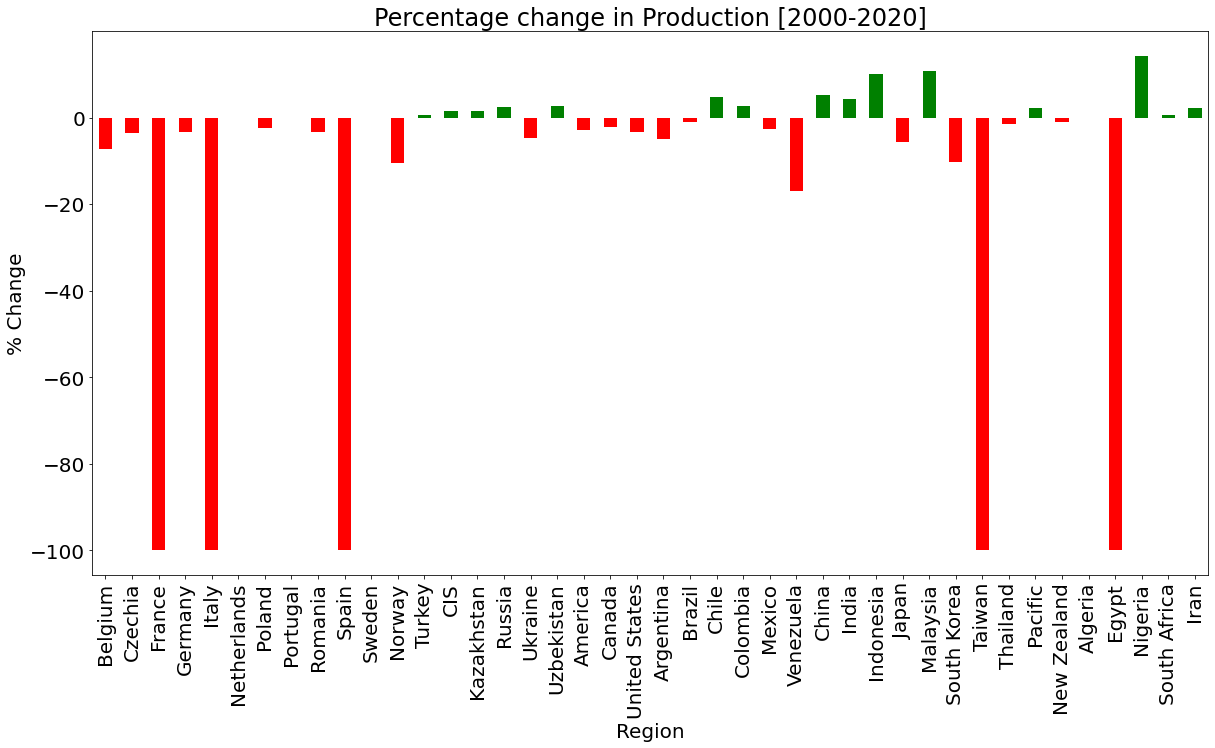

In [470]:
plt.figure(figsize=(20,10))
df_countries2_per['2000 - 2020 (%/year) '].plot.bar(color=(df_countries2_per['2000 - 2020 (%/year) '] > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage change in Production [2000-2020]')
plt.ylabel('% Change')